### Start by adding the NAIS data to oct

In [3]:
from nais.processor import nais_processor
nais_processor("/home/coliewo/Desktop/DATA/CNR/cnr2.yml")

Processing 20240901 (CNR Bologna)
Processing 20240902 (CNR Bologna)
Processing 20240903 (CNR Bologna)
Processing 20240904 (CNR Bologna)
Processing 20240905 (CNR Bologna)
Processing 20240906 (CNR Bologna)
Processing 20240907 (CNR Bologna)
Processing 20240908 (CNR Bologna)
Processing 20240909 (CNR Bologna)
Processing 20240910 (CNR Bologna)
Processing 20240911 (CNR Bologna)
Processing 20240912 (CNR Bologna)
Processing 20240913 (CNR Bologna)
Processing 20240914 (CNR Bologna)
Processing 20240915 (CNR Bologna)
Processing 20240916 (CNR Bologna)
Processing 20240917 (CNR Bologna)
Processing 20240918 (CNR Bologna)
Processing 20240919 (CNR Bologna)
Processing 20240920 (CNR Bologna)
Processing 20240921 (CNR Bologna)
Processing 20240922 (CNR Bologna)
Processing 20240923 (CNR Bologna)
Processing 20240924 (CNR Bologna)
Processing 20240925 (CNR Bologna)
Processing 20240926 (CNR Bologna)
Processing 20240927 (CNR Bologna)
Processing 20240928 (CNR Bologna)
Processing 20240929 (CNR Bologna)
Processing 202

In [4]:
from nais.utils import combine_data
import pandas as pd
import xarray as xr

data_source = "/home/coliewo/Desktop/DATA/CNR/NAIS/processed"
date_range = pd.date_range("2024-09-01","2024-10-30")

ds = combine_data(data_source, date_range, "1h",
    flag_sensitivity=0.5)

ds.to_netcdf("cnr_sep_oct.nc")

In [5]:
from nais.checker import startNaisChecker
startNaisChecker("cnr_sep_oct.nc", "cnr_sep_oct_bad_data_bounds.nc")

QSocketNotifier: Can only be used with threads started with QThread


Saved: cnr_sep_oct_bad_data_bounds.nc


SystemExit: 0

/home/coliewo/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
import xarray as xr
from nais.utils import remove_bad_data

nais = xr.open_dataset("cnr_sep_oct.nc")
bad_data2 = xr.open_dataset("cnr_sep_oct_bad_data_bounds.nc")
nais= remove_bad_data(nais, bad_data2)

### The met data and supplementary

In [10]:
import pandas as pd
import glob

# Step 1: Get all CSV file paths (adjust the path to your folder)
file_list = glob.glob('/home/coliewo/Desktop/DATA/CNR/MET/met/meteo*.raw')

# Step 2: Read the first file with headers
df_combined = pd.read_csv(file_list[0])

# Step 3: Loop through the remaining files, read them without the first row (headers), and append to the first DataFrame
for file in file_list[1:]:
    df_temp = pd.read_csv(file, skiprows=1, header=None, names=df_combined.columns)  # Skip the first row (headers) and ensure consistent column names
    df_combined = pd.concat([df_combined, df_temp], ignore_index=True)

# Step 4: Save the combined DataFrame to a new CSV file
df_combined.to_csv('/home/coliewo/Desktop/DATA/CNR/MET/met/met_sep_oct.csv', index=False)


In [11]:
import pandas as pd
import glob

# Step 1: Get all CSV file paths (adjust the path to your folder)
file_list = glob.glob('/home/coliewo/Desktop/DATA/CNR/Pollutants/nox/NOx*.raw')

# Step 2: Read the first file with headers
df_combined = pd.read_csv(file_list[0])

# Step 3: Loop through the remaining files, read them without the first row (headers), and append to the first DataFrame
for file in file_list[1:]:
    df_temp = pd.read_csv(file, skiprows=1, header=None, names=df_combined.columns)  # Skip the first row (headers) and ensure consistent column names
    df_combined = pd.concat([df_combined, df_temp], ignore_index=True)

# Step 4: Save the combined DataFrame to a new CSV file
df_combined.to_csv('/home/coliewo/Desktop/DATA/CNR/Pollutants/nox/nox_sep_oct.csv', index=False)


In [12]:
import pandas as pd
import glob

# Step 1: Get all CSV file paths (adjust the path to your folder)
file_list = glob.glob('/home/coliewo/Desktop/DATA/CNR/Pollutants/o3/O3tei*.raw')

# Step 2: Read the first file with headers
df_combined = pd.read_csv(file_list[0])

# Step 3: Loop through the remaining files, read them without the first row (headers), and append to the first DataFrame
for file in file_list[1:]:
    df_temp = pd.read_csv(file, skiprows=1, header=None, names=df_combined.columns)  # Skip the first row (headers) and ensure consistent column names
    df_combined = pd.concat([df_combined, df_temp], ignore_index=True)

# Step 4: Save the combined DataFrame to a new CSV file
df_combined.to_csv('/home/coliewo/Desktop/DATA/CNR/Pollutants/o3/o3_sep_oct.csv', index=False)


In [ ]:
import pandas as pd
import glob

# Step 1: Get all CSV file paths (adjust the path to your folder)
file_list = glob.glob('/home/coliewo/Desktop/DATA/CNR/Black Carbon/supp/ae33*.raw')

# Step 2: Read the first file with headers
df_combined = pd.read_csv(file_list[0])

# Step 3: Loop through the remaining files, read them without the first row (headers), and append to the first DataFrame
for file in file_list[1:]:
    df_temp = pd.read_csv(file, header=None, names=df_combined.columns)  #ensure consistent column names
    df_combined = pd.concat([df_combined, df_temp], ignore_index=True)

# Step 4: Save the combined DataFrame to a new CSV file
df_combined.to_csv('/home/coliewo/Desktop/DATA/CNR/Black Carbon/supp/bc_jan_oct.csv', index=False)

#just add the headers as an excel file and save

#### Now look at the data and refine it

In [20]:
# Met data still had the headers
met_df = pd.read_csv('/home/coliewo/Desktop/DATA/CNR/MET/met/met_sep_oct.csv',sep=' ',comment='#')
met_df['datetime'] = pd.to_datetime(met_df['date'] + ' ' + met_df['time'])
met_df.drop(['date', 'time'], axis=1, inplace=True)  # drop date and time columns
met_df = met_df[['datetime'] + [col for col in met_df.columns if col != 'datetime']]   #datetime as first column


In [21]:
met_df

datetime     day_dec  WD_min[Deg]  WD_ave[Deg]  WD_max[Deg]  \
0     2024-09-29 00:00:00  272.000000        219.0        211.4        207.0   
1     2024-09-29 00:03:00  272.002083         21.0        203.2        219.0   
2     2024-09-29 00:04:00  272.002778        188.0        188.3        214.0   
3     2024-09-29 00:05:00  272.003472        276.0        209.7        193.0   
4     2024-09-29 00:06:00  272.004167        228.0        328.6        273.0   
...                   ...         ...          ...          ...          ...   
86523 2024-09-07 23:55:00  250.996528          NaN          NaN          NaN   
86524 2024-09-07 23:56:00  250.997222        164.0        215.7        206.0   
86525 2024-09-07 23:57:00  250.997917        230.0        216.6        202.0   
86526 2024-09-07 23:58:00  250.998611        218.0        238.4        231.0   
86527 2024-09-07 23:59:00  250.999306        263.0        241.7        241.0   

       WS_min[m/s]  WS_ave[m/s]  WS_max[m/s]  T_air[C]  T_internal[C]  ...  \
0              0.2          0.6          0.9      15.9           15.9  ...   
1              0.1          0.4          0.6      15.9           15.9  ...   
2              0.2          0.4          0.6      15.9           15.9  ...   
3              0.1          0.2          0.4      15.9           15.9  ...   
4              0.1          0.2          0.3      15.9           15.9  ...   
...            ...          ...          ...       ...            ...  ...   
86523          NaN          NaN          NaN       NaN            NaN  ...   
86524          0.3          1.0          1.8      23.4           23.5  ...   
86525          0.5          1.0          1.4      23.4           23.5  ...   
86526          1.1          1.5          1.7      23.3           23.5  ...   
86527          1.0          1.4          1.8      23.3           23.5  ...   

       Rain_intensity[mm/h]  Hail_acc[hits/cm2]  Hail_duration[s]  \
0                       0.0                 0.0               0.0   
1                       0.0                 0.0               0.0   
2                       0.0                 0.0               0.0   
3                       0.0                 0.0               0.0   
4                       0.0                 0.0               0.0   
...                     ...                 ...               ...   
86523                   0.0                 0.0               0.0   
86524                   0.0                 0.0               0.0   
86525                   0.0                 0.0               0.0   
86526                   0.0                 0.0               0.0   
86527                   0.0                 0.0               0.0   

       Hail_intensity[hits/cm2]  Rain_peak_int[mm/h]  Hail_peak_int[hits/cm2]  \
0                           0.0                106.3                      8.0   
1                           0.0                106.3                      8.0   
2                           0.0                106.3                      8.0   
3                           0.0                106.3                      8.0   
4                           0.0                106.3                      8.0   
...                         ...                  ...                      ...   
86523                       0.0                106.3                      8.0   
86524                       0.0                106.3                      8.0   
86525                       0.0                106.3                      8.0   
86526                       0.0                106.3                      8.0   
86527                       0.0                106.3                      8.0   

       T_heat[C]  V_heat[V]  Vsupply[V]  Vref3.5[V]  
0           14.9        0.0         9.7       3.497  
1           15.0        0.0         9.7       3.497  
2           14.9        0.0         9.7       3.496  
3           14.9        0.0         9.7       3.496  
4           14.9        0.0         9.7       3

In [23]:
nox_df = pd.read_csv('/home/coliewo/Desktop/DATA/CNR/Pollutants/nox/nox_sep_oct.csv',sep=' ',comment='#')
nox_df['datetime'] = pd.to_datetime(nox_df['date'] + ' ' + nox_df['time'])
nox_df.drop(['date', 'time'], axis=1, inplace=True)  # drop date and time columns
nox_df = nox_df[['datetime'] + [col for col in nox_df.columns if col != 'datetime']]   #datetime as first column

In [24]:
nox_df

datetime      daydec  NO[ppb]  NO2[ppb]  NOx[ppb]  Pre  \
0     2024-10-04 00:00:00  277.000000   -0.228     0.651     0.422 -999   
1     2024-10-04 00:01:00  277.000694   -0.233     0.658     0.425 -999   
2     2024-10-04 00:02:00  277.001389   -0.241     0.678     0.437 -999   
3     2024-10-04 00:03:00  277.002083   -0.244     0.699     0.455 -999   
4     2024-10-04 00:04:00  277.002778   -0.234     0.712     0.477 -999   
...                   ...         ...      ...       ...       ...  ...   
86491 2024-10-24 23:55:00  297.996528    0.591     2.305     2.897 -999   
86492 2024-10-24 23:56:00  297.997222    0.604     2.292     2.896 -999   
86493 2024-10-24 23:57:00  297.997917    0.571     2.322     2.893 -999   
86494 2024-10-24 23:58:00  297.998611    0.568     2.284     2.852 -999   
86495 2024-10-24 23:59:00  297.999306    0.561     2.252     2.814 -999   

       Pre_low  Pre_High   T_int  ReactCellT[C]  T_Cooler    PMT_V  \
0         -999      -999  33.187         39.990    -1.229  483.279   
1         -999      -999  33.210         39.993    -1.228  483.153   
2         -999      -999  33.239         39.991    -1.225  483.263   
3         -999      -999  33.257         39.987    -1.224  483.232   
4         -999      -999  33.267         39.989    -1.222  483.168   
...        ...       ...     ...            ...       ...      ...   
86491     -999      -999  33.076         39.985    -1.222  483.255   
86492     -999      -999  33.086         39.989    -1.221  483.168   
86493     -999      -999  33.084         39.990    -1.220  483.279   
86494     -999      -999  33.074         39.988    -1.221  483.263   
86495     -999      -999  33.074         39.987    -1.222  483.255   

       T_NO2_conv  ReactCellP[incHg]  O3_flow[cc/m]  SampleFlow[cc/m]  status  \
0             0.0              1.368         88.532          1110.888  SAMPLE   
1             0.0              1.368         88.533          1110.193  SAMPLE   
2             0.0              1.367         88.366          1109.657  SAMPLE   
3             0.0              1.367         88.557          1109.528  SAMPLE   
4             0.0              1.367         88.346          1109.256  SAMPLE   
...           ...                ...            ...               ...     ...   
86491         0.0              1.385         89.831          1132.828  SAMPLE   
86492         0.0              1.386         89.789          1132.415  SAMPLE   
86493         0.0              1.387         89.862          1132.405  SAMPLE   
86494         0.0              1.387         89.801          1133.342  SAMPLE   
86495         0.0              1.388         89.919          1133.743  SAMPLE   

           warning  
0      10000000000  
1      10000000000  
2      10000000000  
3      10000000000  
4      10000000000  
...            ...  
86491  10000000000  
86492  10000000000  
86493  10000000000  
86494  10000000000  
86495  10000000000  

[86496 rows x 18 columns]

In [25]:
ozone_df = pd.read_csv('/home/coliewo/Desktop/DATA/CNR/Pollutants/o3/o3_sep_oct.csv',sep=' ',comment='#')
ozone_df['datetime'] = pd.to_datetime(ozone_df['date'] + ' ' + ozone_df['time'])
ozone_df.drop(['date', 'time'], axis=1, inplace=True)  # drop date and time columns
ozone_df = ozone_df[['datetime'] + [col for col in ozone_df.columns if col != 'datetime']]   #datetime as first column

In [26]:
ozone_df

datetime      daydec     O3  Intensity_A  Intensity_B  \
0     2024-10-01 00:00:00  274.000000  24.74        68063        72639   
1     2024-10-01 00:01:00  274.000694  23.60        68057        72634   
2     2024-10-01 00:02:00  274.001389  22.36        68060        72637   
3     2024-10-01 00:03:00  274.002083  22.77        68063        72639   
4     2024-10-01 00:04:00  274.002778  24.31        68065        72640   
...                   ...         ...    ...          ...          ...   
87041 2024-09-09 23:55:00  252.996528  18.27        68542        73127   
87042 2024-09-09 23:56:00  252.997222  18.22        68542        73128   
87043 2024-09-09 23:57:00  252.997917  17.26        68547        73131   
87044 2024-09-09 23:58:00  252.998611  16.79        68548        73133   
87045 2024-09-09 23:59:00  252.999306  17.94        68544        73130   

       T_bench  T_lamp  T_03_lamp  Flow_A  Flow_B      P  status     flags  
0         35.8    53.5       42.4   0.629   0.630  751.1  sample  0C100000  
1         35.8    53.4       42.4   0.630   0.631  750.8  sample  0C100000  
2         35.8    53.5       42.4   0.625   0.626  750.8  sample  0C100000  
3         35.8    53.5       42.4   0.625   0.626  750.8  sample  0C100000  
4         35.8    53.5       42.4   0.631   0.631  750.8  sample  0C100000  
...        ...     ...        ...     ...     ...    ...     ...       ...  
87041     35.6    53.5       42.4   0.620   0.623  735.6  sample  0C100000  
87042     35.6    53.1       42.4   0.614   0.617  735.3  sample  0C100000  
87043     35.6    53.1       42.4   0.620   0.620  735.3  sample  0C100000  
87044     35.6    53.2       42.4   0.620   0.621  735.6  sample  0C100000  
87045     35.6    53.3       42.4   0.621   0.620  735.6  sample  0C100000  

[87046 rows x 13 columns]

In [27]:
bc_df = pd.read_csv('/home/coliewo/Desktop/DATA/CNR/Black Carbon/supp/bc_jan_oct.csv',sep=' ')


In [28]:
bc_df

#date                                time  \
0       logger_time[UTC]:\t2024-05-04  00:00:50.433567\tdata:\t2024/05/04   
1       logger_time[UTC]:\t2024-05-04  00:01:50.422856\tdata:\t2024/05/04   
2       logger_time[UTC]:\t2024-05-04  00:02:50.464636\tdata:\t2024/05/04   
3       logger_time[UTC]:\t2024-05-04  00:03:50.448963\tdata:\t2024/05/04   
4       logger_time[UTC]:\t2024-05-04  00:04:50.428477\tdata:\t2024/05/04   
...                               ...                                 ...   
417876  logger_time[UTC]:\t2024-01-14  23:55:35.580720\tdata:\t2003/02/22   
417877  logger_time[UTC]:\t2024-01-14  23:56:35.570554\tdata:\t2003/02/22   
417878  logger_time[UTC]:\t2024-01-14  23:57:35.575907\tdata:\t2003/02/22   
417879  logger_time[UTC]:\t2024-01-14  23:58:35.581959\tdata:\t2003/02/22   
417880  logger_time[UTC]:\t2024-01-14  23:59:35.583217\tdata:\t2003/02/22   

         day_dec  Timebase[s]  RefCh1  Sen1Ch1  Sen2Ch1  RefCh2  Sen1Ch2  \
0       00:01:00           60  948396   492744   657688  923573   499913   
1       00:02:00           60  948340   492345   657482  923468   499538   
2       00:03:00           60  948326   491949   657310  923454   499215   
3       00:04:00           60  948446   491584   657183  923628   498956   
4       00:05:00           60  948356   491074   656906  923476   498501   
...          ...          ...     ...      ...      ...     ...      ...   
417876  08:58:00           60       0        0        0       0        0   
417877  08:59:00           60       0        0        0       0        0   
417878  09:00:00           60       0        0        0       0        0   
417879  09:01:00           60       0        0        0       0        0   
417880  09:02:00           60       0        0        0       0        0   

        Sen2Ch2  ...        K2        K3        K4        K5        K6  \
0        667641  ...  0.001888  0.001693  0.001409  0.000695 -0.000672   
1        667423  ...  0.001887  0.001690  0.001404  0.000693 -0.000687   
2        667270  ...  0.001887  0.001687  0.001401  0.000686 -0.000697   
3        667244  ...  0.001884  0.001683  0.001399  0.000682 -0.000697   
4        666972  ...  0.001882  0.001686  0.001398  0.000684 -0.000692   
...         ...  ...       ...       ...       ...       ...       ...   
417876        0  ...  0.004090  0.004009  0.003573  0.003193  0.002196   
417877        0  ...  0.004090  0.004009  0.003573  0.003193  0.002196   
417878        0  ...  0.004090  0.004009  0.003573  0.003193  0.002196   
417879        0  ...  0.004090  0.004009  0.003573  0.003193  0.002196   
417880        0  ...  0.004090  0.004009  0.003573  0.003193  0.002196   

              K7  TapeAdvCount  ID_com1  ID_com2  ID_com3  
0      -0.000606          2461        5        0        0  
1      -0.000616          2461        5        0        0  
2      -0.000628          2461        5        0        0  
3      -0.000627          2461        5        0        0  
4      -0.000625          2461        5        0        0  
...          ...           ...      ...      ...      ...  
417876  0.001894          1347        0        0        5  
417877  0.001894          1347        0        0        5  
417878  0.001894          1347        0        0        5  
417879  0.001894          1347        0        0        5  
417880  0.001894          1347        0        0        5  

[417881 rows x 71 columns]

In [ ]:
import pandas as pd

# Extract date and time columns and clean them
bc_df['date_cleaned'] = bc_df['#date'].str.extract(r'(\d{4}-\d{2}-\d{2})')  # Extract date in 'YYYY-MM-DD' format

# Combine date and time into a new datetime column
bc_df['datetime'] = pd.to_datetime(bc_df['date_cleaned'] + ' ' + bc_df['day_dec'], errors='coerce')

# Drop helper columns if no longer needed
bc_df = bc_df.drop(columns=['date_cleaned', 'day_dec', 'time'])


In [31]:

bc_df = bc_df[['datetime'] + [col for col in bc_df.columns if col != 'datetime']]   #datetime as first column

# Display the modified DataFrame
bc_df.head()


datetime                          #date  Timebase[s]  RefCh1  \
0 2024-05-04 00:01:00  logger_time[UTC]:\t2024-05-04           60  948396   
1 2024-05-04 00:02:00  logger_time[UTC]:\t2024-05-04           60  948340   
2 2024-05-04 00:03:00  logger_time[UTC]:\t2024-05-04           60  948326   
3 2024-05-04 00:04:00  logger_time[UTC]:\t2024-05-04           60  948446   
4 2024-05-04 00:05:00  logger_time[UTC]:\t2024-05-04           60  948356   

   Sen1Ch1  Sen2Ch1  RefCh2  Sen1Ch2  Sen2Ch2  RefCh3  ...        K3  \
0   492744   657688  923573   499913   667641  926254  ...  0.001693   
1   492345   657482  923468   499538   667423  926177  ...  0.001690   
2   491949   657310  923454   499215   667270  926189  ...  0.001687   
3   491584   657183  923628   498956   667244  926297  ...  0.001683   
4   491074   656906  923476   498501   666972  926192  ...  0.001686   

         K4        K5        K6        K7  TapeAdvCount  ID_com1  ID_com2  \
0  0.001409  0.000695 -0.000672 -0.000606          2461        5        0   
1  0.001404  0.000693 -0.000687 -0.000616          2461        5        0   
2  0.001401  0.000686 -0.000697 -0.000628          2461        5        0   
3  0.001399  0.000682 -0.000697 -0.000627          2461        5        0   
4  0.001398  0.000684 -0.000692 -0.000625          2461        5        0   

   ID_com3  date_cleaned  
0        0    2024-05-04  
1        0    2024-05-04  
2        0    2024-05-04  
3        0    2024-05-04  
4        0    2024-05-04  

[5 rows x 71 columns]

#### Further analysis

In [33]:
# NOx data
import numpy as np
# Replace values with NaN where 'status' is 'SPAN'
nox_df.loc[nox_df['status'] == 'SPAN', ['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']] = np.nan

# Replace values less than 0 with NaN in specific columns (if physically impossible)
nox_df[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']] = nox_df[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']].applymap(lambda x: np.nan if x < 0 else x)

/tmp/ipykernel_12686/1893654743.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nox_df[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']] = nox_df[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']].applymap(lambda x: np.nan if x < 0 else x)


In [34]:
# O3 data
# Replace values less than 0 with NaN in specific columns (if physically impossible)
ozone_df[['O3']] = ozone_df[['O3']].map(lambda x: np.nan if x < 0 else x)

In [35]:
# Keep only relevant data?
# Create and save a second DataFrame with fewer columns
#ozone_df.to_csv('/home/coliewo/Desktop/data/ozone/ozone_may_aug.csv', index=False)

met=met_df[['datetime','T_air[C]', 'RH[%%]', 'Rain_acc[mm]', 'WD_ave[Deg]', 'WS_ave[m/s]', 'P_air[hPa]']]

nox=nox_df[['datetime','NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']]

o3=ozone_df[['datetime','O3']]

bc=bc_df[['datetime','BC6[ng/m3]']]

In [37]:
print(met.describe())


                            datetime      T_air[C]       RH[%%]  Rain_acc[mm]  \
count                          86528  86286.000000  86286.00000  86528.000000   
mean   2024-10-01 05:55:46.708579840     19.145889     67.59500      0.004894   
min              2024-09-01 00:00:00     10.200000     24.30000      0.000000   
25%              2024-09-16 03:27:45     16.200000     54.70000      0.000000   
50%              2024-10-01 06:42:30     18.300000     71.40000      0.000000   
75%              2024-10-16 08:43:15     21.700000     82.30000      0.000000   
max              2024-10-31 11:25:00     34.900000     88.80000     24.000000   
std                              NaN      4.114303     16.48029      0.101451   

        WD_ave[Deg]   WS_ave[m/s]    P_air[hPa]  
count  86286.000000  86286.000000  86286.000000  
mean     183.806849      1.542676   1008.563507  
min        0.000000      0.000000    990.900000  
25%       86.000000      0.900000   1003.700000  
50%      199.900000 

In [38]:
print(nox.describe())


                            datetime       NO[ppb]      NO2[ppb]      NOx[ppb]
count                          86496  42870.000000  84547.000000  84122.000000
mean   2024-10-01 09:33:29.112791296      2.323458      4.985767      6.128327
min              2024-09-01 00:00:00     -0.000000      0.000000      0.001000
25%              2024-09-16 09:12:45      0.196000      2.080000      2.098000
50%              2024-10-01 10:34:30      0.619000      4.038000      4.261000
75%              2024-10-16 11:03:15      2.031000      6.938000      7.887000
max              2024-10-31 11:32:00     71.282000     31.602000     80.738000
std                              NaN      5.039230      3.808619      6.338570


In [39]:
print(o3.describe())


                            datetime            O3
count                          87046  87034.000000
mean   2024-10-01 05:48:59.130804480     24.325884
min              2024-09-01 00:00:00      0.151700
25%              2024-09-16 02:41:15     12.100000
50%              2024-10-01 06:09:30     22.800000
75%              2024-10-16 08:50:45     34.340000
max              2024-10-31 11:32:00     76.530000
std                              NaN     15.603735


In [40]:
print(bc.describe())

                            datetime     BC6[ng/m3]
count                         417881  417881.000000
mean   2024-05-31 15:14:57.675684864     819.155087
min              2024-01-01 00:00:00   -4384.000000
25%              2024-03-13 22:55:00       0.000000
50%              2024-05-27 18:14:00     545.000000
75%              2024-08-19 21:33:00    1056.000000
max              2024-10-31 11:00:00  173749.000000
std                              NaN    1115.683598


In [42]:
# Replace values less than 0 with NaN in specific columns (if physically impossible)
bc[['BC6[ng/m3]']] = bc[['BC6[ng/m3]']].map(lambda x: np.nan if x < 0 else x)

/tmp/ipykernel_12686/1026418473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc[['BC6[ng/m3]']] = bc[['BC6[ng/m3]']].map(lambda x: np.nan if x < 0 else x)


In [43]:
bc.describe()

datetime     BC6[ng/m3]
count                         417881  416956.000000
mean   2024-05-31 15:14:57.675684864     821.445083
min              2024-01-01 00:00:00       0.000000
25%              2024-03-13 22:55:00       0.000000
50%              2024-05-27 18:14:00     547.000000
75%              2024-08-19 21:33:00    1058.000000
max              2024-10-31 11:00:00  173749.000000
std                              NaN    1115.628039

### Plot to see how the data looks like

/tmp/ipykernel_12686/1060965611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met['datetime'] = pd.to_datetime(met['datetime'])


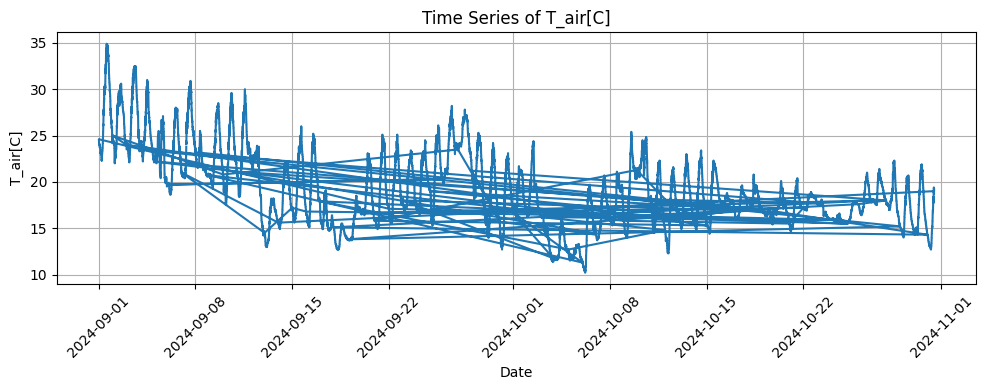

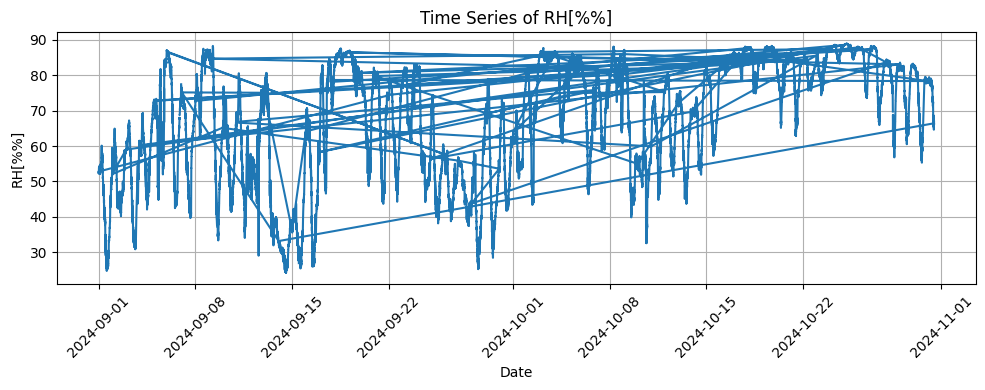

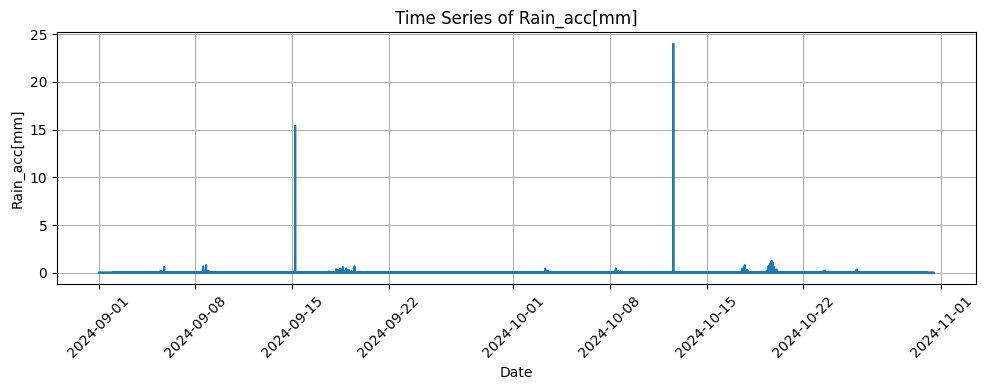

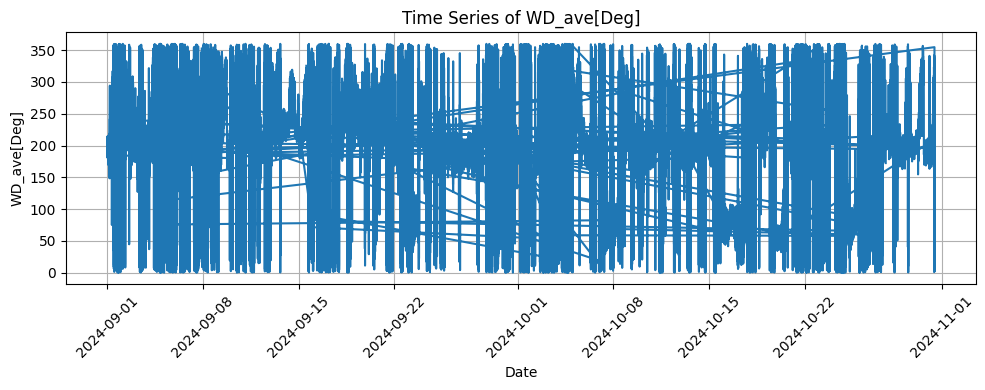

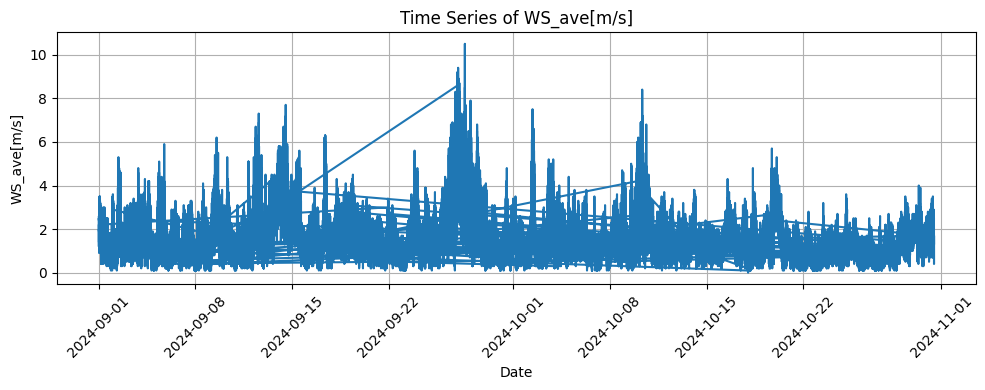

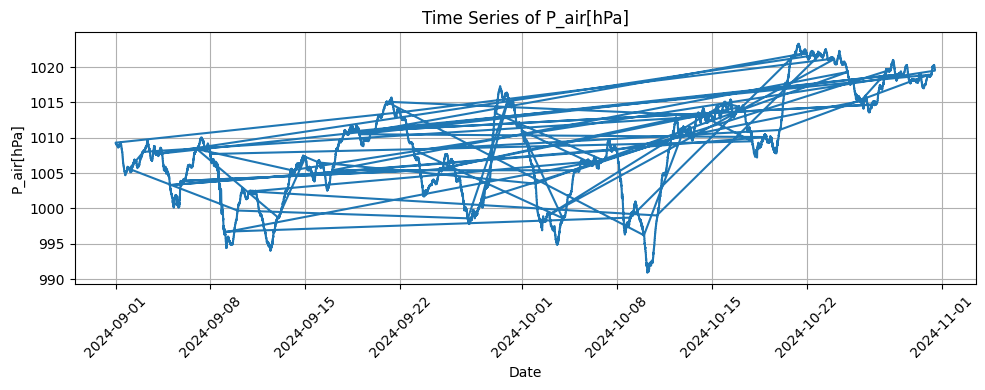

In [44]:
import matplotlib.pyplot as plt
# Convert the 'datetime' column to a pandas datetime object for time series plotting
met['datetime'] = pd.to_datetime(met['datetime'])

# Set 'datetime' as the index for easy plotting of the time series
met.set_index('datetime', inplace=True)

# Creating individual plots for each variable since they have different units
for column in met.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(met.index, met[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_12686/4166561754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nox['datetime'] = pd.to_datetime(nox['datetime'])


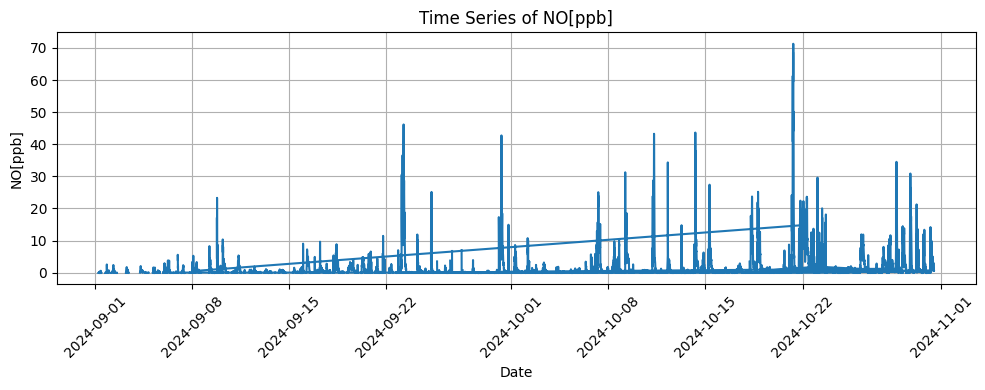

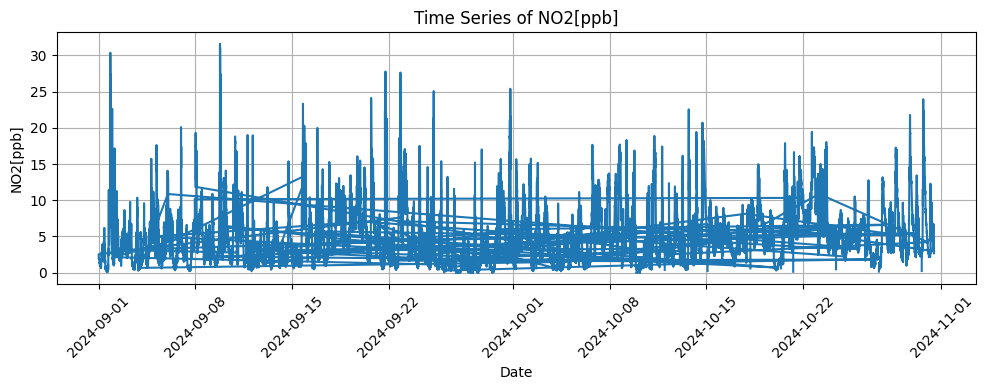

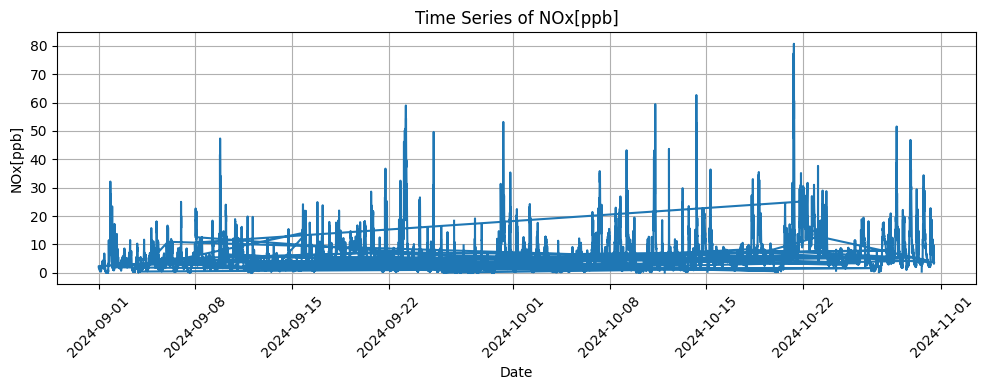

In [45]:
# Convert the 'datetime' column to a pandas datetime object for time series plotting
nox['datetime'] = pd.to_datetime(nox['datetime'])

# Set 'datetime' as the index for easy plotting of the time series
nox.set_index('datetime', inplace=True)

# Creating individual plots for each variable since they have different units
for column in nox.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(nox.index, nox[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_12686/2357355059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o3['datetime'] = pd.to_datetime(o3['datetime'])


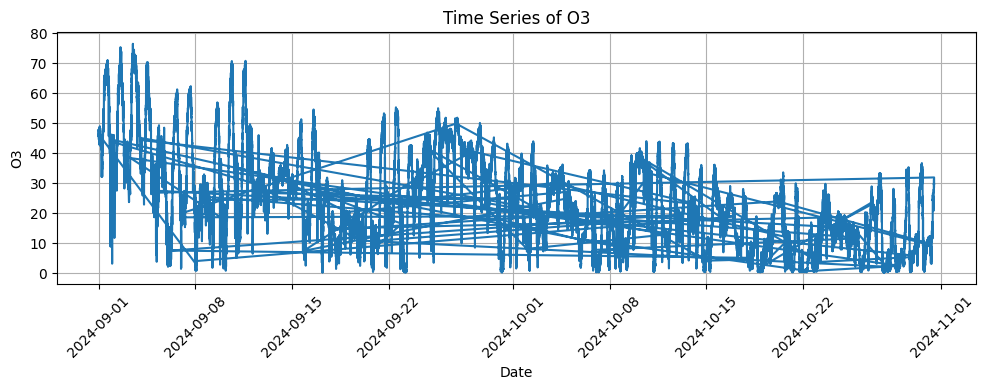

In [46]:
# Convert the 'datetime' column to a pandas datetime object for time series plotting
o3['datetime'] = pd.to_datetime(o3['datetime'])

# Set 'datetime' as the index for easy plotting of the time series
o3.set_index('datetime', inplace=True)

# Creating individual plots for each variable since they have different units
for column in o3.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(o3.index, o3[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_12686/941577170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['datetime'] = pd.to_datetime(bc['datetime'])


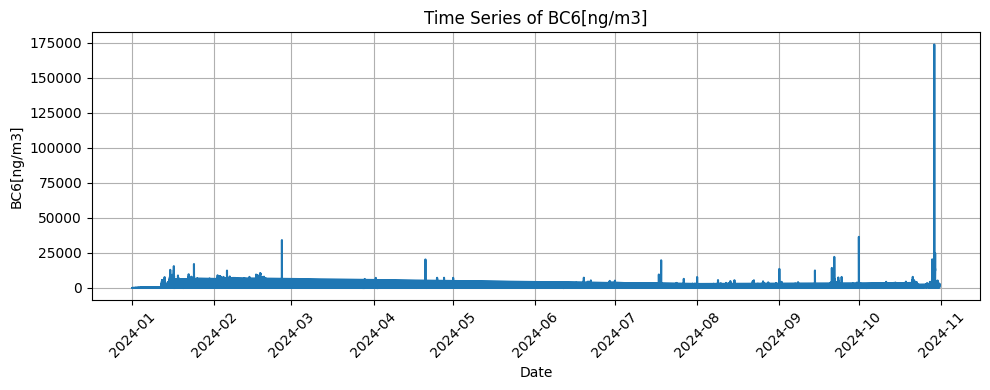

In [47]:
# Convert the 'datetime' column to a pandas datetime object for time series plotting
bc['datetime'] = pd.to_datetime(bc['datetime'])

# Set 'datetime' as the index for easy plotting of the time series
bc.set_index('datetime', inplace=True)

# Creating individual plots for each variable since they have different units
for column in bc.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(bc.index, bc[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Hourly averages

In [69]:
met = met.resample('h').mean()
nox = nox.resample('h').mean()
o3 = o3.resample('h').mean()
bc = bc.resample('h').mean()

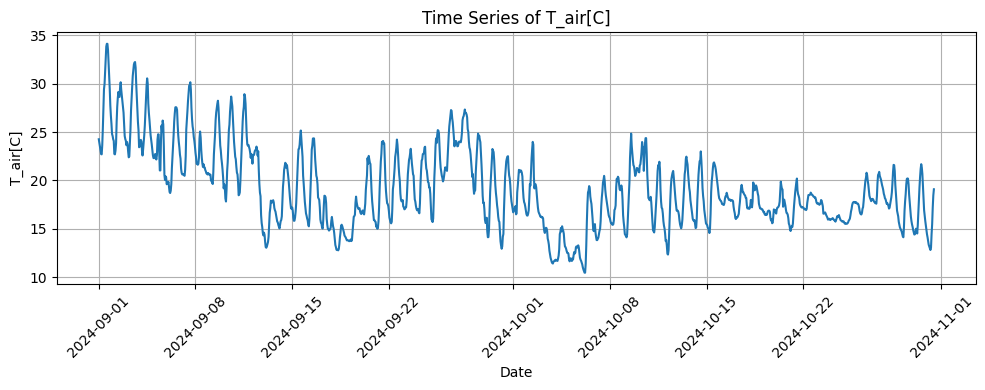

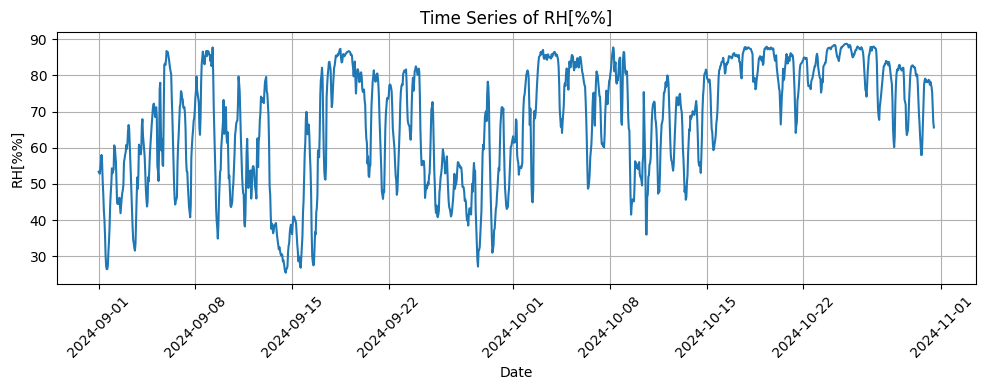

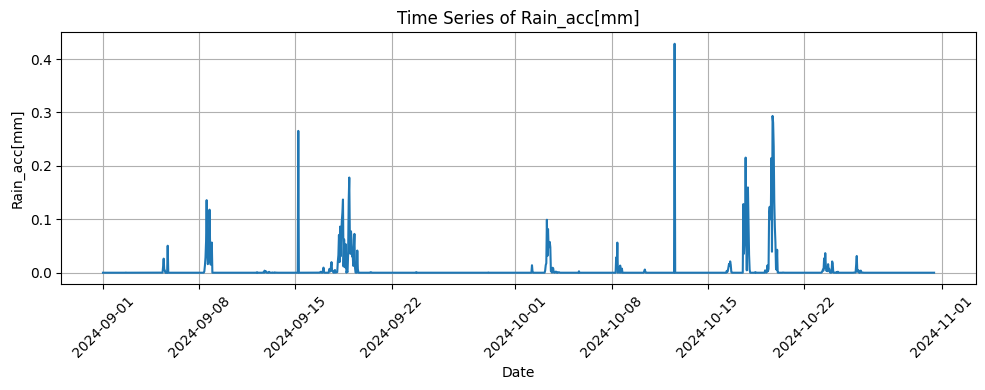

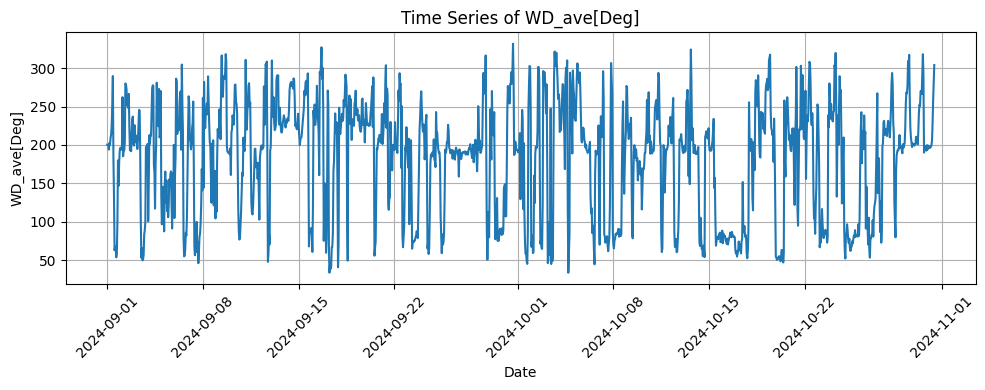

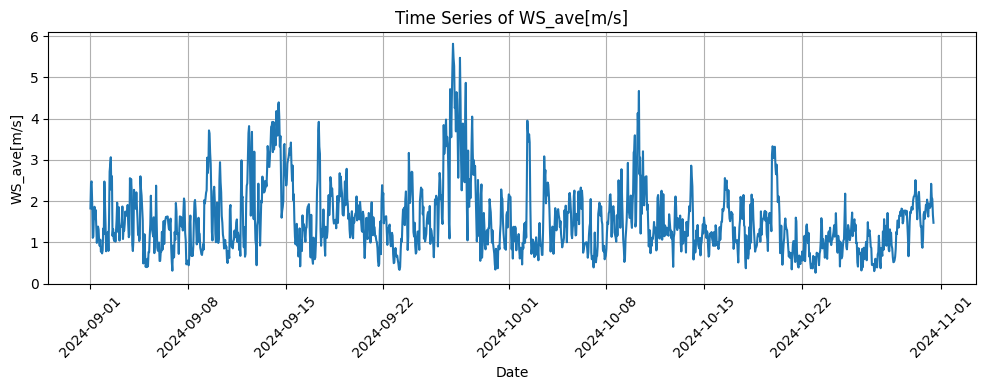

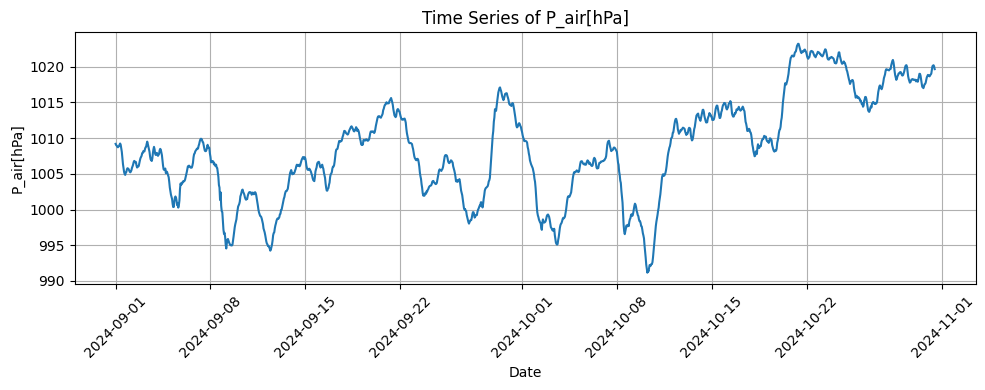

In [70]:
# Creating individual plots for each variable since they have different units
for column in met.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(met.index, met[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

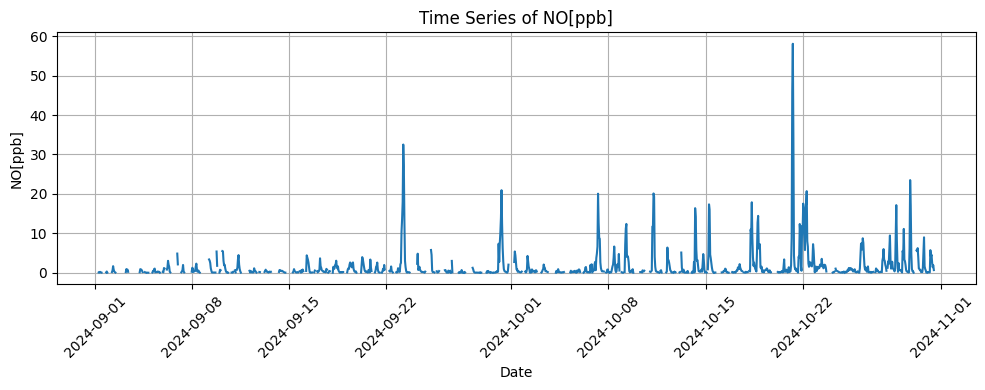

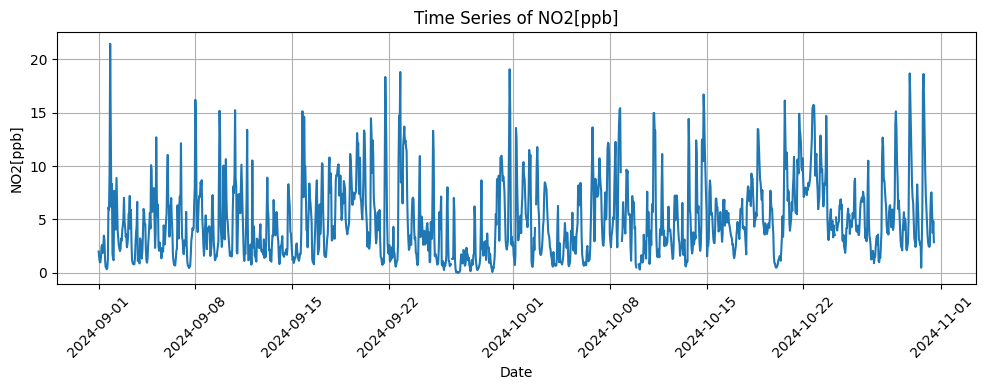

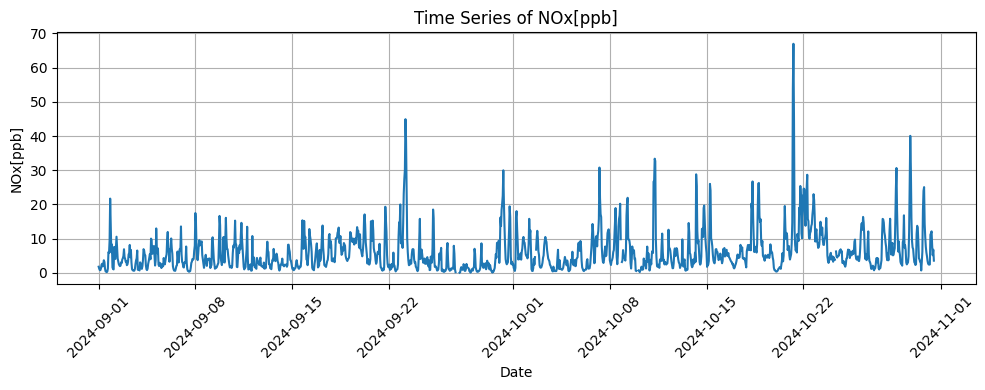

In [71]:
# Creating individual plots for each variable since they have different units
for column in nox.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(nox.index, nox[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

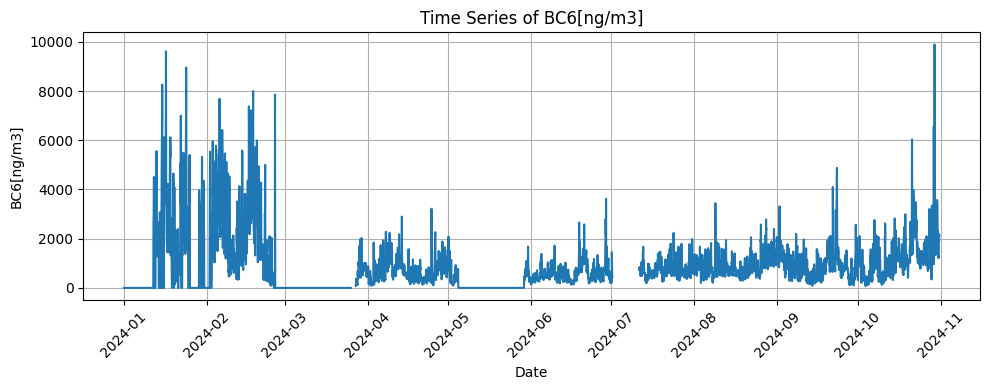

In [72]:
# Creating individual plots for each variable since they have different units
for column in bc.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(bc.index, bc[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

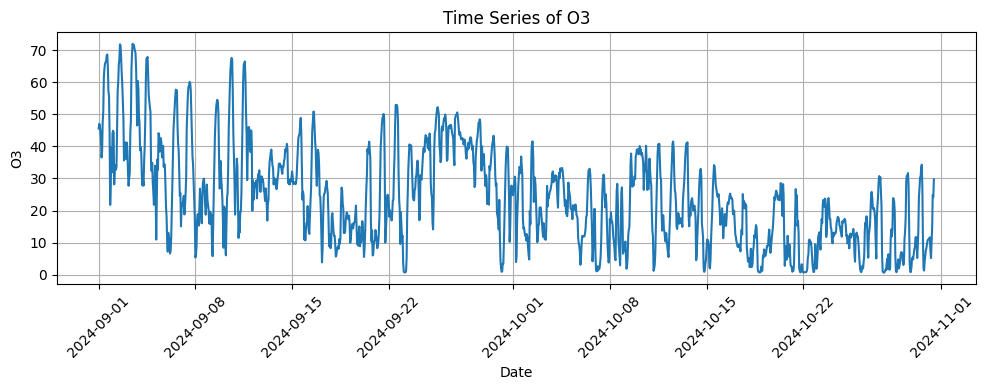

In [74]:
# Creating individual plots for each variable since they have different units
for column in o3.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(o3.index, o3[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Radiation Data

In [55]:
radiation_data = pd.read_csv('/home/coliewo/Desktop/DATA/CNR/MET/solar/solar_sep_oct.csv')
radiation_data

Inizio validità (UTC)        Fine validità (UTC)  \
0     2024-08-31 21:00:00+00:00  2024-08-31 22:00:00+00:00   
1     2024-08-31 22:00:00+00:00  2024-08-31 23:00:00+00:00   
2     2024-08-31 23:00:00+00:00  2024-09-01 00:00:00+00:00   
3     2024-09-01 00:00:00+00:00  2024-09-01 01:00:00+00:00   
4     2024-09-01 01:00:00+00:00  2024-09-01 02:00:00+00:00   
...                         ...                        ...   
1438  2024-10-30 19:00:00+00:00  2024-10-30 20:00:00+00:00   
1439  2024-10-30 20:00:00+00:00  2024-10-30 21:00:00+00:00   
1440  2024-10-30 21:00:00+00:00  2024-10-30 22:00:00+00:00   
1441  2024-10-30 22:00:00+00:00  2024-10-30 23:00:00+00:00   
1442  2024-10-30 23:00:00+00:00  2024-10-31 00:00:00+00:00   

      Irradianza globale visibile media oraria - componente dall'alto (W/M**2)  
0                                                 -11.0                         
1                                                  -9.0                         
2                                                  -8.0                         
3                                                  -8.0                         
4                                                  -7.0                         
...                                                 ...                         
1438                                               -5.0                         
1439                                               -6.0                         
1440                                               -5.0                         
1441                                               -5.0                         
1442                                               -5.0                         

[1443 rows x 3 columns]

In [56]:
radiation_data.columns = ['Start_Time_UTC', 'End_Time_UTC', 'Radiation_Value']

In [59]:
radiation_data['datetime'] = pd.to_datetime(radiation_data['Start_Time_UTC'])  #important
radiation_data['End_Time_UTC'] = pd.to_datetime(radiation_data['End_Time_UTC'])
radiation_data['Radiation_Value'] = pd.to_numeric(radiation_data['Radiation_Value'], errors='coerce') #The errors='coerce' parameter ensures that any value that cannot be converted to a number (e.g., non-numeric strings) is replaced with NaN (Not a Number).


In [60]:
#Replace instead the negative values with zeros, since they appear at night.
radiation_data['Radiation_Value'] = radiation_data['Radiation_Value'].apply(lambda x: max(x, 0))

In [62]:
rad=radiation_data[['datetime','Radiation_Value']]

In [63]:
rad

datetime  Radiation_Value
0    2024-08-31 21:00:00+00:00              0.0
1    2024-08-31 22:00:00+00:00              0.0
2    2024-08-31 23:00:00+00:00              0.0
3    2024-09-01 00:00:00+00:00              0.0
4    2024-09-01 01:00:00+00:00              0.0
...                        ...              ...
1438 2024-10-30 19:00:00+00:00              0.0
1439 2024-10-30 20:00:00+00:00              0.0
1440 2024-10-30 21:00:00+00:00              0.0
1441 2024-10-30 22:00:00+00:00              0.0
1442 2024-10-30 23:00:00+00:00              0.0

[1443 rows x 2 columns]

/tmp/ipykernel_12686/1461376502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rad['datetime'] = pd.to_datetime(rad['datetime'])


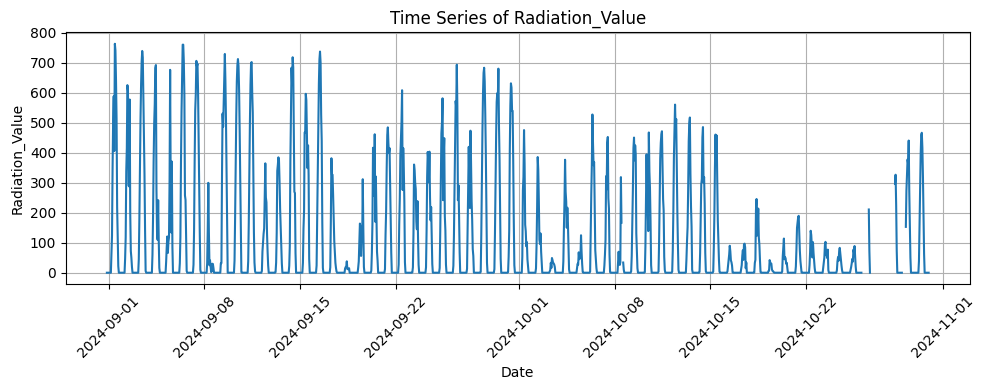

In [65]:
# Convert the 'datetime' column to a pandas datetime object for time series plotting
rad['datetime'] = pd.to_datetime(rad['datetime'])

# Set 'datetime' as the index for easy plotting of the time series
rad.set_index('datetime', inplace=True)

# Creating individual plots for each variable since they have different units
for column in rad.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(rad.index, rad[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Merge the files

In [81]:
rad.tz_localize(None)

Radiation_Value
datetime                            
2024-08-31 21:00:00              0.0
2024-08-31 22:00:00              0.0
2024-08-31 23:00:00              0.0
2024-09-01 00:00:00              0.0
2024-09-01 01:00:00              0.0
...                              ...
2024-10-30 19:00:00              0.0
2024-10-30 20:00:00              0.0
2024-10-30 21:00:00              0.0
2024-10-30 22:00:00              0.0
2024-10-30 23:00:00              0.0

[1443 rows x 1 columns]

In [83]:
import pandas as pd

# List of your DataFrames with 'datetime' as the index
dataframes = [o3, nox, rad.tz_localize(None), met]  # Add all your DataFrames here

# Combine DataFrames along the columns (axis=1), aligning on 'datetime' index
combined_df = pd.concat(dataframes, axis=1, join='outer')  # 'outer' join includes all datetime values


In [84]:
combined_df

O3   NO[ppb]  NO2[ppb]   NOx[ppb]  \
datetime                                                        
2024-08-31 21:00:00        NaN       NaN       NaN        NaN   
2024-08-31 22:00:00        NaN       NaN       NaN        NaN   
2024-08-31 23:00:00        NaN       NaN       NaN        NaN   
2024-09-01 00:00:00  45.585167       NaN  1.991100   1.764100   
2024-09-01 01:00:00  47.062833       NaN  1.397450   1.166633   
...                        ...       ...       ...        ...   
2024-10-31 07:00:00  10.224517  4.571233  7.532967  12.104100   
2024-10-31 08:00:00  14.608500  2.573367  5.426767   8.000183   
2024-10-31 09:00:00  24.799167  1.386567  3.730650   5.117167   
2024-10-31 10:00:00  24.162333  1.893933  4.843967   6.737933   
2024-10-31 11:00:00  29.737576  0.670848  2.860697   3.531667   

                     Radiation_Value   T_air[C]     RH[%%]  Rain_acc[mm]  \
datetime                                                                   
2024-08-31 21:00:00              0.0        NaN        NaN           NaN   
2024-08-31 22:00:00              0.0        NaN        NaN           NaN   
2024-08-31 23:00:00              0.0        NaN        NaN           NaN   
2024-09-01 00:00:00              0.0  24.260000  53.386667           0.0   
2024-09-01 01:00:00              0.0  23.878333  53.080000           0.0   
...                              ...        ...        ...           ...   
2024-10-31 07:00:00              NaN  14.430000  76.768333           0.0   
2024-10-31 08:00:00              NaN  15.480000  75.386667           0.0   
2024-10-31 09:00:00              NaN  17.185000  71.528333           0.0   
2024-10-31 10:00:00              NaN  18.438333  67.053333           0.0   
2024-10-31 11:00:00              NaN  19.084615  65.615385           0.0   

                     WD_ave[Deg]  WS_ave[m/s]   P_air[hPa]  
datetime                                                    
2024-08-31 21:00:00          NaN          NaN          NaN  
2024-08-31 22:00:00          NaN          NaN          NaN  
2024-08-31 23:00:00          NaN          NaN          NaN  
2024-09-01 00:00:00   200.283333     1.825000  1009.198333  
2024-09-01 01:00:00   199.843333     2.445000  1009.011667  
...                          ...          ...          ...  
2024-10-31 07:00:00   205.635000     2.421667  1020.060000  
2024-10-31 08:00:00   228.015000     2.096667  1020.156667  
2024-10-31 09:00:00   258.333333     2.050000  1020.213333  
2024-10-31 10:00:00   280.665000     1.665000  1020.051667  
2024-10-31 11:00:00   303.853846     1.476923  1019.661538  

[1455 rows x 11 columns]

In [85]:

# Save the combined DataFrame to a CSV file
combined_df.to_csv('/home/coliewo/Desktop/DATA/CNR/merged_output2.csv')

print(f"Combined file saved to {output_file_path}")


Combined file saved to /home/coliewo/Desktop/DATA/CNR/Black Carbon/bc_jan_oct.csv


In [87]:
bc.to_csv('/home/coliewo/Desktop/DATA/CNR/bc.csv')

#### Let's now start the analysis?

In [88]:
nais

<xarray.Dataset>
Dimensions:             (time: 1417, diameter: 55, flag: 72)
Coordinates:
  * diameter            (diameter) float64 8.029e-10 8.628e-10 ... 4.155e-08
  * time                (time) datetime64[ns] 2024-09-01 ... 2024-10-30
  * flag                (flag) <U34 'Analyzer +150 V is too low' ... 'Uses un...
Data variables:
    neg_ions            (time, diameter) float64 825.1 1.249e+03 ... nan
    pos_ions            (time, diameter) float64 0.3276 114.3 ... 1.815e+03 nan
    neg_particles       (time, diameter) float64 nan nan ... 8.7e+03 8.971e+03
    pos_particles       (time, diameter) float64 nan nan ... 1.439e+04 1.408e+04
    neg_ion_flags       (time, flag) int64 ...
    pos_ion_flags       (time, flag) int64 ...
    neg_particle_flags  (time, flag) int64 ...
    pos_particle_flags  (time, flag) int64 ...
Attributes: (12/14)
    measurement_location:            CNR Bologna
    description:                     Rooftop Measurements
    longitude:                       11.34
    latitude:                        44.52
    inlet_length:                    0.85
    do_inlet_loss_correction:        True
    ...                              ...
    remove_corona_ions:              True
    fill_temperature:                273.15
    fill_pressure:                   101325.0
    fill_flowrate:                   54.0
    dilution_on:                     False
    resolution:                      5min

In [89]:
nais2 = xr.open_dataset("/home/coliewo/Desktop/DATA/CNR/cnr_may_aug.nc")
bad_data2 = xr.open_dataset("/home/coliewo/Desktop/DATA/CNR/cnr_may_aug_bad_data_bounds.nc")
nais2 = remove_bad_data(nais2, bad_data2)

In [90]:
nais2

<xarray.Dataset>
Dimensions:             (diameter: 55, time: 2569, flag: 86)
Coordinates:
  * diameter            (diameter) float64 8.029e-10 8.628e-10 ... 4.155e-08
  * time                (time) datetime64[ns] 2024-05-17 ... 2024-09-01
  * flag                (flag) <U61 '+ postfilter voltage may be too high' .....
Data variables:
    neg_ions            (time, diameter) float64 nan nan nan ... 395.4 527.2 nan
    pos_ions            (time, diameter) float64 nan nan nan ... 497.2 449.8 nan
    neg_particles       (time, diameter) float64 nan nan ... 5.219e+03 4.769e+03
    pos_particles       (time, diameter) float64 nan nan ... 5.185e+03 5.356e+03
    neg_ion_flags       (time, flag) int64 ...
    pos_ion_flags       (time, flag) int64 ...
    neg_particle_flags  (time, flag) int64 ...
    pos_particle_flags  (time, flag) int64 ...
Attributes: (12/14)
    measurement_location:            CNR Bologna
    description:                     Rooftop Measurements
    longitude:                       11.34
    latitude:                        44.52
    inlet_length:                    0.85
    do_inlet_loss_correction:        True
    ...                              ...
    remove_corona_ions:              True
    fill_temperature:                273.15
    fill_pressure:                   101325.0
    fill_flowrate:                   54.0
    dilution_on:                     False
    resolution:                      5min

In [99]:
# Concatenate along a specific dimension, such as 'time'
complete_nais = xr.concat([nais2, nais], dim="time")
complete_nais

<xarray.Dataset>
Dimensions:             (diameter: 55, flag: 102, time: 3986)
Coordinates:
  * diameter            (diameter) float64 8.029e-10 8.628e-10 ... 4.155e-08
  * flag                (flag) <U61 '+ postfilter voltage may be too high' .....
  * time                (time) datetime64[ns] 2024-05-17 ... 2024-10-30
Data variables:
    neg_ions            (time, diameter) float64 nan nan nan ... 1.969e+03 nan
    pos_ions            (time, diameter) float64 nan nan nan ... 1.815e+03 nan
    neg_particles       (time, diameter) float64 nan nan ... 8.7e+03 8.971e+03
    pos_particles       (time, diameter) float64 nan nan ... 1.439e+04 1.408e+04
    neg_ion_flags       (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    pos_ion_flags       (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    neg_particle_flags  (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    pos_particle_flags  (time, flag) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
Attributes: (12/14)
    measurement_location:            CNR Bologna
    description:                     Rooftop Measurements
    longitude:                       11.34
    latitude:                        44.52
    inlet_length:                    0.85
    do_inlet_loss_correction:        True
    ...                              ...
    remove_corona_ions:              True
    fill_temperature:                273.15
    fill_pressure:                   101325.0
    fill_flowrate:                   54.0
    dilution_on:                     False
    resolution:                      5min

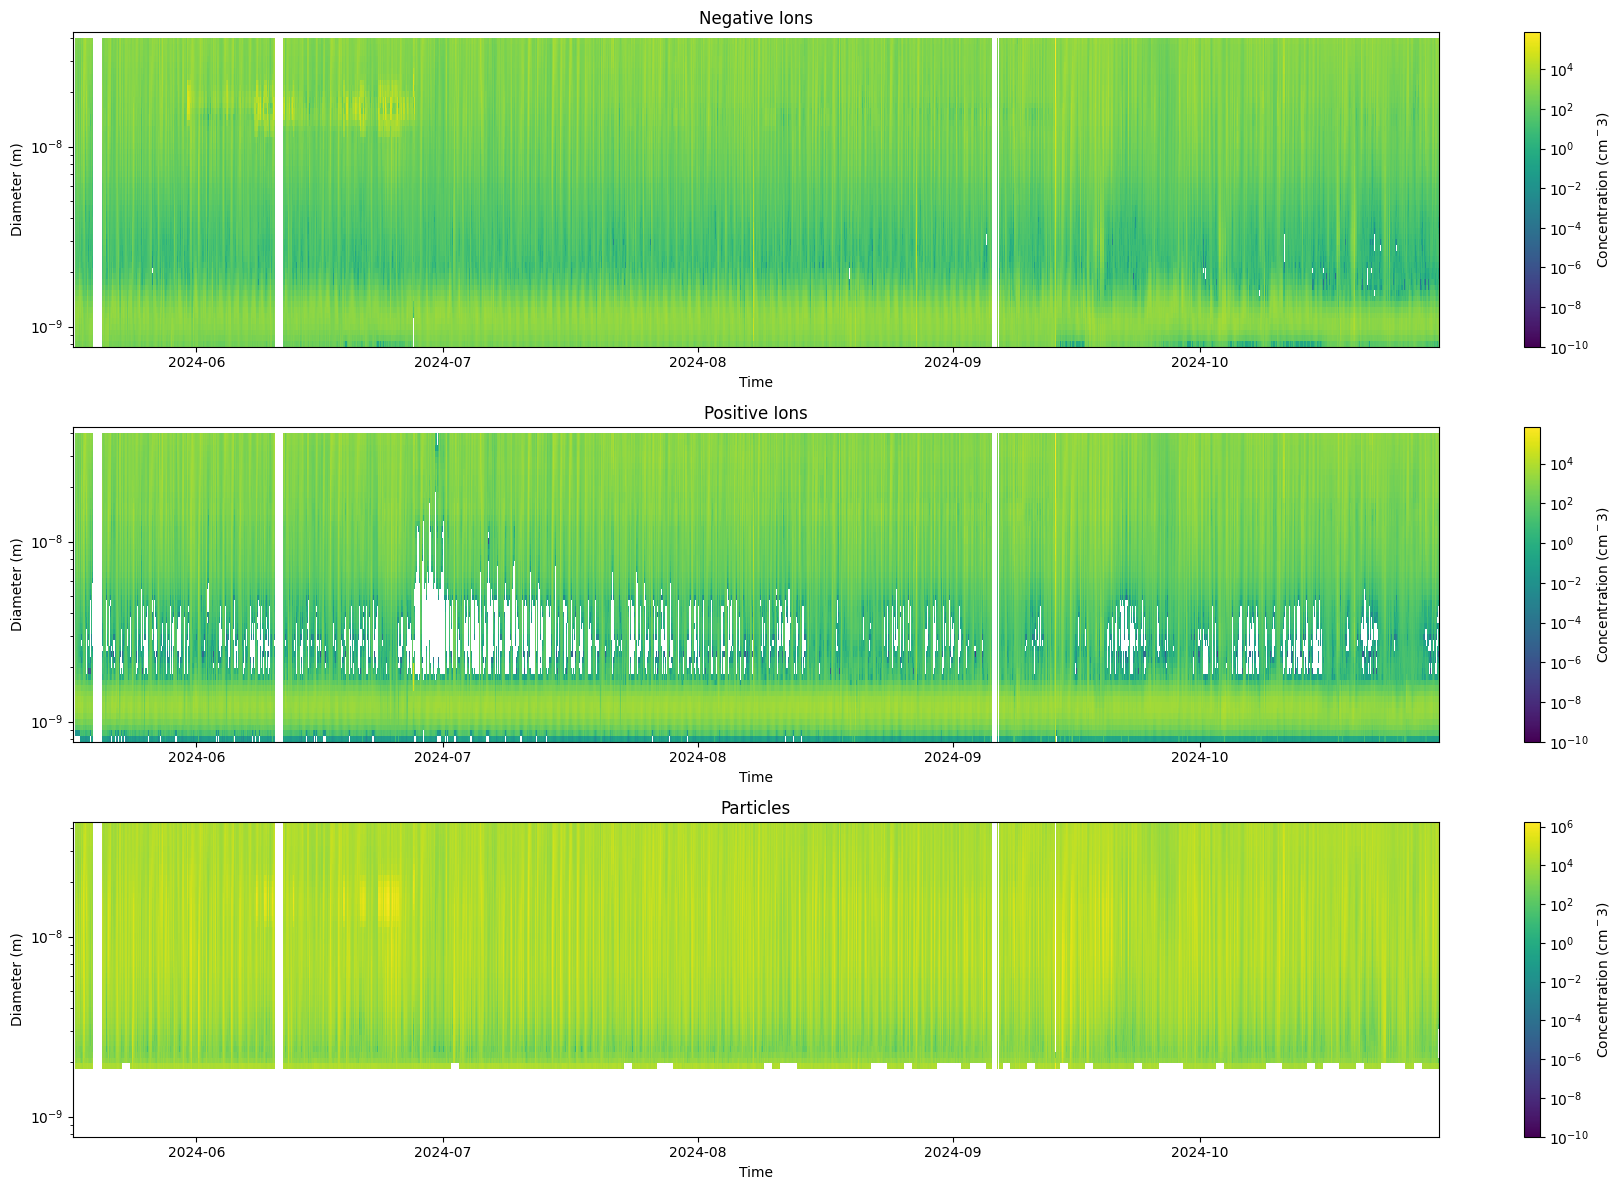

In [100]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Extract the necessary variables
neg_ions = complete_nais['neg_ions']
pos_ions = complete_nais['pos_ions']

# Calculate particles (positive + negative particles)
particles = complete_nais['pos_particles'] + complete_nais['neg_particles']

# Function to plot the complete_nais with non-negative colorbars
def plot_spectral_data(var, title, ax):
    # Apply log normalization for colorbar
    log_norm = mcolors.LogNorm(vmin= 1e-10,  # Avoid log(0)
                           vmax=var.max())
    # Plot the contour
    c = ax.pcolormesh(var['time'], var['diameter'], var.T, shading='auto', cmap='viridis',norm=log_norm)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax, label='Concentration (cm$^-3$)')
    #cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(18, 12))

plot_spectral_data(neg_ions, 'Negative Ions', axs[0])
plot_spectral_data(pos_ions, 'Positive Ions', axs[1])
plot_spectral_data(particles, 'Particles', axs[2])

plt.tight_layout()
plt.show()

### Nanoparticle ranking analysis
![alt text](image-2.png)

### Use total particles data

In [117]:
# Step 1: Extract data for the diameter range required 2.5-5nm
sub_5nm = particles.sel(diameter=slice(2.5e-9, 5e-9)) 
sub_5nm

<xarray.DataArray (time: 3986, diameter: 10)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [ 549.16129622,  740.96409975,  882.55540649, ..., 3149.18228927,
        3732.82374482, 4351.42074672],
       [ 922.58062613,  890.90491267,  843.1636855 , ..., 2910.822483  ,
        3435.97203699, 4019.98079116],
       [   0.        ,    0.        ,    0.        , ..., 1924.39380816,
        2422.65495106, 2668.05344586]])
Coordinates:
  * diameter  (diameter) float64 2.545e-09 2.736e-09 ... 4.538e-09 4.879e-09
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-10-30

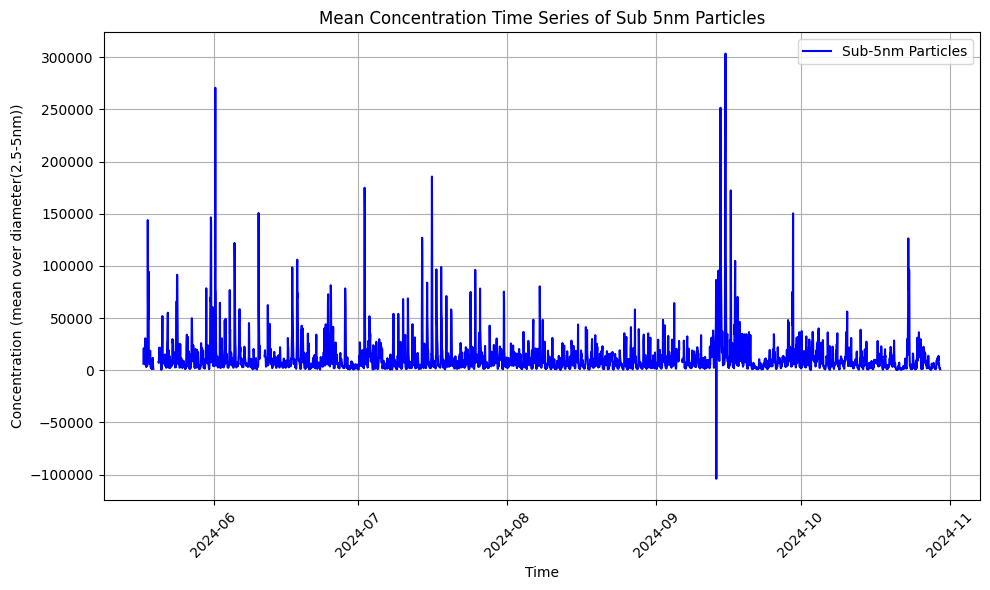

In [118]:
# Plot for sub-5nm particles
import matplotlib.pyplot as plt
# Mean across the diameter dimension to get mean concentrations
sub_5nm_mean = sub_5nm.mean(dim='diameter')
# Extract time coordinates
time = sub_5nm['time'].values

plt.figure(figsize=(10, 6))
plt.plot(time, sub_5nm_mean, label='Sub-5nm Particles', color='blue')

# Customize the plot for ions
plt.title('Mean Concentration Time Series of Sub 5nm Particles')
plt.xlabel('Time')
plt.ylabel('Concentration (mean over diameter(2.5-5nm))')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

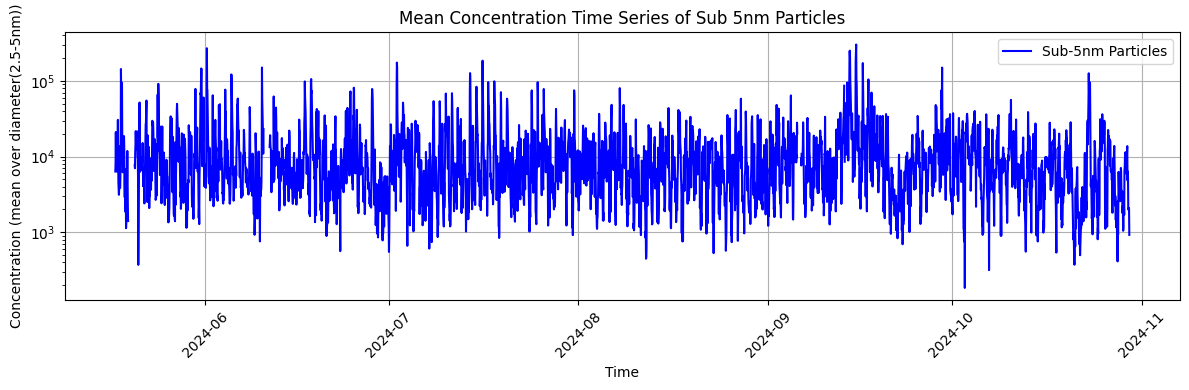

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Set negative values to NaN, so they don't affect the mean calculation
sub_5nm = sub_5nm.where(sub_5nm >= 0, np.nan)

# Mean across the diameter dimension to get mean concentrations, ignoring NaNs
sub_5nm_mean = sub_5nm.mean(dim='diameter', skipna=True)

# Extract time coordinates
time = sub_5nm['time'].values

plt.figure(figsize=(12, 4))
plt.plot(time, sub_5nm_mean, label='Sub-5nm Particles', color='blue')

# Customize the plot for ions
plt.title('Mean Concentration Time Series of Sub 5nm Particles')
plt.xlabel('Time')
plt.ylabel('Concentration (mean over diameter(2.5-5nm))')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [121]:
# Step 2: Smooth out the time series, apply rolling median over 2hr intervals

sub5nm_rollingmed = sub_5nm_mean.rolling(time=2, center=True).median()

# Drop NaN values resulting from the rolling operation
sub5nm_rollingmed = sub5nm_rollingmed.dropna(dim='time')
sub5nm_rollingmed

<xarray.DataArray (time: 3904)>
array([ 7324.25427915, 14716.4034702 , 14535.35848066, ...,
        2044.09723628,  2054.02249941,  1465.89296303])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-17T09:00:00 ... 2024-10-30

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


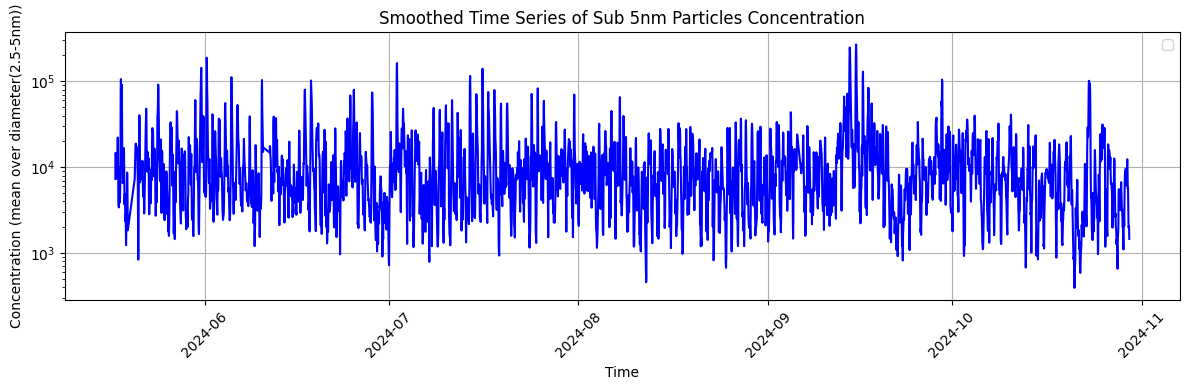

In [125]:
plt.figure(figsize=(12, 4))
plt.plot(sub5nm_rollingmed['time'].values, sub5nm_rollingmed, color='blue')

# Customize the plot for ions
plt.title('Smoothed Time Series of Sub 5nm Particles Concentration')
plt.xlabel('Time')
plt.ylabel('Concentration (mean over diameter(2.5-5nm))')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [126]:
# subdivide the data to the months
may = sub5nm_rollingmed.sel(time=slice('2024-05', '2024-05'))
june = sub5nm_rollingmed.sel(time=slice('2024-06', '2024-06'))
july = sub5nm_rollingmed.sel(time=slice('2024-07', '2024-07'))
aug = sub5nm_rollingmed.sel(time=slice('2024-08', '2024-08'))
sep = sub5nm_rollingmed.sel(time=slice('2024-09', '2024-09'))
oct = sub5nm_rollingmed.sel(time=slice('2024-10', '2024-10'))

In [128]:
# Step 3: Now, calculate diurnal variations, e.g., the mean across each hour for each month
may_diurnal_variation = may.groupby(may.time.dt.hour).mean(dim='time')
june_diurnal_variation = june.groupby(june.time.dt.hour).mean(dim='time')
july_diurnal_variation = july.groupby(july.time.dt.hour).mean(dim='time')
aug_diurnal_variation = aug.groupby(aug.time.dt.hour).mean(dim='time')
sep_diurnal_variation = sep.groupby(sep.time.dt.hour).mean(dim='time')
oct_diurnal_variation = oct.groupby(oct.time.dt.hour).mean(dim='time')

In [130]:
oct_diurnal_variation['hour']

<xarray.DataArray 'hour' (hour: 24)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])
Coordinates:
  * hour     (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
Attributes:
    timezone:  utc

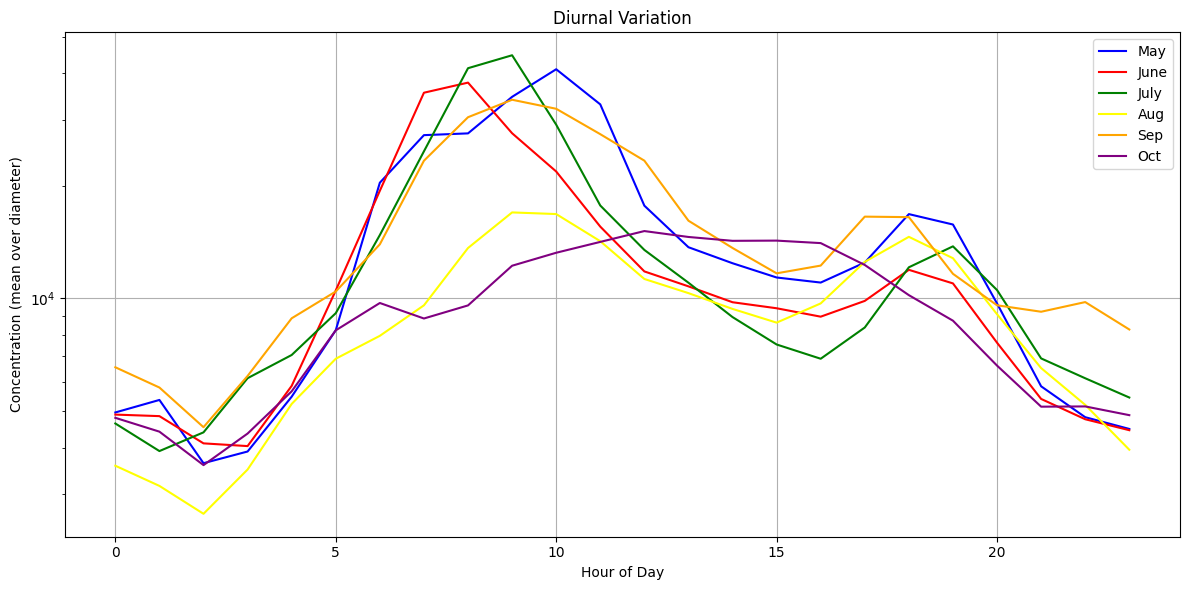

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(may_diurnal_variation['hour'], may_diurnal_variation, label='May', color='blue')
plt.plot(june_diurnal_variation['hour'], june_diurnal_variation, label='June', color='red')
plt.plot(july_diurnal_variation['hour'], july_diurnal_variation, label='July', color='green')
plt.plot(aug_diurnal_variation['hour'], aug_diurnal_variation, label='Aug', color='yellow')
plt.plot(sep_diurnal_variation['hour'], sep_diurnal_variation, label='Sep', color='orange')
plt.plot(oct_diurnal_variation['hour'], oct_diurnal_variation, label='Oct', color='purple')

# Customize the plot for ions
plt.title('Diurnal Variation')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

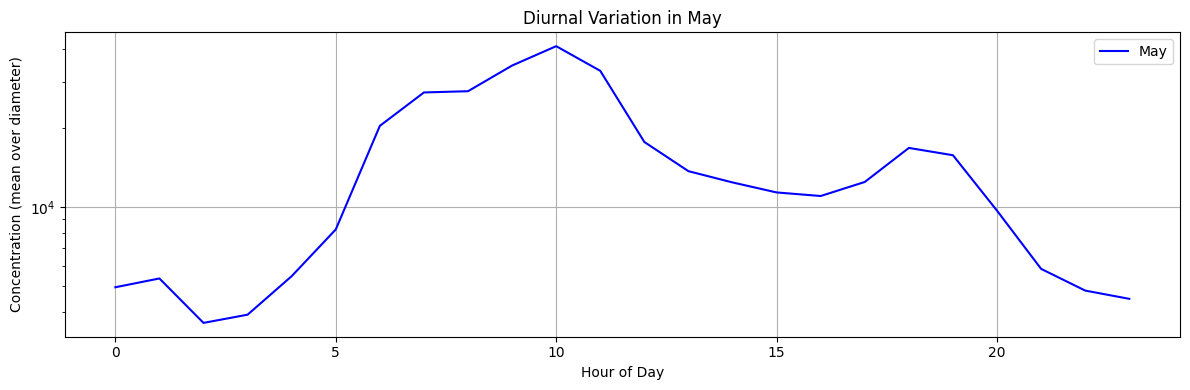

In [132]:
plt.figure(figsize=(12, 4))
plt.plot(may_diurnal_variation['hour'], may_diurnal_variation, label='May', color='blue')

# Customize the plot for ions
plt.title('Diurnal Variation in May')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

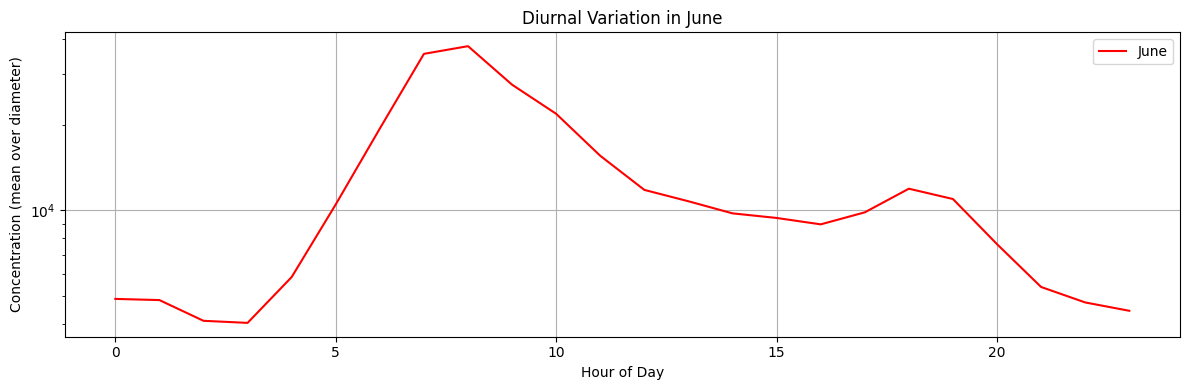

In [133]:
plt.figure(figsize=(12, 4))
plt.plot(june_diurnal_variation['hour'], june_diurnal_variation, label='June', color='red')

# Customize the plot for ions
plt.title('Diurnal Variation in June')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

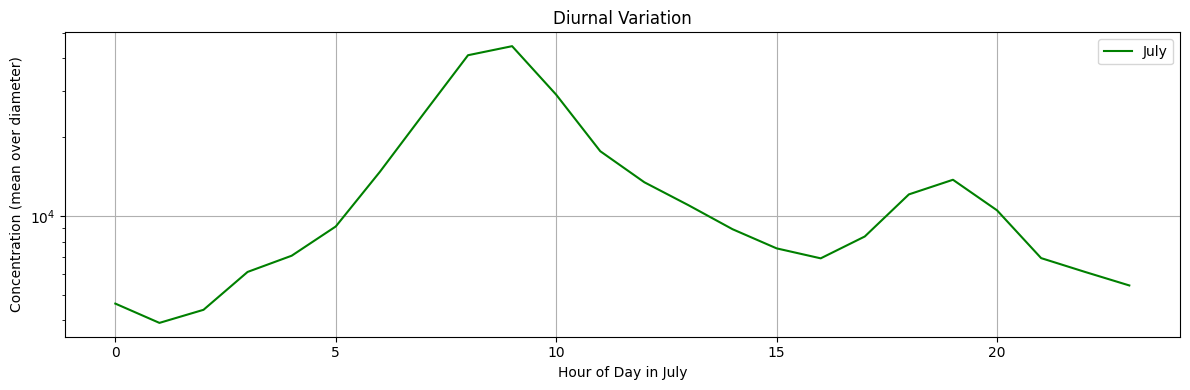

In [134]:
plt.figure(figsize=(12, 4))

plt.plot(july_diurnal_variation['hour'], july_diurnal_variation, label='July', color='green')


# Customize the plot for ions
plt.title('Diurnal Variation')
plt.xlabel('Hour of Day in July')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

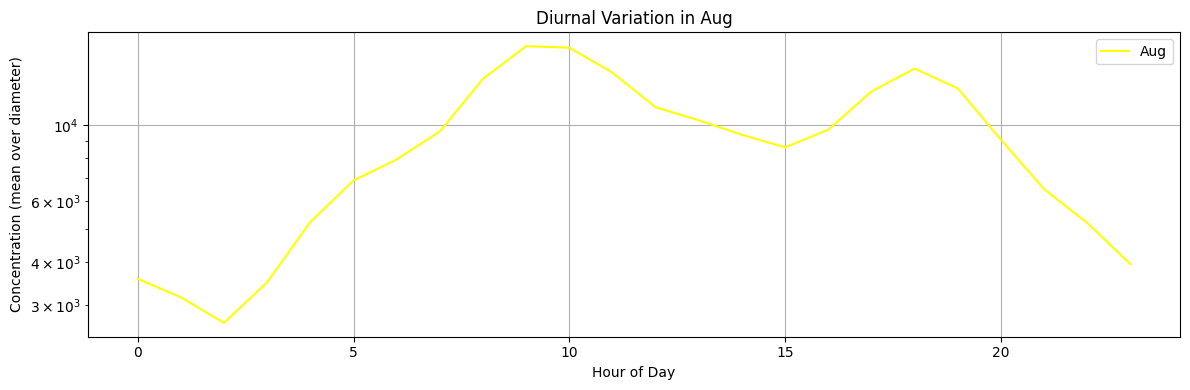

In [135]:
plt.figure(figsize=(12, 4))

plt.plot(aug_diurnal_variation['hour'], aug_diurnal_variation, label='Aug', color='yellow')

# Customize the plot for ions
plt.title('Diurnal Variation in Aug')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

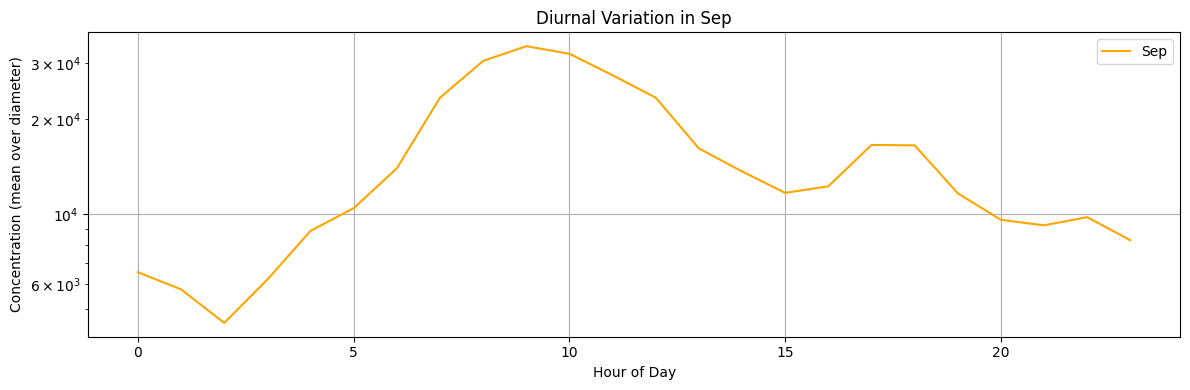

In [136]:
plt.figure(figsize=(12, 4))

plt.plot(sep_diurnal_variation['hour'], sep_diurnal_variation, label='Sep', color='orange')

# Customize the plot for ions
plt.title('Diurnal Variation in Sep')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

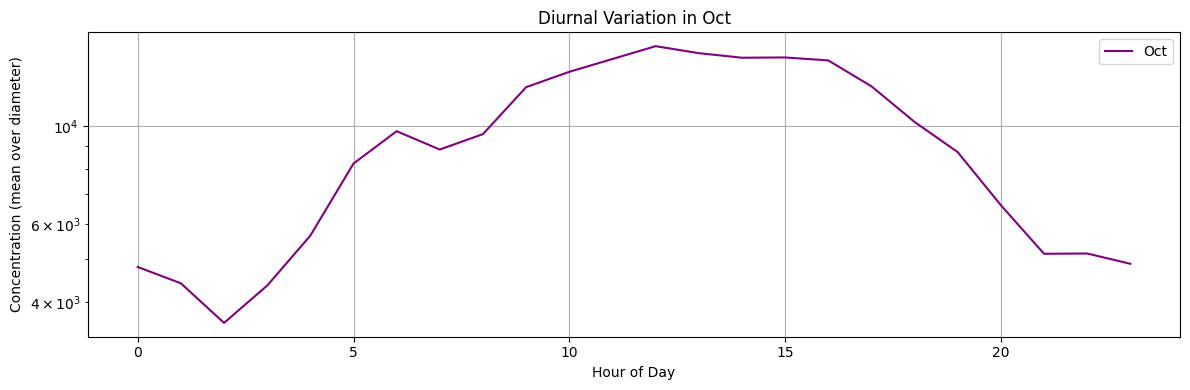

In [137]:
plt.figure(figsize=(12, 4))

plt.plot(oct_diurnal_variation['hour'], oct_diurnal_variation, label='Oct', color='purple')

# Customize the plot for ions
plt.title('Diurnal Variation in Oct')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [138]:
# Now for each day, we calculate the background and active times, ie; the median and max values
daily_median = sub5nm_rollingmed.resample(time='1D').median()
daily_max = sub5nm_rollingmed.resample(time='1D').max()
daily_change = daily_max - daily_median


In [144]:
daily_change

<xarray.DataArray (time: 167)>
array([ 11063.86683474,  96973.71393846,   5998.82181223,   3120.9208546 ,
        32557.25346745,  38748.4755896 ,  19796.76026042,  79932.59959173,
        10235.33625344,  26517.75045955,  33718.43510347,   7747.76656254,
        16159.05538814,  51377.02141563, 126843.86304295, 180693.22579602,
        34938.91030072,  28847.31299027,  45628.43827738, 105639.84430631,
        43508.48988974,  14885.93319168,  34132.69304339,  13086.87730129,
        91572.08491285,   6395.73998276,  27527.05436837,   6452.07485147,
        13665.74038851,   6269.06062379,  20277.22246187,  70420.39245209,
        92798.15637423,  18550.18943671,  19922.74341592,   9233.36062426,
        23730.11403496,   7898.22079133,  52885.69311608,  64138.23363255,
        17904.75595333,  10945.13516664,  69374.29946199,   4746.60775221,
         1982.91214724,  17550.87606358, 151365.91714512,  31936.83588701,
        18725.06111007,  14188.9799437 ,  15847.00065885,   8096.65665738,
        43557.09719849,  38275.90827897,  35403.95179546,  55848.58061415,
        33897.10177327,  11800.60527583, 109619.36039234,  64743.90152238,
       133663.71638554,  68140.31645761,  72002.48757017,  48221.7023517 ,
        45375.55436807,   4380.46076155,  11927.94789073,  12106.68256917,
        61727.09177271,  72427.71021436,  47523.49269444,  13978.36472126,
        26234.24634297,  17726.44553576,   9242.93682045,  61695.80792215,
        14232.53576115,   8411.2891223 ,   8864.02940854,  26336.17022666,
...
        10082.35272564,  18585.84191371,  18703.14670233,  10655.17980019,
        25137.41553568,  21547.98505408,  20716.42911699,  13037.60634503,
        10776.76626928,   6337.41298282,   7066.41471304,  11642.46874063,
        23621.15790996,  26815.73183823,  26392.65737241,  30698.9140496 ,
        26560.26128163,  23785.03914176,   8152.66685903,  22955.36015271,
        21972.89572503,  15236.37598791,  32207.96228573,  11270.13940478,
        14630.35464367,  24276.72992588,   8183.62460872,  11589.77477159,
        17171.24424106,   4656.64603098,  16060.42966171,  45399.03926206,
       218795.17865428, 250906.66543165, 116201.55125083,  64984.98469255,
        19039.79492539,  20278.66301915,  22567.55629276,   3574.74544717,
         5867.05265902,   5250.18090077,  13103.09370655,  22476.41324822,
        14127.57269777,   5011.13257538,  23860.9203491 ,  92708.75052109,
        20561.71725863,  16419.96630084,  14997.84632172,  23695.55029822,
        25420.19504334,  12595.13115663,  21809.74868354,  16735.54240557,
        25813.88673408,   5343.73430074,  30671.05754246,  17509.59434608,
        10523.85530482,  26290.22899106,  13586.87812707,   3710.04124885,
         2617.14203871,  10893.17280011,  14544.47731991,  13311.83949361,
        17343.91786503,   5401.00349038,   8709.6736959 ,  80915.02711829,
        12258.80859493,  15774.89887703,  11524.01851219,   8171.9524572 ,
         3442.63513495,   6439.52137276,      0.        ])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-17 2024-05-18 ... 2024-10-30

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


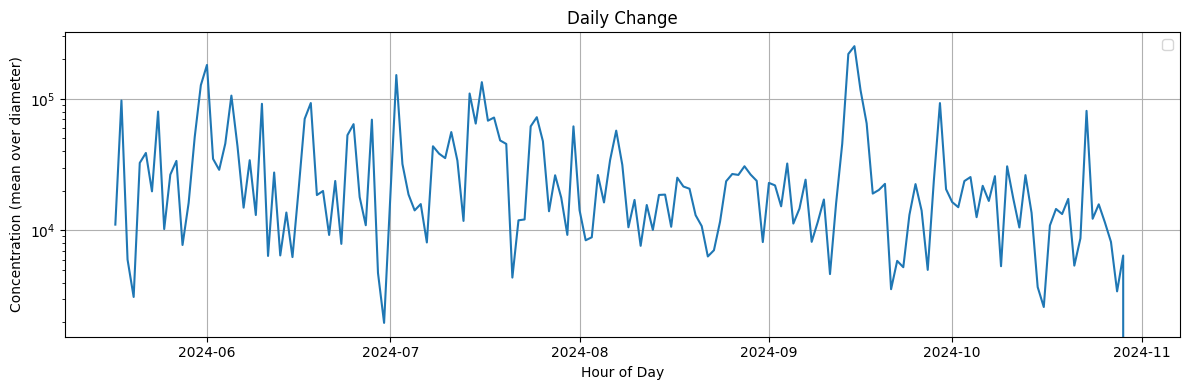

In [145]:
plt.figure(figsize=(12, 4))

plt.plot(daily_change['time'], daily_change)

# Customize the plot for ions
plt.title('Daily Change')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [146]:
daily_change.sel(time='2024-09-15')

<xarray.DataArray ()>
array(250906.66543165)
Coordinates:
    time     datetime64[ns] 2024-09-15

In [147]:
daily_change.max()

<xarray.DataArray ()>
array(250906.66543165)

### the day with highest difference

In [148]:
sep15 = sub5nm_rollingmed.sel(time=slice('2024-09-15', '2024-09-15'))

In [151]:
sep15

<xarray.DataArray (time: 24)>
array([ 18418.68754331,  13627.32060929,   5788.49993207,   6027.37969846,
         6938.51383093,   9272.33781855,  16281.03171916,  99425.57704953,
       205509.93170952, 268512.55892564, 204882.00815157,  99506.57817789,
        68844.37457434,  37932.93355829,  26295.21193331,  16793.09944468,
        15133.30411341,  25347.86575499,  33581.04445165,  23170.70291148,
         9798.89585196,  10426.03560152,   7831.57973537,   3042.68863783])
Coordinates:
  * time     (time) datetime64[ns] 2024-09-15 ... 2024-09-15T23:00:00

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


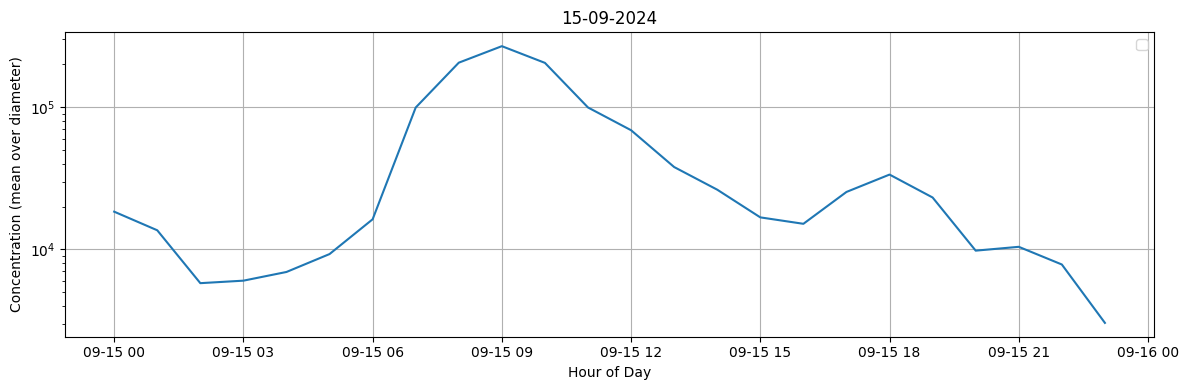

In [152]:
plt.figure(figsize=(12, 4))

plt.plot(sep15['time'], sep15)

# Customize the plot for ions
plt.title('15-09-2024')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [165]:
sep15.median()

<xarray.DataArray ()>
array(17605.893494)

In [163]:
sep15['time'].values[1]

numpy.datetime64('2024-09-15T01:00:00.000000000')

In [159]:
sep15['time'][sep15 == 18418.68754331]

<xarray.DataArray 'time' (time: 0)>
array([], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 
Attributes:
    timezone:  utc

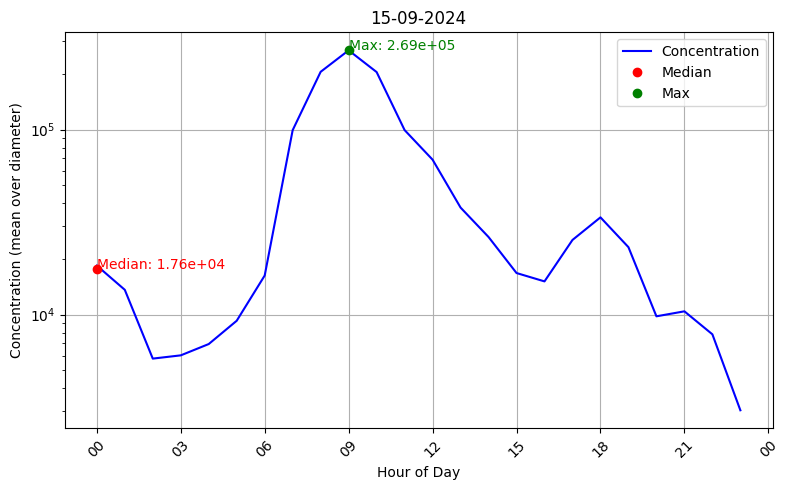

In [166]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Calculate the median and maximum values
median_value = sep15.median()
max_value = sep15.max()

# Find the index of the closest value to the median and max
median_index = np.abs(sep15 - median_value).argmin()
max_index = np.abs(sep15 - max_value).argmin()

# Get the times for the median and max values
median_time = sep15['time'].values[median_index]
max_time = sep15['time'].values[max_index]

plt.figure(figsize=(8, 5))
plt.plot(sep15['time'], sep15, label='Concentration', color='blue')
plt.title('15-09-2024')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter)')
plt.yscale('log')
plt.grid(True)

# Format the x-axis to show only hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xticks(rotation=45)

# Highlight the median point
plt.plot(median_time, median_value, 'ro', label='Median')
plt.text(median_time, median_value, f'Median: {median_value:.2e}', color='red', ha='left')

# Highlight the max point
plt.plot(max_time, max_value, 'go', label='Max')
plt.text(max_time, max_value, f'Max: {max_value:.2e}', color='green', ha='left')

plt.legend()
plt.tight_layout()
plt.show()


### Rank Analysis

In [167]:
# Step 1: Calculate the 10% percentile intervals
percentiles = np.percentile(daily_change, np.arange(10, 101, 10))  # 10% intervals from 10 to 100%

# Step 2: Use np.digitize to rank the daily_change based on these percentile intervals
# The 'rank' array will contain indices of which percentile bin each value falls into
rank = np.digitize(daily_change, percentiles)

# Step 3: Attach the rank as a new coordinate to the DataArray
data_with_rank = xr.DataArray(rank, dims="time", coords={"time": daily_change["time"]})

# Step 4: Group by the calculated rank (each group corresponds to a 10% interval)
grouped_data = daily_change.groupby(data_with_rank)

# Display the groups
for rank_value, group in grouped_data:
    print(f"Rank group {rank_value}:")
    print(group)

# Initialize an empty dictionary to store the groups
grouped_dict = {}

# Loop over the groups and store them in the dictionary
for rank_value, group in grouped_data:
    grouped_dict[f"rank_group_{rank_value}"] = group

# Now, you can access each group using the dictionary, for example:
rank_group_1 = grouped_dict["rank_group_1"]
rank_group_2 = grouped_dict["rank_group_2"]
rank_group_3 = grouped_dict["rank_group_3"]
rank_group_4 = grouped_dict["rank_group_4"]
rank_group_5 = grouped_dict["rank_group_5"]
rank_group_6 = grouped_dict["rank_group_6"]
rank_group_7 = grouped_dict["rank_group_7"]
rank_group_8 = grouped_dict["rank_group_8"]
rank_group_9 = grouped_dict["rank_group_9"]
rank_group_10 = grouped_dict["rank_group_10"]


Rank group 0:
<xarray.DataArray (time: 17)>
array([5998.82181223, 3120.9208546 , 6269.06062379, 4746.60775221,
       1982.91214724, 4380.46076155, 4656.64603098, 3574.74544717,
       5867.05265902, 5250.18090077, 5011.13257538, 5343.73430074,
       3710.04124885, 2617.14203871, 5401.00349038, 3442.63513495,
          0.        ])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-19 2024-05-20 ... 2024-10-30
Rank group 1:
<xarray.DataArray (time: 17)>
array([7747.76656254, 6395.73998276, 6452.07485147, 9233.36062426,
       7898.22079133, 8096.65665738, 9242.93682045, 8411.2891223 ,
       8864.02940854, 7634.86584569, 6337.41298282, 7066.41471304,
       8152.66685903, 8183.62460872, 8709.6736959 , 8171.9524572 ,
       6439.52137276])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-28 2024-06-11 ... 2024-10-29
Rank group 2:
<xarray.DataArray (time: 16)>
array([11063.86683474, 10235.33625344, 10945.13516664, 11800.60527583,
       11927.94789073, 12106.68256917, 10559.

In [171]:
rank_group_0 = grouped_dict["rank_group_0"]
rank_group_0

<xarray.DataArray (time: 17)>
array([5998.82181223, 3120.9208546 , 6269.06062379, 4746.60775221,
       1982.91214724, 4380.46076155, 4656.64603098, 3574.74544717,
       5867.05265902, 5250.18090077, 5011.13257538, 5343.73430074,
       3710.04124885, 2617.14203871, 5401.00349038, 3442.63513495,
          0.        ])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-19 2024-05-20 ... 2024-10-30

In [174]:
import numpy as np

# Dictionary to store the median values and dates for each rank group
medians_with_dates = {}

# Iterate through each rank group
for i in range(11):
    # Select the rank group
    rank_group = grouped_dict[f"rank_group_{i}"]

    # Calculate the median value
    median_value = np.nanmedian(rank_group)

    # Find the index of the value closest to the median
    median_index = np.abs(rank_group - median_value).argmin()

    # Get the date corresponding to the median value
    median_date = rank_group['time'].values[median_index]

    # Store both the median value and the date in the dictionary
    medians_with_dates[f"rank_group_{i}"] = {"median_value": median_value, "median_date": median_date}

# Print the results
for rank, data in medians_with_dates.items():
    print(f"{rank}: Median Value = {data['median_value']}, Median Date = {data['median_date']}")


rank_group_0: Median Value = 4656.646030975611, Median Date = 2024-09-11T00:00:00.000000000
rank_group_1: Median Value = 8096.656657383328, Median Date = 2024-07-07T00:00:00.000000000
rank_group_2: Median Value = 11004.501000694388, Median Date = 2024-06-27T00:00:00.000000000
rank_group_3: Median Value = 13978.364721258224, Median Date = 2024-07-27T00:00:00.000000000
rank_group_4: Median Value = 16890.924660339882, Median Date = 2024-08-10T00:00:00.000000000
rank_group_5: Median Value = 20561.717258634468, Median Date = 2024-09-30T00:00:00.000000000
rank_group_6: Median Value = 26234.24634297025, Median Date = 2024-07-28T00:00:00.000000000
rank_group_7: Median Value = 34014.89740832767, Median Date = 2024-06-08T00:00:00.000000000
rank_group_8: Median Value = 57270.207566301106, Median Date = 2024-08-07T00:00:00.000000000
rank_group_9: Median Value = 101306.77912238485, Median Date = 2024-05-18T00:00:00.000000000
rank_group_10: Median Value = 250906.66543164552, Median Date = 2024-09-15

In [185]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
# Function to plot the ds with non-negative colorbars
from numpy import ma
def plot_spectral_data(var, title, ax):
    # Mask negative values to avoid showing them in the plot
    masked_data = ma.masked_where(var <= 0, var)
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], masked_data.T, levels=100,locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

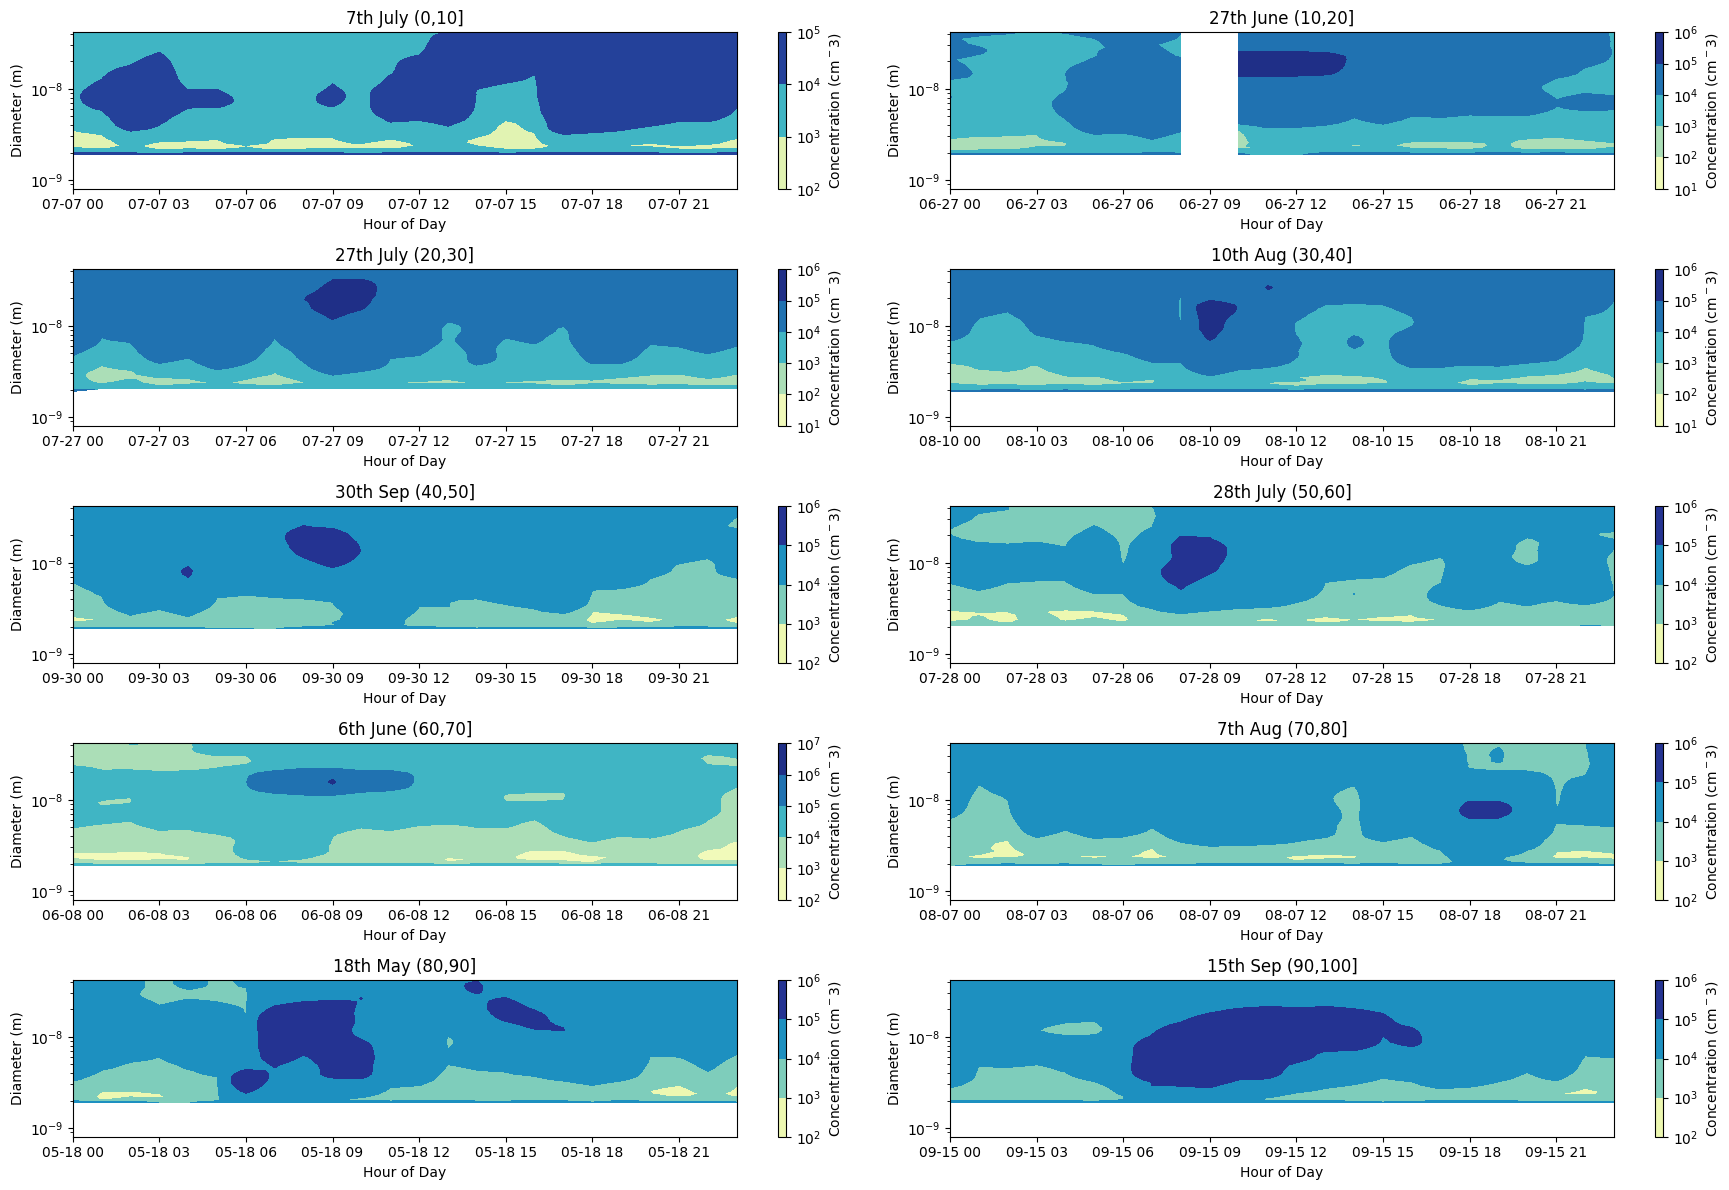

In [186]:
# Set up the plots
fig, axs = plt.subplots(5, 2, figsize=(18, 12))
axs = axs.ravel()

plot_spectral_data(particles.sel(time=slice('2024-07-07','2024-07-07')), '7th July (0,10]', axs[0])
plot_spectral_data(particles.sel(time=slice('2024-06-27','2024-06-27')), '27th June (10,20]', axs[1])
plot_spectral_data(particles.sel(time=slice('2024-07-27','2024-07-27')), '27th July (20,30]', axs[2])
plot_spectral_data(particles.sel(time=slice('2024-08-10','2024-08-10')), '10th Aug (30,40]', axs[3])
plot_spectral_data(particles.sel(time=slice('2024-09-30','2024-09-30')), '30th Sep (40,50]', axs[4])
plot_spectral_data(particles.sel(time=slice('2024-07-28','2024-07-28')), '28th July (50,60]', axs[5])
plot_spectral_data(particles.sel(time=slice('2024-06-08','2024-06-08')), '6th June (60,70]', axs[6])
plot_spectral_data(particles.sel(time=slice('2024-08-07','2024-08-07')), '7th Aug (70,80]', axs[7])
plot_spectral_data(particles.sel(time=slice('2024-05-18','2024-05-18')), '18th May (80,90]', axs[8])
plot_spectral_data(particles.sel(time=slice('2024-09-15','2024-09-15')), '15th Sep (90,100]', axs[9])

plt.tight_layout()
plt.show()

In [181]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm

# Function to plot the ds with non-negative colorbars
def plot_spectral_data(var, title, ax):
    
    # Plot the contour
    c = ax.contourf(var['time'], var['diameter'], var.T,levels=np.arange(var.min(),var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

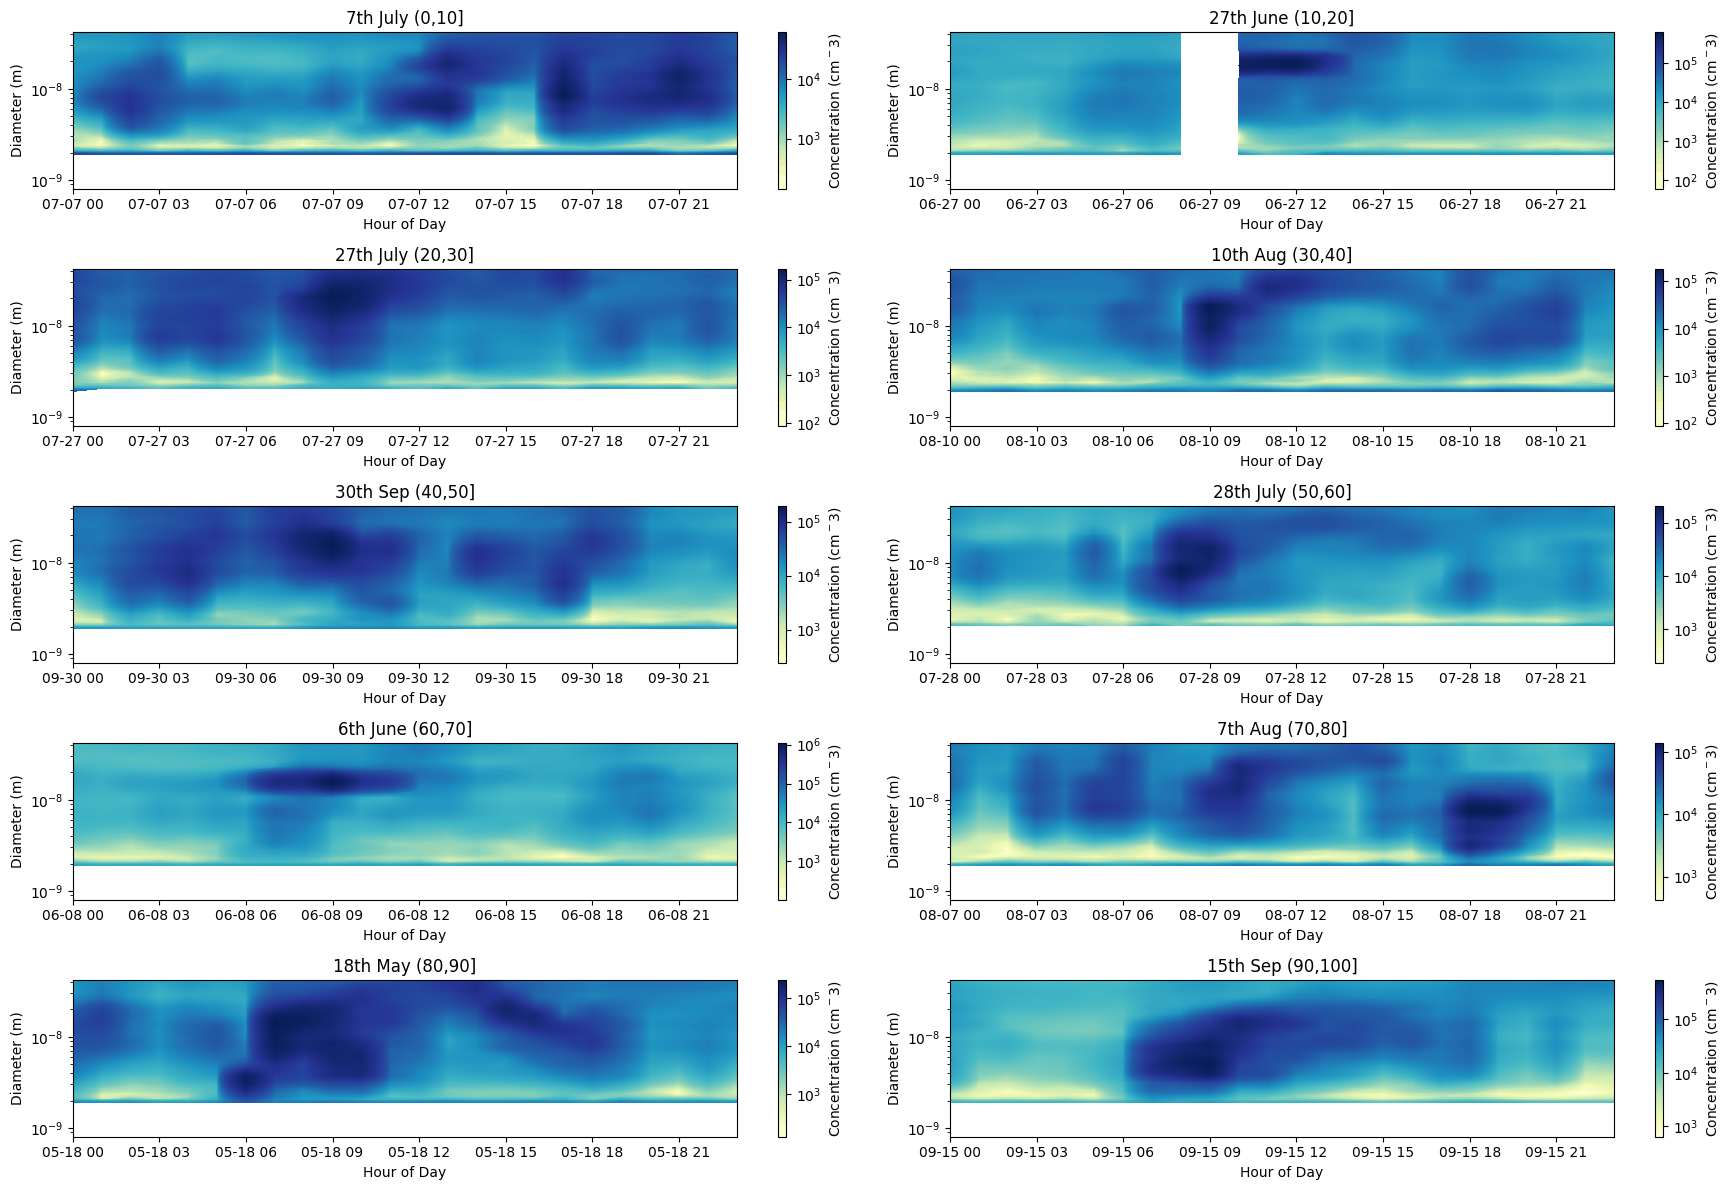

In [182]:
# Set up the plots
fig, axs = plt.subplots(5, 2, figsize=(18, 12))
axs = axs.ravel()

plot_spectral_data(particles.sel(time=slice('2024-07-07','2024-07-07')), '7th July (0,10]', axs[0])
plot_spectral_data(particles.sel(time=slice('2024-06-27','2024-06-27')), '27th June (10,20]', axs[1])
plot_spectral_data(particles.sel(time=slice('2024-07-27','2024-07-27')), '27th July (20,30]', axs[2])
plot_spectral_data(particles.sel(time=slice('2024-08-10','2024-08-10')), '10th Aug (30,40]', axs[3])
plot_spectral_data(particles.sel(time=slice('2024-09-30','2024-09-30')), '30th Sep (40,50]', axs[4])
plot_spectral_data(particles.sel(time=slice('2024-07-28','2024-07-28')), '28th July (50,60]', axs[5])
plot_spectral_data(particles.sel(time=slice('2024-06-08','2024-06-08')), '6th June (60,70]', axs[6])
plot_spectral_data(particles.sel(time=slice('2024-08-07','2024-08-07')), '7th Aug (70,80]', axs[7])
plot_spectral_data(particles.sel(time=slice('2024-05-18','2024-05-18')), '18th May (80,90]', axs[8])
plot_spectral_data(particles.sel(time=slice('2024-09-15','2024-09-15')), '15th Sep (90,100]', axs[9])

plt.tight_layout()
plt.show()

### Now lets bring in the complementary data see how it varies for the different percentiles

In [187]:
met1 = pd.read_csv('/home/coliewo/Desktop/DATA/CNR/merged_output.csv')
met2 = pd.read_csv('/home/coliewo/Desktop/DATA/CNR/merged_output2.csv')

In [188]:
met1

datetime         O3   NO[ppb]   NO2[ppb]   NOx[ppb]  \
0     2024-05-01 00:00:00  29.167833  0.718717   6.621550   7.340283   
1     2024-05-01 01:00:00  20.575333  0.943083  10.255467  11.198617   
2     2024-05-01 02:00:00  24.073333  1.030317   7.590500   8.620700   
3     2024-05-01 03:00:00  17.290167  0.684100   7.253617   7.937733   
4     2024-05-01 04:00:00  13.157833  1.005800   8.550133   9.555817   
...                   ...        ...       ...        ...        ...   
3019  2024-09-03 19:00:00        NaN       NaN        NaN        NaN   
3020  2024-09-03 20:00:00        NaN       NaN        NaN        NaN   
3021  2024-09-03 21:00:00        NaN       NaN        NaN        NaN   
3022  2024-09-03 22:00:00        NaN       NaN        NaN        NaN   
3023  2024-09-03 23:00:00        NaN       NaN        NaN        NaN   

      Radiation_Value   T_air[C]     RH[%%]  Rain_acc[mm]  WD_ave[Deg]  \
0                 NaN  15.530000  58.765000           0.0    71.245000   
1                 NaN  14.468333  63.830000           0.0    64.381667   
2                 NaN  13.758333  69.626667           0.0    96.548333   
3                 NaN  13.463333  70.121667           0.0   211.861667   
4                 NaN  13.515000  68.976667           0.0   251.463333   
...               ...        ...        ...           ...          ...   
3019              0.0        NaN        NaN           NaN          NaN   
3020              0.0        NaN        NaN           NaN          NaN   
3021              0.0        NaN        NaN           NaN          NaN   
3022              0.0        NaN        NaN           NaN          NaN   
3023              0.0        NaN        NaN           NaN          NaN   

      WS_ave[m/s]   P_air[hPa]  
0        0.800000  1004.761667  
1        1.156667  1004.221667  
2        0.730000  1004.026667  
3        1.780000  1003.966667  
4        0.828333  1003.420000  
...           ...          ...  
3019          NaN          NaN  
3020          NaN          NaN  
3021          NaN          NaN  
3022          NaN          NaN  
3023          NaN          NaN  

[3024 rows x 12 columns]

In [189]:
met2

datetime         O3   NO[ppb]  NO2[ppb]   NOx[ppb]  \
0     2024-08-31 21:00:00        NaN       NaN       NaN        NaN   
1     2024-08-31 22:00:00        NaN       NaN       NaN        NaN   
2     2024-08-31 23:00:00        NaN       NaN       NaN        NaN   
3     2024-09-01 00:00:00  45.585167       NaN  1.991100   1.764100   
4     2024-09-01 01:00:00  47.062833       NaN  1.397450   1.166633   
...                   ...        ...       ...       ...        ...   
1450  2024-10-31 07:00:00  10.224517  4.571233  7.532967  12.104100   
1451  2024-10-31 08:00:00  14.608500  2.573367  5.426767   8.000183   
1452  2024-10-31 09:00:00  24.799167  1.386567  3.730650   5.117167   
1453  2024-10-31 10:00:00  24.162333  1.893933  4.843967   6.737933   
1454  2024-10-31 11:00:00  29.737576  0.670848  2.860697   3.531667   

      Radiation_Value   T_air[C]     RH[%%]  Rain_acc[mm]  WD_ave[Deg]  \
0                 0.0        NaN        NaN           NaN          NaN   
1                 0.0        NaN        NaN           NaN          NaN   
2                 0.0        NaN        NaN           NaN          NaN   
3                 0.0  24.260000  53.386667           0.0   200.283333   
4                 0.0  23.878333  53.080000           0.0   199.843333   
...               ...        ...        ...           ...          ...   
1450              NaN  14.430000  76.768333           0.0   205.635000   
1451              NaN  15.480000  75.386667           0.0   228.015000   
1452              NaN  17.185000  71.528333           0.0   258.333333   
1453              NaN  18.438333  67.053333           0.0   280.665000   
1454              NaN  19.084615  65.615385           0.0   303.853846   

      WS_ave[m/s]   P_air[hPa]  
0             NaN          NaN  
1             NaN          NaN  
2             NaN          NaN  
3        1.825000  1009.198333  
4        2.445000  1009.011667  
...           ...          ...  
1450     2.421667  1020.060000  
1451     2.096667  1020.156667  
1452     2.050000  1020.213333  
1453     1.665000  1020.051667  
1454     1.476923  1019.661538  

[1455 rows x 12 columns]

In [197]:
# Concatenate along the time axis
complementary = pd.concat([met1, met2])


In [ ]:

# Remove any duplicate rows, if necessary (for overlapping time periods) it completely deletes, not good
complementary = complementary.drop_duplicates(subset=['datetime'])

In [195]:
complementary

datetime         O3   NO[ppb]   NO2[ppb]   NOx[ppb]  \
0     2024-05-01 00:00:00  29.167833  0.718717   6.621550   7.340283   
1     2024-05-01 01:00:00  20.575333  0.943083  10.255467  11.198617   
2     2024-05-01 02:00:00  24.073333  1.030317   7.590500   8.620700   
3     2024-05-01 03:00:00  17.290167  0.684100   7.253617   7.937733   
4     2024-05-01 04:00:00  13.157833  1.005800   8.550133   9.555817   
...                   ...        ...       ...        ...        ...   
1450  2024-10-31 07:00:00  10.224517  4.571233   7.532967  12.104100   
1451  2024-10-31 08:00:00  14.608500  2.573367   5.426767   8.000183   
1452  2024-10-31 09:00:00  24.799167  1.386567   3.730650   5.117167   
1453  2024-10-31 10:00:00  24.162333  1.893933   4.843967   6.737933   
1454  2024-10-31 11:00:00  29.737576  0.670848   2.860697   3.531667   

      Radiation_Value   T_air[C]     RH[%%]  Rain_acc[mm]  WD_ave[Deg]  \
0                 NaN  15.530000  58.765000           0.0    71.245000   
1                 NaN  14.468333  63.830000           0.0    64.381667   
2                 NaN  13.758333  69.626667           0.0    96.548333   
3                 NaN  13.463333  70.121667           0.0   211.861667   
4                 NaN  13.515000  68.976667           0.0   251.463333   
...               ...        ...        ...           ...          ...   
1450              NaN  14.430000  76.768333           0.0   205.635000   
1451              NaN  15.480000  75.386667           0.0   228.015000   
1452              NaN  17.185000  71.528333           0.0   258.333333   
1453              NaN  18.438333  67.053333           0.0   280.665000   
1454              NaN  19.084615  65.615385           0.0   303.853846   

      WS_ave[m/s]   P_air[hPa]  
0        0.800000  1004.761667  
1        1.156667  1004.221667  
2        0.730000  1004.026667  
3        1.780000  1003.966667  
4        0.828333  1003.420000  
...           ...          ...  
1450     2.421667  1020.060000  
1451     2.096667  1020.156667  
1452     2.050000  1020.213333  
1453     1.665000  1020.051667  
1454     1.476923  1019.661538  

[4404 rows x 12 columns]

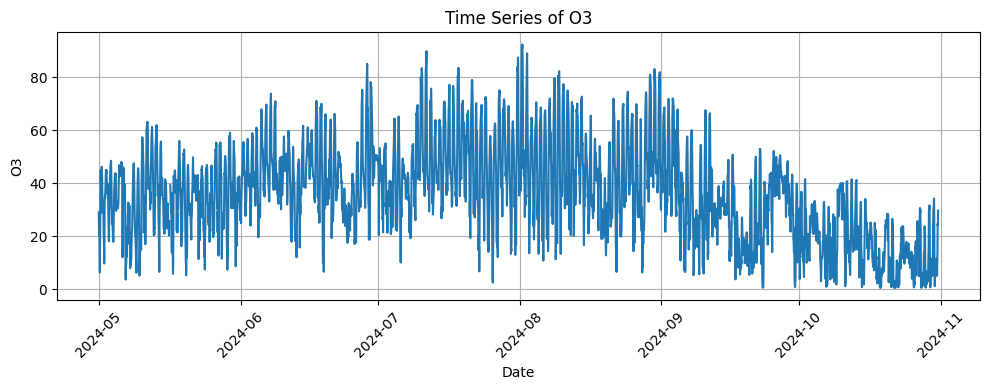

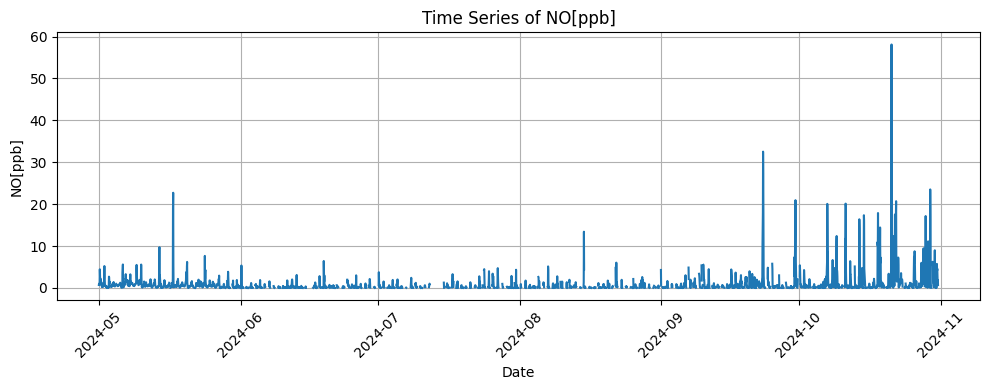

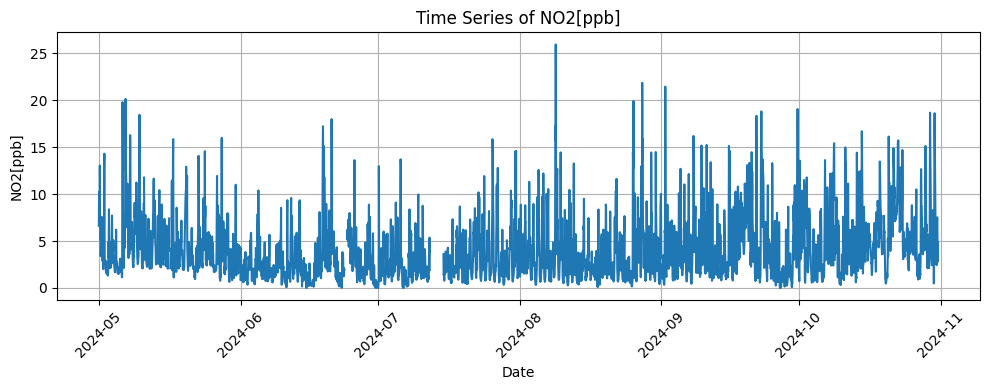

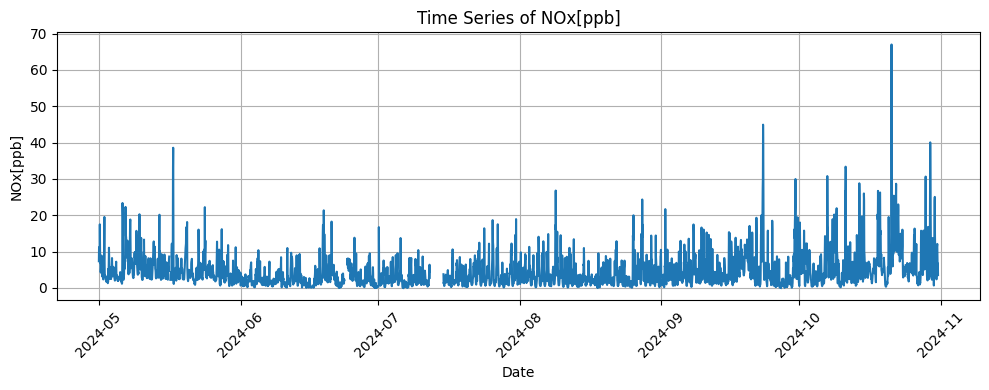

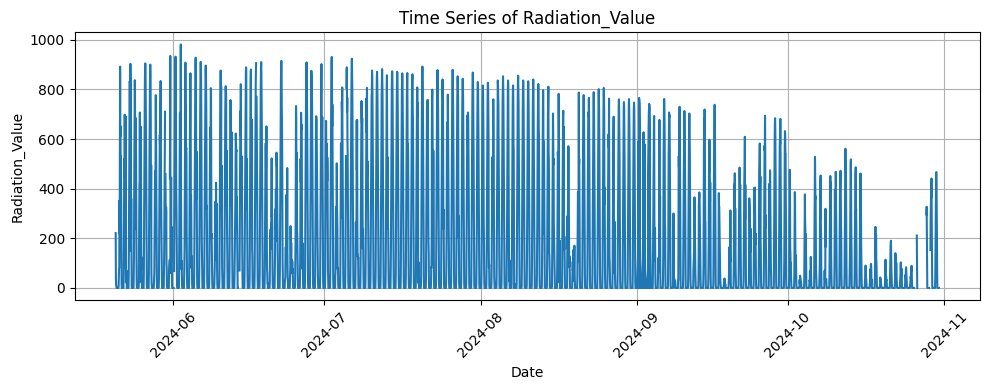

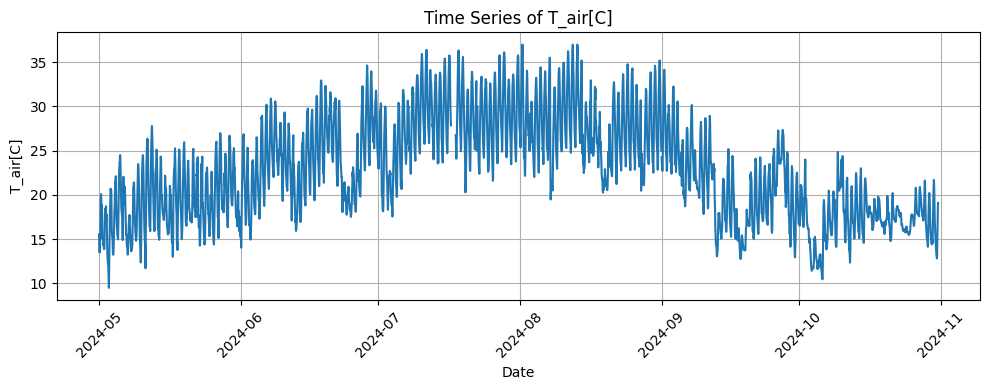

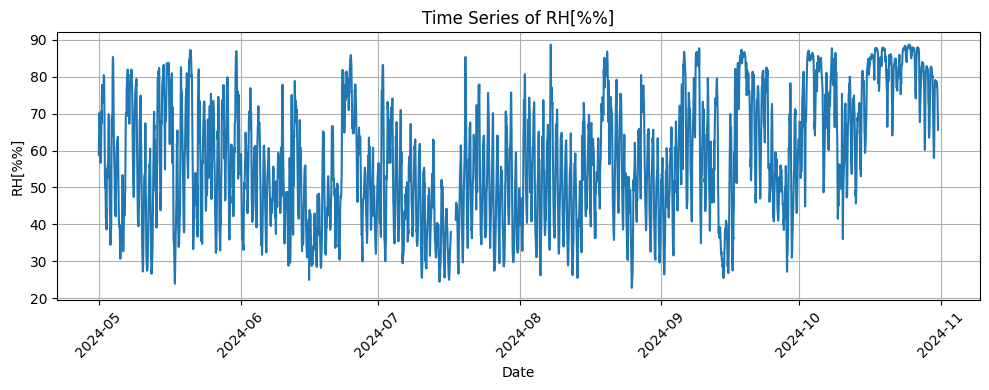

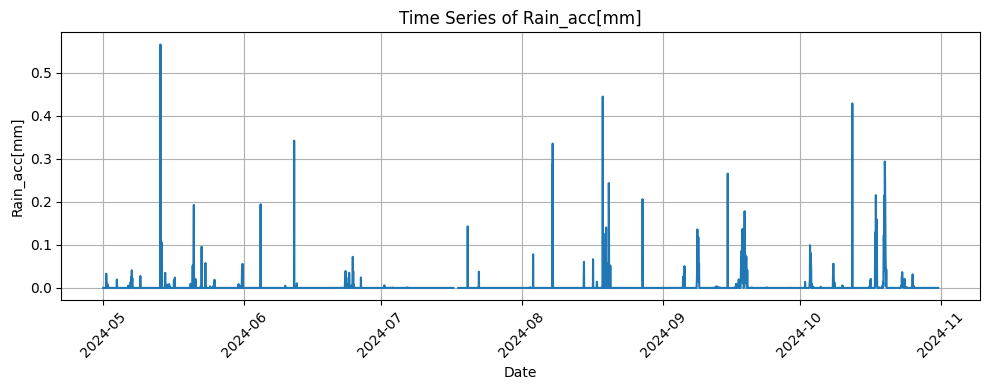

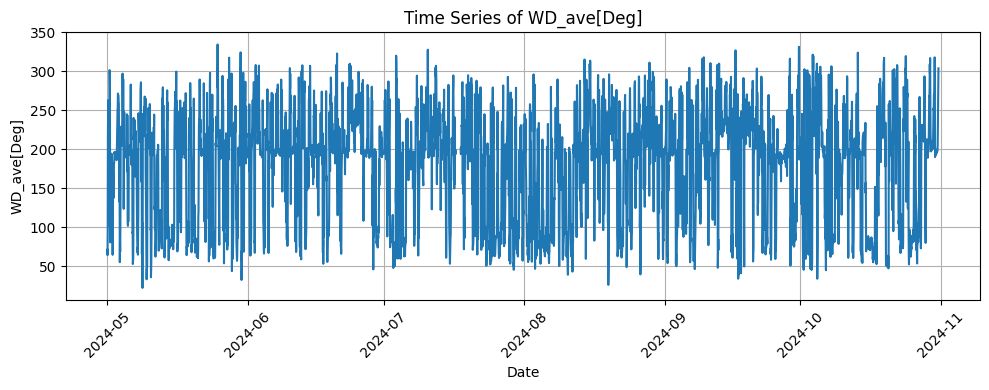

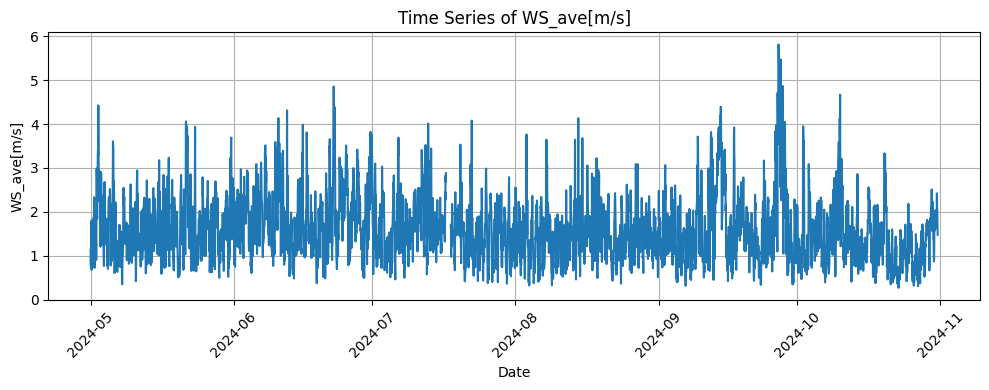

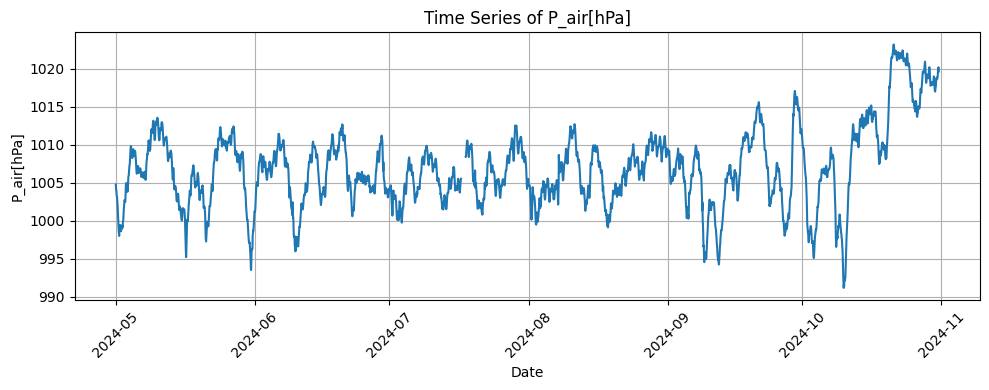

In [198]:
# Convert the 'datetime' column to a pandas datetime object for time series plotting
complementary['datetime'] = pd.to_datetime(complementary['datetime'])

# Set 'datetime' as the index for easy plotting of the time series
complementary.set_index('datetime', inplace=True)

# Creating individual plots for each variable since they have different units
for column in complementary.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(complementary.index, complementary[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [203]:
import pandas as pd

# Dictionary to store filtered data for each rank group
filtered_data_by_rank = {}


# Iterate through each rank group (assuming rank groups are in a dictionary `grouped_dict`)
for i in range(10):  # Adjust if you have a different number of groups
    # Select the current rank group
    rank_group = grouped_dict[f"rank_group_{i}"]
    
    # Get the unique dates for this rank group (without hour)
    rank_dates = pd.to_datetime(rank_group.time.values).normalize()

    # Select all rows from the complementary DataFrame for each date in rank_dates
    # Using the index for filtering
    filtered_data = complementary[complementary.index.normalize().isin(rank_dates)]

    # Store the filtered data in the dictionary
    filtered_data_by_rank[f"rank_group_{i}"] = filtered_data

# Now, `filtered_data_by_rank` contains the complementary data divided into ranks with all hours included
for rank, data in filtered_data_by_rank.items():
    print(f"{rank}:\n{data}")


rank_group_0:
                            O3   NO[ppb]   NO2[ppb]   NOx[ppb]  \
datetime                                                         
2024-05-19 00:00:00  20.418333  0.760100   5.017000   5.777150   
2024-05-19 01:00:00  16.350000  0.900383   7.168633   8.069050   
2024-05-19 02:00:00  20.189667  0.748000   4.089433   4.837533   
2024-05-19 03:00:00  22.462500  0.608167   3.915933   4.524083   
2024-05-19 04:00:00  23.630000  0.664650   3.583133   4.247800   
...                        ...       ...        ...        ...   
2024-10-30 19:00:00   4.142200  1.645783  12.643583  14.289367   
2024-10-30 20:00:00   5.753183  0.957100   9.449900  10.407183   
2024-10-30 21:00:00   7.543717  0.567294   7.283033   7.580400   
2024-10-30 22:00:00   8.243233  0.028625   5.957633   5.925667   
2024-10-30 23:00:00   9.372367  0.182514   4.749500   4.821683   

                     Radiation_Value   T_air[C]     RH[%%]  Rain_acc[mm]  \
datetime                                           

In [204]:
filtered_data_by_rank

{'rank_group_0':                             O3   NO[ppb]   NO2[ppb]   NOx[ppb]  \
 datetime                                                         
 2024-05-19 00:00:00  20.418333  0.760100   5.017000   5.777150   
 2024-05-19 01:00:00  16.350000  0.900383   7.168633   8.069050   
 2024-05-19 02:00:00  20.189667  0.748000   4.089433   4.837533   
 2024-05-19 03:00:00  22.462500  0.608167   3.915933   4.524083   
 2024-05-19 04:00:00  23.630000  0.664650   3.583133   4.247800   
 ...                        ...       ...        ...        ...   
 2024-10-30 19:00:00   4.142200  1.645783  12.643583  14.289367   
 2024-10-30 20:00:00   5.753183  0.957100   9.449900  10.407183   
 2024-10-30 21:00:00   7.543717  0.567294   7.283033   7.580400   
 2024-10-30 22:00:00   8.243233  0.028625   5.957633   5.925667   
 2024-10-30 23:00:00   9.372367  0.182514   4.749500   4.821683   
 
                      Radiation_Value   T_air[C]     RH[%%]  Rain_acc[mm]  \
 datetime                         

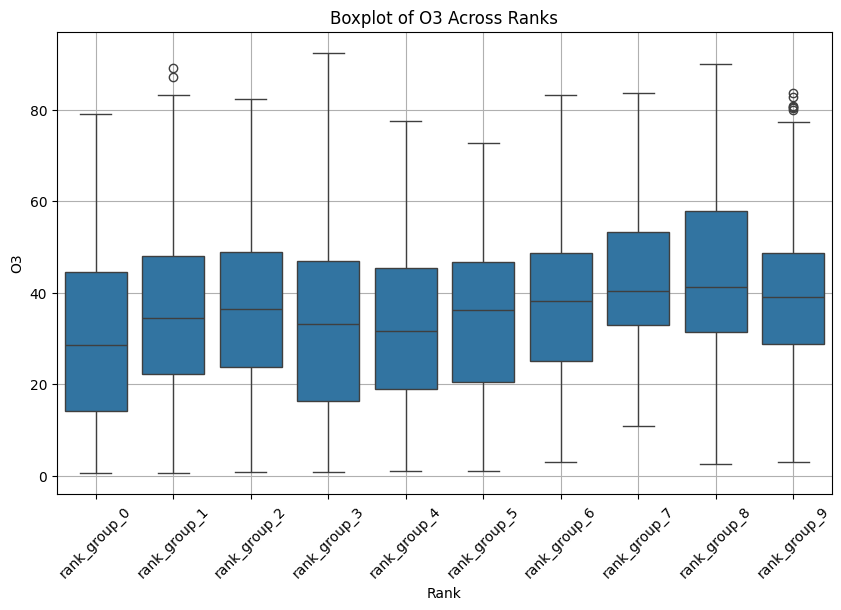

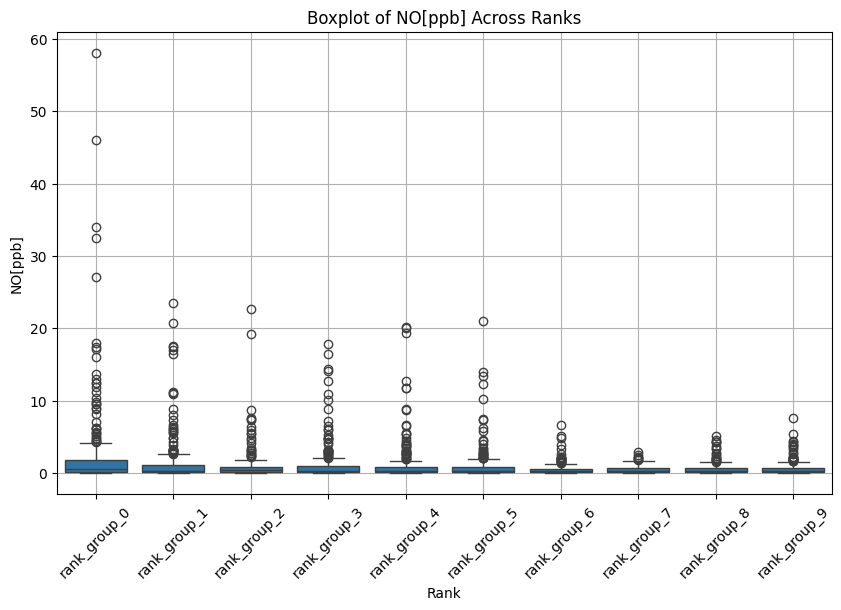

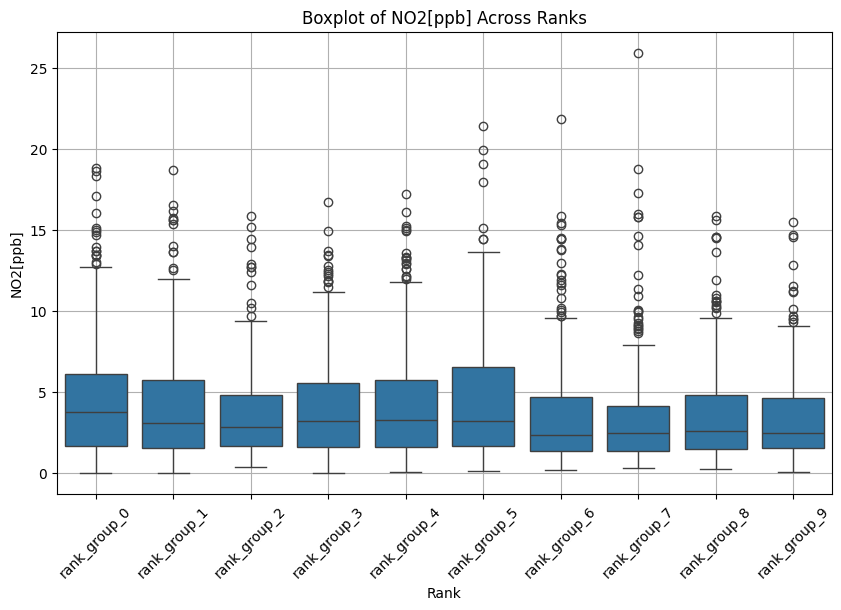

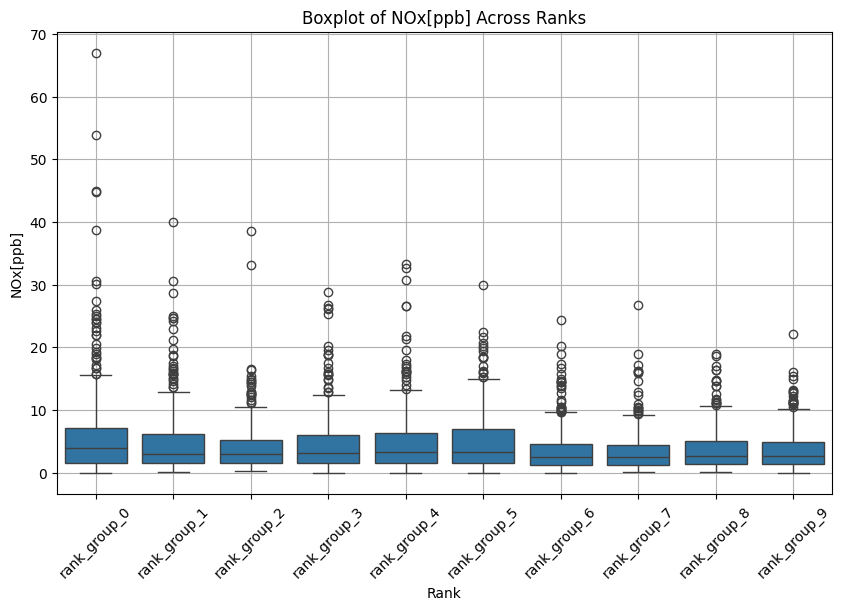

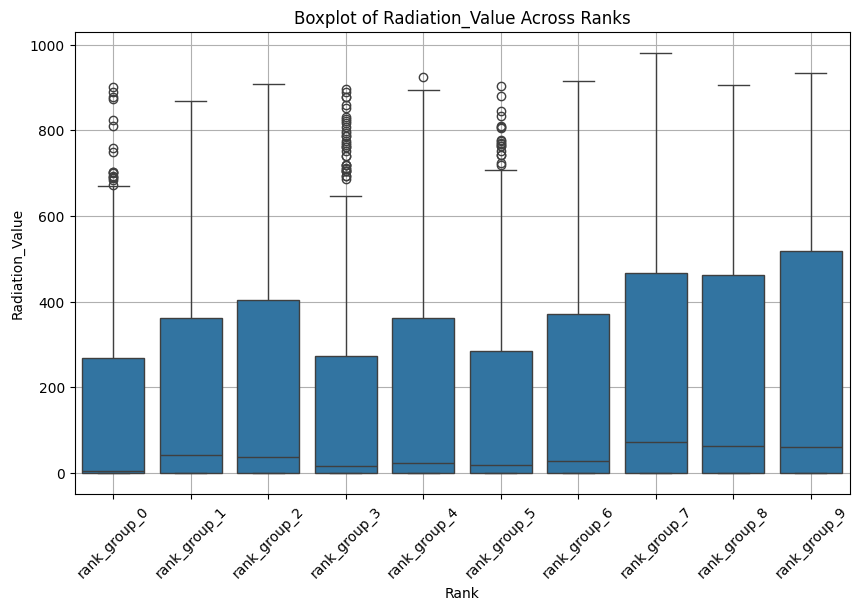

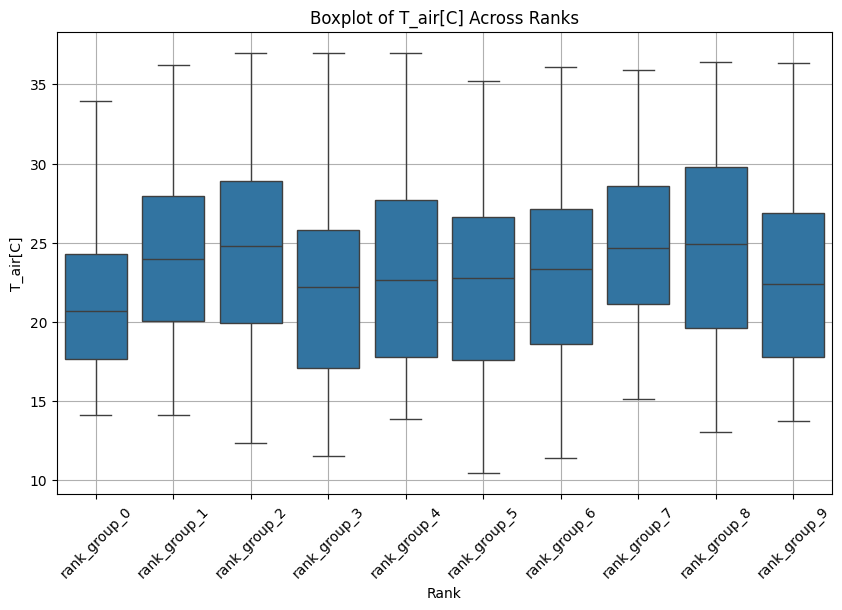

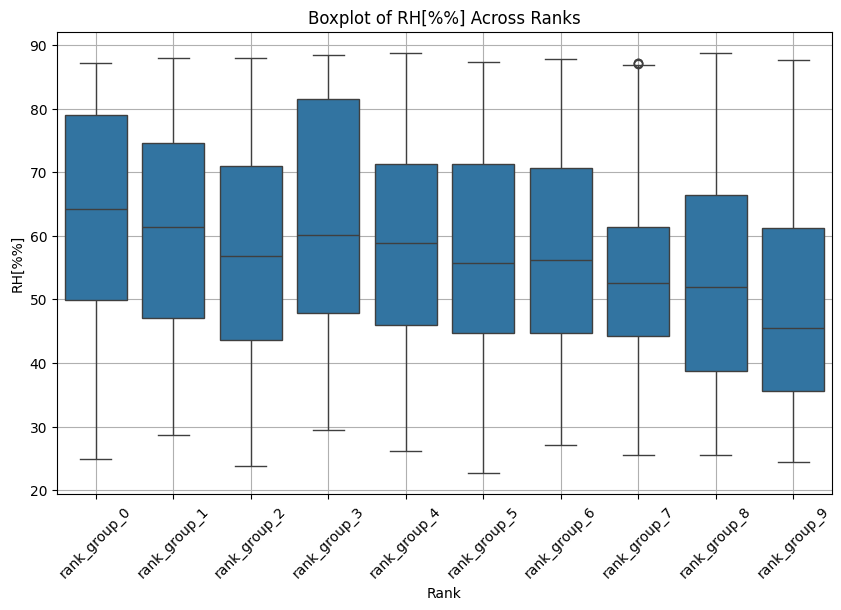

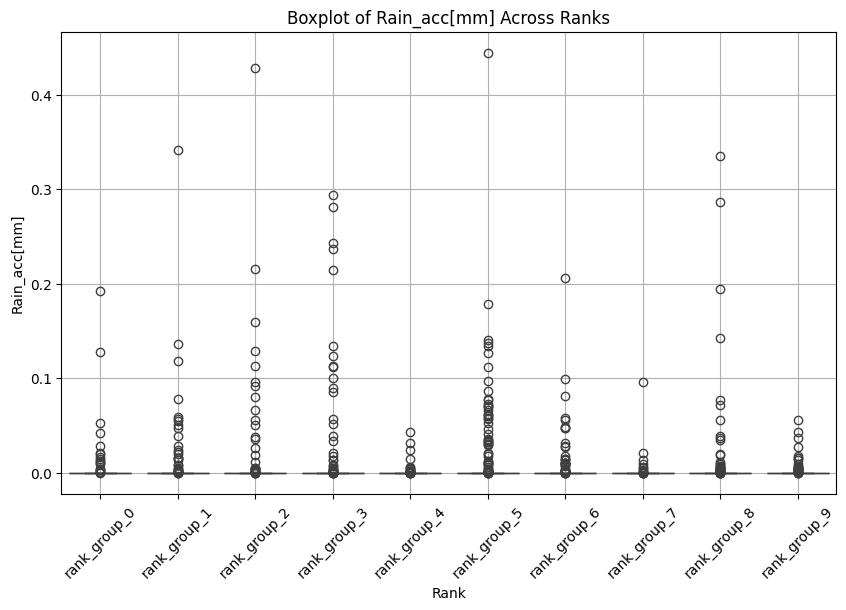

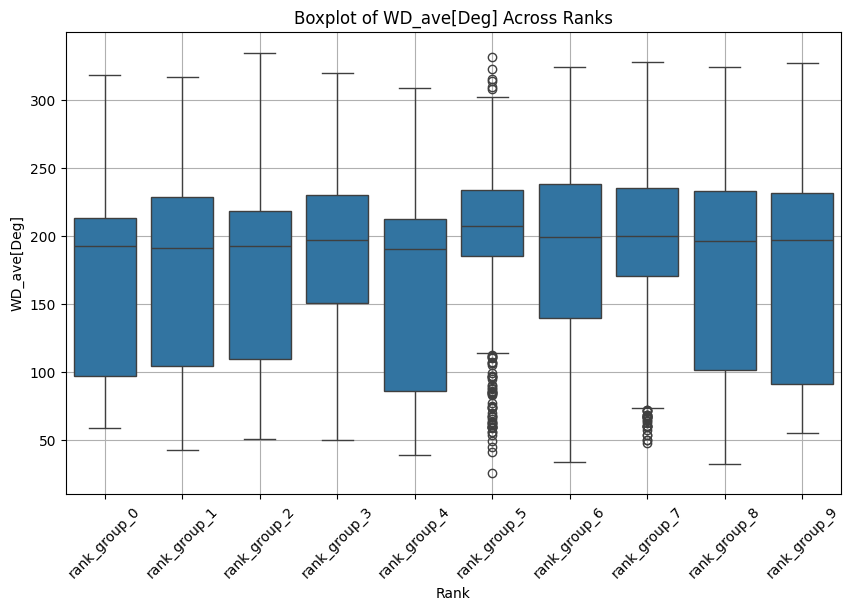

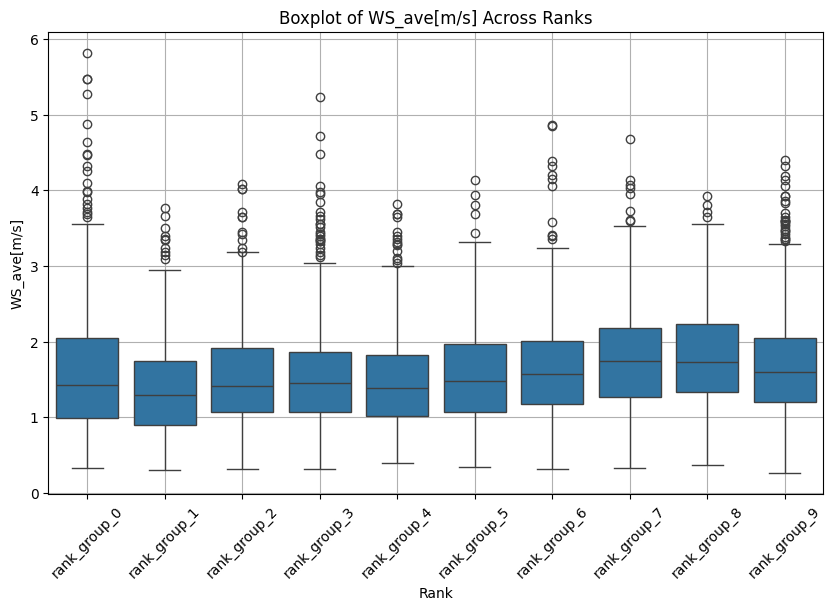

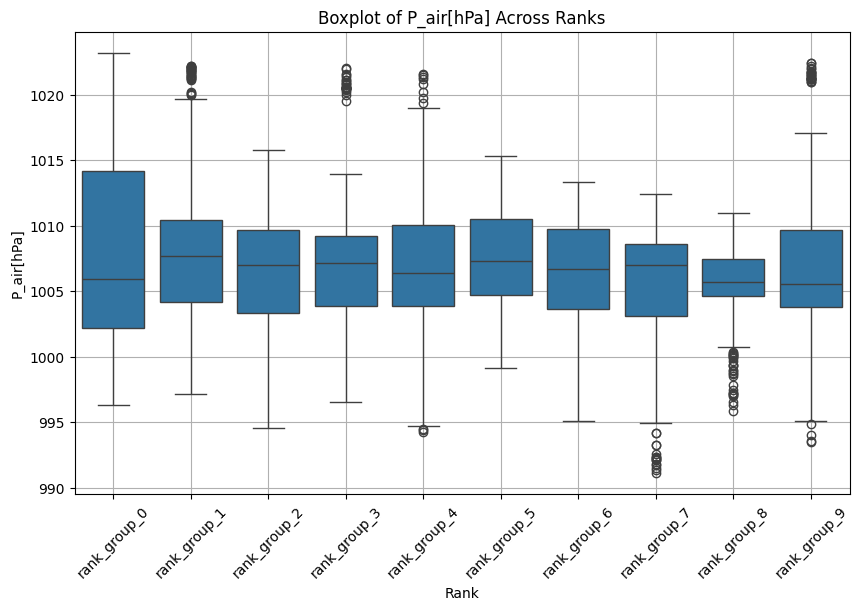

In [205]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine data for each rank group into a single DataFrame for each variable
for variable in complementary.columns:  # Iterate over each variable in the dataset
    variable_data = []

    # Collect data for each rank and store it in a format for boxplot
    for rank, data in filtered_data_by_rank.items():
        rank_values = data[variable].dropna()  # Drop NaN values for each rank group
        rank_df = pd.DataFrame({variable: rank_values, 'Rank': rank})
        variable_data.append(rank_df)

    # Concatenate all rank data for this variable
    combined_data = pd.concat(variable_data)

    # Plot the boxplot for this variable across ranks
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_data, x='Rank', y=variable)
    plt.title(f'Boxplot of {variable} Across Ranks')
    plt.xlabel('Rank')
    plt.ylabel(variable)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


### How about Black Carbon

In [206]:
bc

BC6[ng/m3]
datetime                        
2024-01-01 00:00:00     0.000000
2024-01-01 01:00:00     0.000000
2024-01-01 02:00:00     0.000000
2024-01-01 03:00:00     0.000000
2024-01-01 04:00:00     0.000000
...                          ...
2024-10-31 07:00:00  2163.783333
2024-10-31 08:00:00  1936.933333
2024-10-31 09:00:00  1914.900000
2024-10-31 10:00:00  2177.866667
2024-10-31 11:00:00  2120.000000

[7308 rows x 1 columns]

In [207]:
# Dictionary to store filtered data for each rank group
bc_by_rank = {}


# Iterate through each rank group (assuming rank groups are in a dictionary `grouped_dict`)
for i in range(11):  # Adjust if you have a different number of groups
    # Select the current rank group
    rank_group = grouped_dict[f"rank_group_{i}"]
    
    # Get the unique dates for this rank group (without hour)
    rank_dates = pd.to_datetime(rank_group.time.values).normalize()

    # Select all rows from the Black carbob DataFrame for each date in rank_dates
    # Using the index for filtering
    filtered_data = bc[bc.index.normalize().isin(rank_dates)]

    # Store the filtered data in the dictionary
    bc_by_rank[f"rank_group_{i}"] = filtered_data

# Now, `bc_by_rank` contains the bc data divided into ranks with all hours included
for rank, data in bc_by_rank.items():
    print(f"{rank}:\n{data}")


rank_group_0:
                      BC6[ng/m3]
datetime                        
2024-05-19 00:00:00     0.000000
2024-05-19 01:00:00     0.000000
2024-05-19 02:00:00     0.000000
2024-05-19 03:00:00     0.000000
2024-05-19 04:00:00     0.000000
...                          ...
2024-10-30 19:00:00  2512.983333
2024-10-30 20:00:00  2112.433333
2024-10-30 21:00:00  2046.983333
2024-10-30 22:00:00  1882.516667
2024-10-30 23:00:00  2293.566667

[408 rows x 1 columns]
rank_group_1:
                      BC6[ng/m3]
datetime                        
2024-05-28 00:00:00     0.000000
2024-05-28 01:00:00     0.000000
2024-05-28 02:00:00     0.000000
2024-05-28 03:00:00     0.000000
2024-05-28 04:00:00     0.000000
...                          ...
2024-10-29 19:00:00  4759.050000
2024-10-29 20:00:00  3665.400000
2024-10-29 21:00:00  3515.616667
2024-10-29 22:00:00  2537.033333
2024-10-29 23:00:00  2053.483333

[408 rows x 1 columns]
rank_group_2:
                      BC6[ng/m3]
datetime           

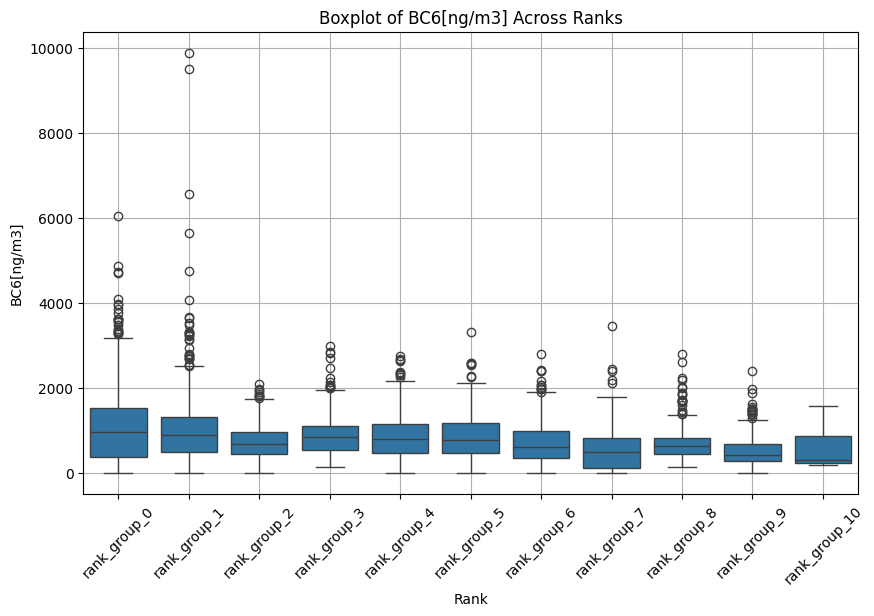

In [209]:
# Specify the variable you want to plot
variable = 'BC6[ng/m3]' 

# Collect data for each rank group
variable_data = []

for rank, data in bc_by_rank.items():
    rank_values = data[variable].dropna()  # Drop NaN values for this rank group
    rank_df = pd.DataFrame({variable: rank_values, 'Rank': rank})
    variable_data.append(rank_df)

# Concatenate all rank data for this variable
combined_data = pd.concat(variable_data)

# Plot the boxplot for this variable across ranks
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Rank', y=variable)
plt.title(f'Boxplot of {variable} Across Ranks')
plt.xlabel('Rank')
plt.ylabel(variable)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### NPF Mode Fitting

In [210]:
daily_change

<xarray.DataArray (time: 167)>
array([ 11063.86683474,  96973.71393846,   5998.82181223,   3120.9208546 ,
        32557.25346745,  38748.4755896 ,  19796.76026042,  79932.59959173,
        10235.33625344,  26517.75045955,  33718.43510347,   7747.76656254,
        16159.05538814,  51377.02141563, 126843.86304295, 180693.22579602,
        34938.91030072,  28847.31299027,  45628.43827738, 105639.84430631,
        43508.48988974,  14885.93319168,  34132.69304339,  13086.87730129,
        91572.08491285,   6395.73998276,  27527.05436837,   6452.07485147,
        13665.74038851,   6269.06062379,  20277.22246187,  70420.39245209,
        92798.15637423,  18550.18943671,  19922.74341592,   9233.36062426,
        23730.11403496,   7898.22079133,  52885.69311608,  64138.23363255,
        17904.75595333,  10945.13516664,  69374.29946199,   4746.60775221,
         1982.91214724,  17550.87606358, 151365.91714512,  31936.83588701,
        18725.06111007,  14188.9799437 ,  15847.00065885,   8096.65665738,
        43557.09719849,  38275.90827897,  35403.95179546,  55848.58061415,
        33897.10177327,  11800.60527583, 109619.36039234,  64743.90152238,
       133663.71638554,  68140.31645761,  72002.48757017,  48221.7023517 ,
        45375.55436807,   4380.46076155,  11927.94789073,  12106.68256917,
        61727.09177271,  72427.71021436,  47523.49269444,  13978.36472126,
        26234.24634297,  17726.44553576,   9242.93682045,  61695.80792215,
        14232.53576115,   8411.2891223 ,   8864.02940854,  26336.17022666,
...
        10082.35272564,  18585.84191371,  18703.14670233,  10655.17980019,
        25137.41553568,  21547.98505408,  20716.42911699,  13037.60634503,
        10776.76626928,   6337.41298282,   7066.41471304,  11642.46874063,
        23621.15790996,  26815.73183823,  26392.65737241,  30698.9140496 ,
        26560.26128163,  23785.03914176,   8152.66685903,  22955.36015271,
        21972.89572503,  15236.37598791,  32207.96228573,  11270.13940478,
        14630.35464367,  24276.72992588,   8183.62460872,  11589.77477159,
        17171.24424106,   4656.64603098,  16060.42966171,  45399.03926206,
       218795.17865428, 250906.66543165, 116201.55125083,  64984.98469255,
        19039.79492539,  20278.66301915,  22567.55629276,   3574.74544717,
         5867.05265902,   5250.18090077,  13103.09370655,  22476.41324822,
        14127.57269777,   5011.13257538,  23860.9203491 ,  92708.75052109,
        20561.71725863,  16419.96630084,  14997.84632172,  23695.55029822,
        25420.19504334,  12595.13115663,  21809.74868354,  16735.54240557,
        25813.88673408,   5343.73430074,  30671.05754246,  17509.59434608,
        10523.85530482,  26290.22899106,  13586.87812707,   3710.04124885,
         2617.14203871,  10893.17280011,  14544.47731991,  13311.83949361,
        17343.91786503,   5401.00349038,   8709.6736959 ,  80915.02711829,
        12258.80859493,  15774.89887703,  11524.01851219,   8171.9524572 ,
         3442.63513495,   6439.52137276,      0.        ])
Coordinates:
  * time     (time) datetime64[ns] 2024-05-17 2024-05-18 ... 2024-10-30

(array([0.03733547, 0.03733547, 0.03733547, 0.11200642, 0.03733547,
        0.11200642, 0.18667736, 0.22401283, 0.29868377, 0.14934189,
        0.48536113, 0.41069019, 0.48536113, 0.56003208, 0.37335472,
        0.44802566, 0.41069019, 0.37335472, 0.07467094, 0.2613483 ,
        0.14934189, 0.22401283, 0.22401283, 0.11200642, 0.11200642,
        0.07467094, 0.07467094, 0.03733547, 0.        , 0.07467094]),
 array([ 7.59232182,  7.75367231,  7.91502279,  8.07637327,  8.23772375,
         8.39907424,  8.56042472,  8.7217752 ,  8.88312568,  9.04447617,
         9.20582665,  9.36717713,  9.52852761,  9.6898781 ,  9.85122858,
        10.01257906, 10.17392954, 10.33528003, 10.49663051, 10.65798099,
        10.81933147, 10.98068196, 11.14203244, 11.30338292, 11.4647334 ,
        11.62608389, 11.78743437, 11.94878485, 12.11013533, 12.27148582,
        12.4328363 ]),
 <BarContainer object of 30 artists>)

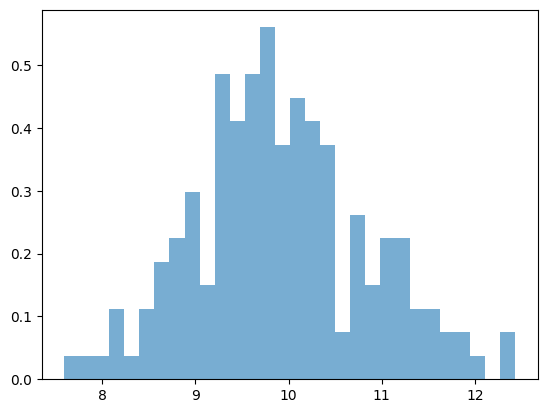

In [211]:
log_dist = np.log(daily_change[:-1])
plt.hist(log_dist, bins=30, density=True, alpha=0.6)

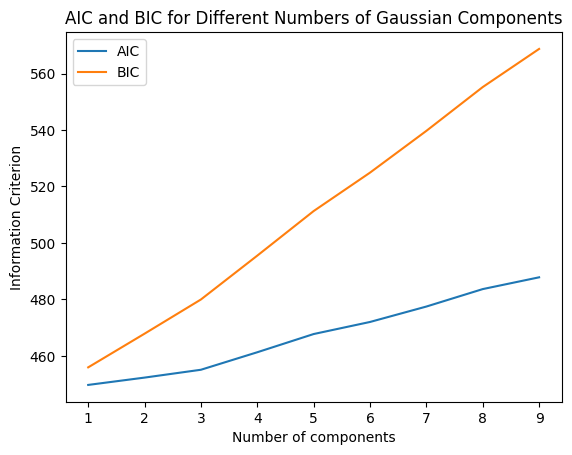

In [213]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Reshape filtered_data for the Gaussian Mixture model (it expects a 2D array)
filtered_data = log_dist.values.flatten().reshape(-1, 1)

# Test various numbers of components
n_components = np.arange(1, 10)  # Adjust the range based on your expectation
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(filtered_data) for n in n_components]

# Calculate the AIC and BIC
aics = [m.aic(filtered_data) for m in models]
bics = [m.bic(filtered_data) for m in models]

# Plot the results
plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')
plt.legend(loc='best')
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC for Different Numbers of Gaussian Components')
plt.show()

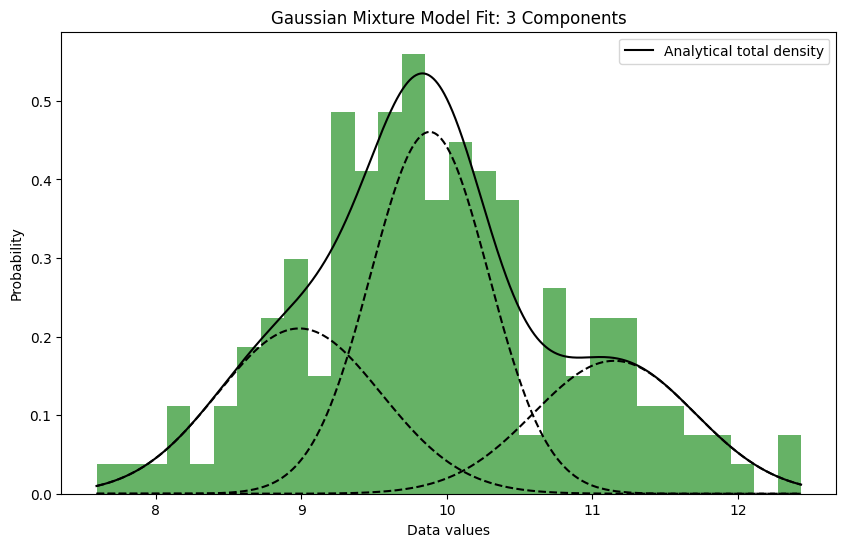

In [215]:
gmm = GaussianMixture(n_components=3, random_state=0).fit(filtered_data)

# Plot the histogram and the density estimation
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(filtered_data.min(), filtered_data.max(), 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
responsibilities = gmm.predict_proba(x)
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.plot(x, pdf, '-k', label='Analytical total density')
plt.plot(x, pdf_individual, '--k')
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.title('Gaussian Mixture Model Fit: 3 Components')
plt.legend()
plt.show()


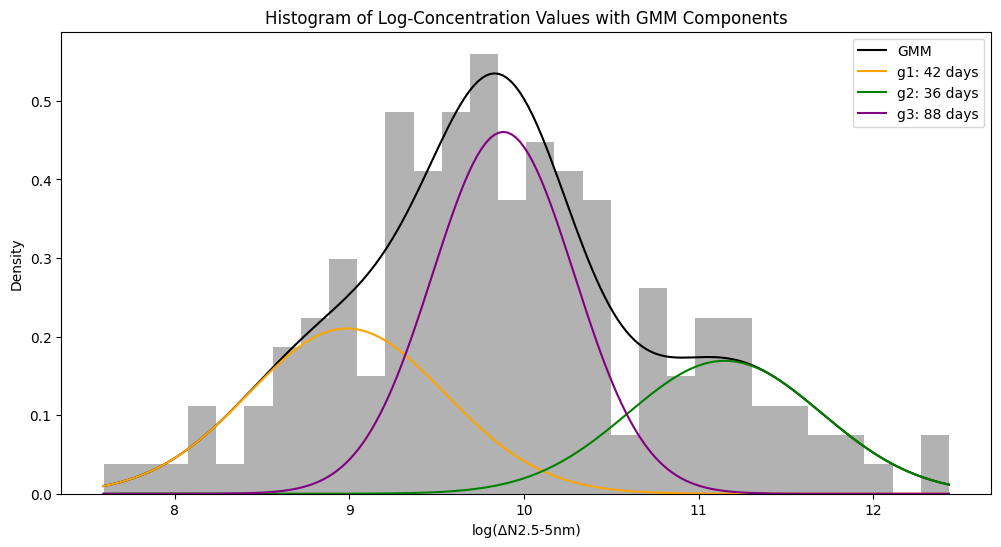

Number of data points in g1: 42
Number of data points in g2: 36
Number of data points in g3: 88


In [216]:
# Fit Gaussian distributions to the data

# Fit a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(filtered_data)

# Predict the component for each data point
gmm_labels = gmm.predict(filtered_data)

# Count the number of data points in each component
unique, counts = np.unique(gmm_labels, return_counts=True)
component_frequencies = dict(zip(unique, counts))

# Plot the histogram and Gaussian Mixture Model fits
plt.figure(figsize=(12, 6))
plt.hist(filtered_data, bins=30, density=True, alpha=0.6, color='gray')

# Plot the GMM components
xs = np.linspace(min(filtered_data), max(filtered_data), 200).reshape(-1, 1)
logprob = gmm.score_samples(xs)
responsibilities = gmm.predict_proba(xs)
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.plot(xs, pdf, label='GMM', color='black')
colors = ['orange', 'green', 'purple']
for i in range(3):
    plt.plot(xs, pdf_individual[:, i], label=f'g{i+1}: {component_frequencies.get(i, 0)} days', color=colors[i])

plt.xlabel('log(ΔN2.5-5nm)')
plt.ylabel('Density')
plt.title('Histogram of Log-Concentration Values with GMM Components')
plt.legend()

# Show the plot
plt.show()

# Print the number of data points assigned to each GMM component
print(f'Number of data points in g1: {component_frequencies.get(0, 0)}')
print(f'Number of data points in g2: {component_frequencies.get(1, 0)}')
print(f'Number of data points in g3: {component_frequencies.get(2, 0)}')

In [219]:
filtered_data.flatten()

array([ 9.31143984, 11.48219523,  8.69931836,  8.04588338, 10.39075546,
       10.56484669,  9.89327358, 11.28893905,  9.23360135, 10.18556962,
       10.4258    ,  8.9551599 ,  9.69023588, 10.8469463 , 11.75071218,
       12.10455599, 10.4613564 , 10.26977213, 10.72828645, 11.56779089,
       10.68071137,  9.60817196, 10.43801094,  9.47936527, 11.42488175,
        8.76338742, 10.2229246 ,  8.77215704,  9.52264728,  8.7433818 ,
        9.91725349, 11.16223817, 11.43818205,  9.82823528,  9.89961724,
        9.13057836, 10.07450015,  8.9743928 , 10.87588813, 11.06879593,
        9.79282165,  9.30065036, 11.14727175,  8.46518548,  7.59232182,
        9.77285915, 11.92745548, 10.37151535,  9.83761807,  9.56022088,
        9.67073553,  8.9992065 , 10.68182794, 10.55257595, 10.47457873,
       10.93039939, 10.4310848 ,  9.3759061 , 11.60476928, 11.07819479,
       11.80308235, 11.12932434, 11.18445595, 10.78356445, 10.72272879,
        8.38490919,  9.38663949,  9.40151286, 11.0304782 , 11.19

In [220]:
log_dist.coords

Coordinates:
  * time     (time) datetime64[ns] 2024-05-17 2024-05-18 ... 2024-10-29

In [221]:
# Fit GMM and predict components
gmm = GaussianMixture(n_components=3, random_state=0)
components = gmm.fit_predict(log_dist.values.reshape(-1, 1))

# Attempting to add components as a coordinate
log_dist.coords['component'] = ('time', components)  # Make sure dimensions match

In [222]:
log_dist.component==0

<xarray.DataArray 'component' (time: 166)>
array([ True, False,  True,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True])
Coordinates:
  * time       (time) datetime64[ns] 2024-05-17 2024-05-18 ... 2024-10-29
    component  (time) int64 0 1 0 0 2 2 2 1 0 2 2 0 ... 2 2 2 0 0 1 2 2 2 0 0 0

In [223]:
# Select log_dist where component is 0,1,2
selected_data_where_component_0 = log_dist.where(log_dist.component == 0, drop=True)
selected_data_where_component_1 = log_dist.where(log_dist.component == 1, drop=True)
selected_data_where_component_2 = log_dist.where(log_dist.component == 2, drop=True)

In [224]:
selected_data_where_component_0.time   # Example this is for g1 ie 42 days

<xarray.DataArray 'time' (time: 42)>
array(['2024-05-17T00:00:00.000000000', '2024-05-19T00:00:00.000000000',
       '2024-05-20T00:00:00.000000000', '2024-05-25T00:00:00.000000000',
       '2024-05-28T00:00:00.000000000', '2024-06-11T00:00:00.000000000',
       '2024-06-13T00:00:00.000000000', '2024-06-15T00:00:00.000000000',
       '2024-06-21T00:00:00.000000000', '2024-06-23T00:00:00.000000000',
       '2024-06-27T00:00:00.000000000', '2024-06-29T00:00:00.000000000',
       '2024-06-30T00:00:00.000000000', '2024-07-07T00:00:00.000000000',
       '2024-07-21T00:00:00.000000000', '2024-07-30T00:00:00.000000000',
       '2024-08-02T00:00:00.000000000', '2024-08-03T00:00:00.000000000',
       '2024-08-09T00:00:00.000000000', '2024-08-11T00:00:00.000000000',
       '2024-08-13T00:00:00.000000000', '2024-08-16T00:00:00.000000000',
       '2024-08-21T00:00:00.000000000', '2024-08-22T00:00:00.000000000',
       '2024-08-23T00:00:00.000000000', '2024-08-31T00:00:00.000000000',
       '2024-09-08T00:00:00.000000000', '2024-09-11T00:00:00.000000000',
       '2024-09-21T00:00:00.000000000', '2024-09-22T00:00:00.000000000',
       '2024-09-23T00:00:00.000000000', '2024-09-27T00:00:00.000000000',
       '2024-10-09T00:00:00.000000000', '2024-10-12T00:00:00.000000000',
       '2024-10-15T00:00:00.000000000', '2024-10-16T00:00:00.000000000',
       '2024-10-17T00:00:00.000000000', '2024-10-21T00:00:00.000000000',
       '2024-10-22T00:00:00.000000000', '2024-10-27T00:00:00.000000000',
       '2024-10-28T00:00:00.000000000', '2024-10-29T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2024-05-17 2024-05-19 ... 2024-10-29
    component  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    timezone:  utc

In [249]:
selected_data_where_component_1.time   # Example this is for g2 ie 36 days

<xarray.DataArray 'time' (time: 36)>
array(['2024-05-18T00:00:00.000000000', '2024-05-24T00:00:00.000000000',
       '2024-05-30T00:00:00.000000000', '2024-05-31T00:00:00.000000000',
       '2024-06-01T00:00:00.000000000', '2024-06-04T00:00:00.000000000',
       '2024-06-05T00:00:00.000000000', '2024-06-06T00:00:00.000000000',
       '2024-06-10T00:00:00.000000000', '2024-06-17T00:00:00.000000000',
       '2024-06-18T00:00:00.000000000', '2024-06-24T00:00:00.000000000',
       '2024-06-25T00:00:00.000000000', '2024-06-28T00:00:00.000000000',
       '2024-07-02T00:00:00.000000000', '2024-07-08T00:00:00.000000000',
       '2024-07-11T00:00:00.000000000', '2024-07-14T00:00:00.000000000',
       '2024-07-15T00:00:00.000000000', '2024-07-16T00:00:00.000000000',
       '2024-07-17T00:00:00.000000000', '2024-07-18T00:00:00.000000000',
       '2024-07-19T00:00:00.000000000', '2024-07-20T00:00:00.000000000',
       '2024-07-24T00:00:00.000000000', '2024-07-25T00:00:00.000000000',
       '2024-07-26T00:00:00.000000000', '2024-07-31T00:00:00.000000000',
       '2024-08-07T00:00:00.000000000', '2024-09-13T00:00:00.000000000',
       '2024-09-14T00:00:00.000000000', '2024-09-15T00:00:00.000000000',
       '2024-09-16T00:00:00.000000000', '2024-09-17T00:00:00.000000000',
       '2024-09-29T00:00:00.000000000', '2024-10-23T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2024-05-18 2024-05-24 ... 2024-10-23
    component  (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    timezone:  utc

In [250]:
selected_data_where_component_2.time   # Example this is for g2 ie 88 days

<xarray.DataArray 'time' (time: 88)>
array(['2024-05-21T00:00:00.000000000', '2024-05-22T00:00:00.000000000',
       '2024-05-23T00:00:00.000000000', '2024-05-26T00:00:00.000000000',
       '2024-05-27T00:00:00.000000000', '2024-05-29T00:00:00.000000000',
       '2024-06-02T00:00:00.000000000', '2024-06-03T00:00:00.000000000',
       '2024-06-07T00:00:00.000000000', '2024-06-08T00:00:00.000000000',
       '2024-06-09T00:00:00.000000000', '2024-06-12T00:00:00.000000000',
       '2024-06-14T00:00:00.000000000', '2024-06-16T00:00:00.000000000',
       '2024-06-19T00:00:00.000000000', '2024-06-20T00:00:00.000000000',
       '2024-06-22T00:00:00.000000000', '2024-06-26T00:00:00.000000000',
       '2024-07-01T00:00:00.000000000', '2024-07-03T00:00:00.000000000',
       '2024-07-04T00:00:00.000000000', '2024-07-05T00:00:00.000000000',
       '2024-07-06T00:00:00.000000000', '2024-07-09T00:00:00.000000000',
       '2024-07-10T00:00:00.000000000', '2024-07-12T00:00:00.000000000',
       '2024-07-13T00:00:00.000000000', '2024-07-22T00:00:00.000000000',
       '2024-07-23T00:00:00.000000000', '2024-07-27T00:00:00.000000000',
       '2024-07-28T00:00:00.000000000', '2024-07-29T00:00:00.000000000',
       '2024-08-01T00:00:00.000000000', '2024-08-04T00:00:00.000000000',
       '2024-08-05T00:00:00.000000000', '2024-08-06T00:00:00.000000000',
       '2024-08-08T00:00:00.000000000', '2024-08-10T00:00:00.000000000',
       '2024-08-12T00:00:00.000000000', '2024-08-14T00:00:00.000000000',
       '2024-08-15T00:00:00.000000000', '2024-08-17T00:00:00.000000000',
       '2024-08-18T00:00:00.000000000', '2024-08-19T00:00:00.000000000',
       '2024-08-20T00:00:00.000000000', '2024-08-24T00:00:00.000000000',
       '2024-08-25T00:00:00.000000000', '2024-08-26T00:00:00.000000000',
       '2024-08-27T00:00:00.000000000', '2024-08-28T00:00:00.000000000',
       '2024-08-29T00:00:00.000000000', '2024-08-30T00:00:00.000000000',
       '2024-09-01T00:00:00.000000000', '2024-09-02T00:00:00.000000000',
       '2024-09-03T00:00:00.000000000', '2024-09-04T00:00:00.000000000',
       '2024-09-05T00:00:00.000000000', '2024-09-06T00:00:00.000000000',
       '2024-09-07T00:00:00.000000000', '2024-09-09T00:00:00.000000000',
       '2024-09-10T00:00:00.000000000', '2024-09-12T00:00:00.000000000',
       '2024-09-18T00:00:00.000000000', '2024-09-19T00:00:00.000000000',
       '2024-09-20T00:00:00.000000000', '2024-09-24T00:00:00.000000000',
       '2024-09-25T00:00:00.000000000', '2024-09-26T00:00:00.000000000',
       '2024-09-28T00:00:00.000000000', '2024-09-30T00:00:00.000000000',
       '2024-10-01T00:00:00.000000000', '2024-10-02T00:00:00.000000000',
       '2024-10-03T00:00:00.000000000', '2024-10-04T00:00:00.000000000',
       '2024-10-05T00:00:00.000000000', '2024-10-06T00:00:00.000000000',
       '2024-10-07T00:00:00.000000000', '2024-10-08T00:00:00.000000000',
       '2024-10-10T00:00:00.000000000', '2024-10-11T00:00:00.000000000',
       '2024-10-13T00:00:00.000000000', '2024-10-14T00:00:00.000000000',
       '2024-10-18T00:00:00.000000000', '2024-10-19T00:00:00.000000000',
       '2024-10-20T00:00:00.000000000', '2024-10-24T00:00:00.000000000',
       '2024-10-25T00:00:00.000000000', '2024-10-26T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 2024-05-21 2024-05-22 ... 2024-10-26
    component  (time) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2
Attributes:
    timezone:  utc

In [225]:
# Select the dates from the particles data that are in each component.
g1_days = particles[particles['time'].dt.date.isin(selected_data_where_component_0.time.dt.date)]
g2_days = particles[particles['time'].dt.date.isin(selected_data_where_component_1.time.dt.date)]
g3_days = particles[particles['time'].dt.date.isin(selected_data_where_component_2.time.dt.date)]

In [251]:
g1_days

<xarray.DataArray (time: 1008, diameter: 55)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [           nan,            nan,            nan, ...,
        25359.57324638, 24719.63042501, 23551.65923033],
       [           nan,            nan,            nan, ...,
        23576.20967629, 22110.026076  , 20655.16787305],
       [           nan,            nan,            nan, ...,
        23965.68913229, 22536.79643374, 20874.32127375]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-10-29T23:00:00

In [252]:
g2_days

<xarray.DataArray (time: 864, diameter: 55)>
array([[           nan,            nan,            nan, ...,
        12340.07557969, 12228.48783961, 11969.12128061],
       [           nan,            nan,            nan, ...,
        19356.67214718, 19386.57055924, 16487.65306318],
       [           nan,            nan,            nan, ...,
        12397.91856681, 11997.71346975, 11369.5411393 ],
       ...,
       [           nan,            nan,            nan, ...,
        13046.4347674 , 13567.21191745, 13806.65485483],
       [           nan,            nan,            nan, ...,
        15411.41973779, 14706.91506002, 14334.28379946],
       [           nan,            nan,            nan, ...,
        18892.80981228, 20258.12438334, 19980.51845257]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
  * time      (time) datetime64[ns] 2024-05-18 ... 2024-10-23T23:00:00

In [253]:
g3_days

<xarray.DataArray (time: 2113, diameter: 55)>
array([[           nan,            nan,            nan, ...,
        14899.91302992, 15539.16423103, 15453.42891032],
       [           nan,            nan,            nan, ...,
        14053.35836695, 13928.43730102, 13622.46618802],
       [           nan,            nan,            nan, ...,
        11404.34252867, 11228.04261748,  9564.50411428],
       ...,
       [           nan,            nan,            nan, ...,
        17230.51010224, 17990.0684818 , 17529.18389709],
       [           nan,            nan,            nan, ...,
         9583.05002383,  9563.94378876,  9173.58957849],
       [           nan,            nan,            nan, ...,
         8036.49597987,  7971.76944107,  7455.4329575 ]])
Coordinates:
  * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
  * time      (time) datetime64[ns] 2024-05-21 ... 2024-10-26T23:00:00

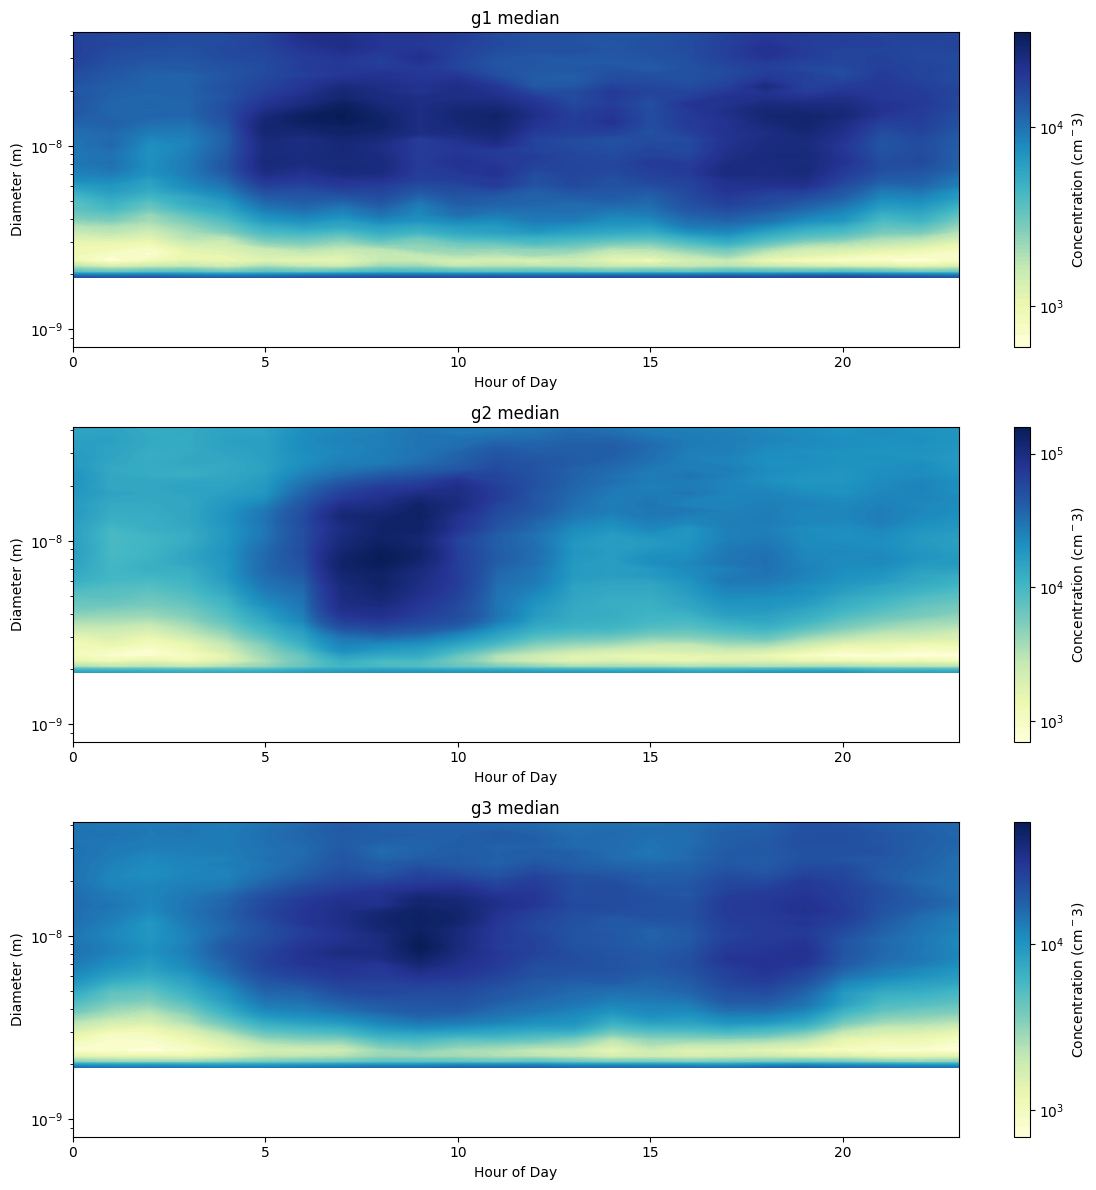

In [231]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm

# Function to plot the ds with non-negative colorbars
def plot_spectral_data(var, title, ax):
    
    # Plot the contour
    c = ax.contourf(var['hour'], var['diameter'], var.T,levels=np.arange(var.min(),var.max().item(),100),locator=ticker.LogLocator(), cmap=cm.YlGnBu)
    
    # Set up the colorbar
    cbar = plt.colorbar(c, ax=ax,ticks=[1,1e1,1e2,1e3,1e4,1e5,1e6])
    cbar.set_label('Concentration (cm$^-3$)')
    ax.set_yscale('log')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Diameter (m)')
    ax.set_title(title)

# Set up the plots
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
axs = axs.ravel()

plot_spectral_data(g1_days.groupby(g1_days.time.dt.hour).median(dim='time'), 'g1 median', axs[0])
plot_spectral_data(g2_days.groupby(g2_days.time.dt.hour).median(dim='time'), 'g2 median', axs[1])
plot_spectral_data(g3_days.groupby(g3_days.time.dt.hour).median(dim='time'), 'g3 median', axs[2])

plt.tight_layout()
plt.show()

### Using the data of mean over the diameter chosen 2.5-5nm

In [232]:
# Select the dates from the data mean over diameter that are in each component.
g1_sub = sub_5nm_mean[sub_5nm_mean['time'].dt.date.isin(selected_data_where_component_0.time.dt.date)]
g2_sub = sub_5nm_mean[sub_5nm_mean['time'].dt.date.isin(selected_data_where_component_1.time.dt.date)]
g3_sub = sub_5nm_mean[sub_5nm_mean['time'].dt.date.isin(selected_data_where_component_2.time.dt.date)]

In [234]:
g3_sub.groupby(g3_sub.time.dt.hour).median(dim='time')

<xarray.DataArray (hour: 24)>
array([ 3338.4458744 ,  2305.74364154,  2105.5082217 ,  3077.9040208 ,
        5313.0042101 ,  8942.27173287,  9825.14771431, 11630.81291351,
       13655.23560254, 14681.3669593 , 14387.55656363, 12486.64861934,
       11096.23733484,  9971.06006489,  7865.03155636,  8959.10729985,
        9185.16568268, 11615.99775287, 11593.12013483,  9632.9995234 ,
        5306.70703685,  3516.76937304,  3176.48166183,  2964.92808237])
Coordinates:
  * hour     (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

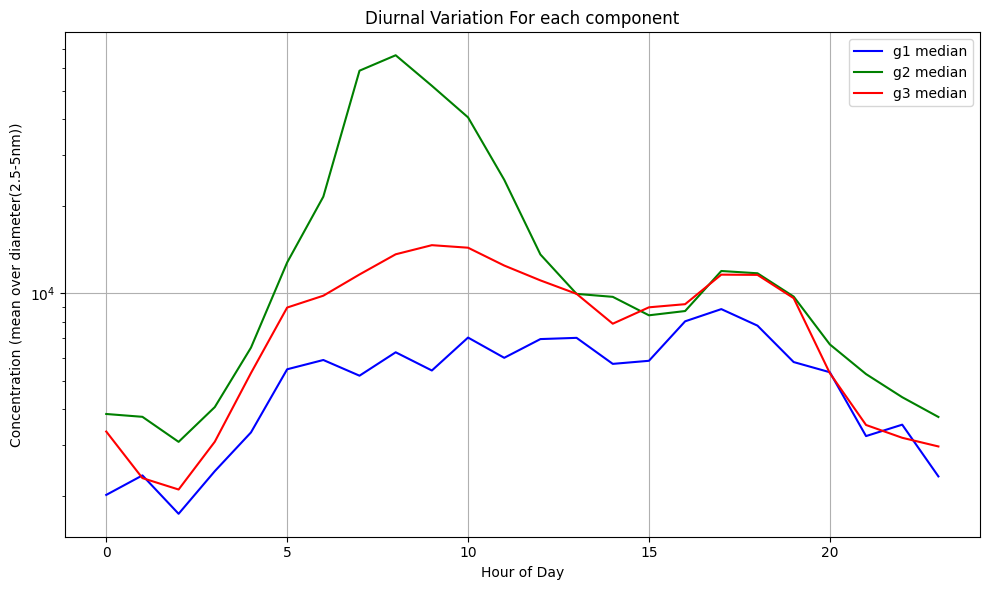

In [235]:
plt.figure(figsize=(10, 6))
plt.plot(g1_sub.groupby(g1_sub.time.dt.hour).median(dim='time')['hour'], g1_sub.groupby(g1_sub.time.dt.hour).median(dim='time').values, label='g1 median', color='blue')
plt.plot(g2_sub.groupby(g2_sub.time.dt.hour).median(dim='time')['hour'], g2_sub.groupby(g2_sub.time.dt.hour).median(dim='time').values, label='g2 median', color='green')
plt.plot(g3_sub.groupby(g3_sub.time.dt.hour).median(dim='time')['hour'], g3_sub.groupby(g3_sub.time.dt.hour).median(dim='time').values, label='g3 median', color='red')

# Customize the plot for ions
plt.title('Diurnal Variation For each component')
plt.xlabel('Hour of Day')
plt.ylabel('Concentration (mean over diameter(2.5-5nm))')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### now lets see if there is a pattern for the complementary data

In [239]:
complementary[complementary.index.normalize().isin(pd.to_datetime(selected_data_where_component_0.time.values).normalize())]

O3    NO[ppb]   NO2[ppb]   NOx[ppb]  \
datetime                                                          
2024-05-17 00:00:00  30.603833   0.381050   3.771833   4.152800   
2024-05-17 01:00:00  36.326500   0.289550   1.886150   2.175767   
2024-05-17 02:00:00  24.098167   0.744033   5.283217   6.027283   
2024-05-17 03:00:00  13.549067   0.838600   8.800683   9.639333   
2024-05-17 04:00:00  12.092483   2.276083   9.312900  11.588967   
...                        ...        ...        ...        ...   
2024-10-29 19:00:00   0.812300  16.995067  13.678050  30.673283   
2024-10-29 20:00:00   2.274348   4.866417  11.128383  15.994817   
2024-10-29 21:00:00   4.929400   0.970800   8.362117   9.333050   
2024-10-29 22:00:00   5.381717   0.385117   7.030700   7.415800   
2024-10-29 23:00:00   4.751367   0.384717   6.541183   6.925883   

                     Radiation_Value   T_air[C]     RH[%%]  Rain_acc[mm]  \
datetime                                                                   
2024-05-17 00:00:00              NaN  15.526667  62.461667           0.0   
2024-05-17 01:00:00              NaN  15.523333  56.683333           0.0   
2024-05-17 02:00:00              NaN  13.991667  65.050000           0.0   
2024-05-17 03:00:00              NaN  12.990000  71.723333           0.0   
2024-05-17 04:00:00              NaN  13.040000  71.758333           0.0   
...                              ...        ...        ...           ...   
2024-10-29 19:00:00              0.0  16.271667  81.775000           0.0   
2024-10-29 20:00:00              0.0  15.796667  82.545000           0.0   
2024-10-29 21:00:00              0.0  15.453333  82.710000           0.0   
2024-10-29 22:00:00              0.0  15.200000  82.795000           0.0   
2024-10-29 23:00:00              0.0  14.878333  82.666667           0.0   

                     WD_ave[Deg]  WS_ave[m/s]   P_air[hPa]  
datetime                                                    
2024-05-17 00:00:00   179.801667     2.098333   999.913333  
2024-05-17 01:00:00   188.575000     2.535000  1000.101667  
2024-05-17 02:00:00   262.573333     1.373333  1000.328333  
2024-05-17 03:00:00   197.376667     1.085000  1000.661667  
2024-05-17 04:00:00   228.896667     0.848333  1001.240000  
...                          ...          ...          ...  
2024-10-29 19:00:00   202.880000     1.741667  1018.233333  
2024-10-29 20:00:00   197.340000     1.715000  1018.273333  
2024-10-29 21:00:00   201.998333     1.855000  1018.225000  
2024-10-29 22:00:00   201.301667     1.850000  1018.150000  
2024-10-29 23:00:00   200.815000     1.796667  1018.140000  

[1011 rows x 11 columns]

In [240]:
# Select the dates from the complemetary data that are in each component.
g1_comp = complementary[complementary.index.normalize().isin(pd.to_datetime(selected_data_where_component_0.time.values).normalize())]
g2_comp = complementary[complementary.index.normalize().isin(pd.to_datetime(selected_data_where_component_1.time.values).normalize())]
g3_comp = complementary[complementary.index.normalize().isin(pd.to_datetime(selected_data_where_component_2.time.values).normalize())]

/tmp/ipykernel_12686/235623699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1_comp['Group'] = 'Group 1'
/tmp/ipykernel_12686/235623699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2_comp['Group'] = 'Group 2'
/tmp/ipykernel_12686/235623699.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

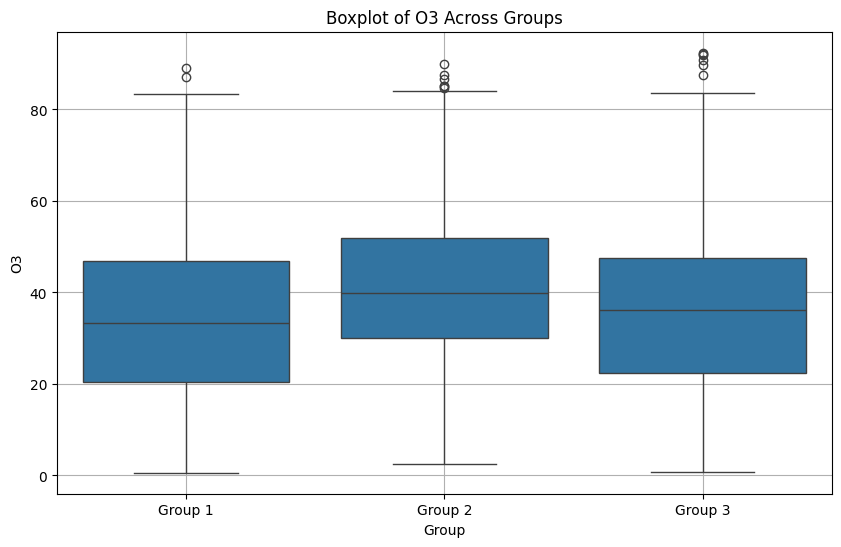

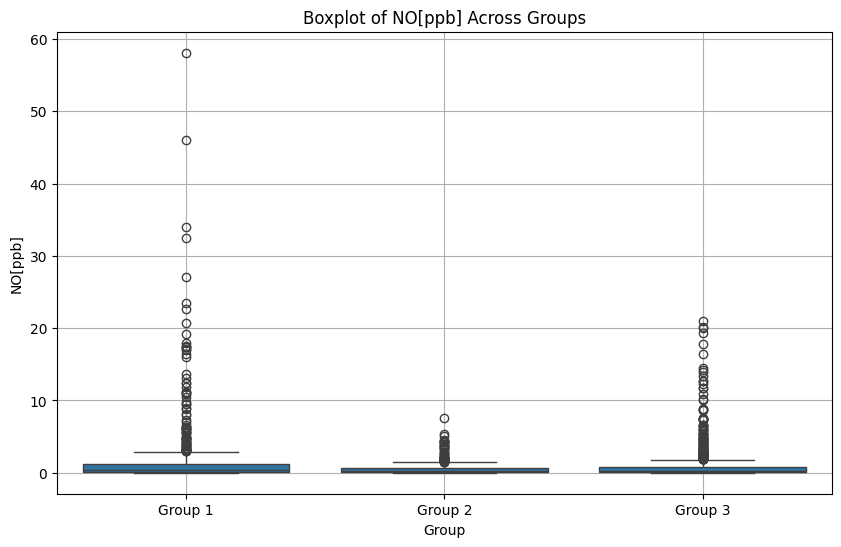

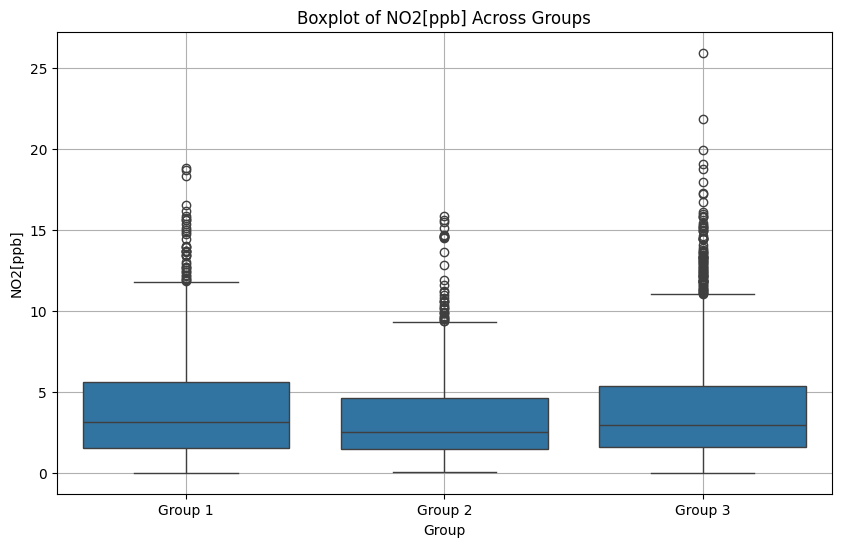

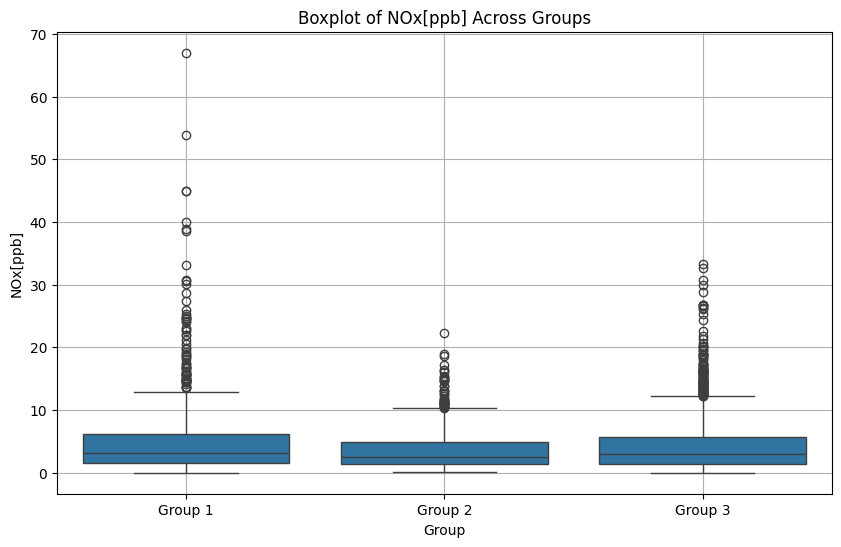

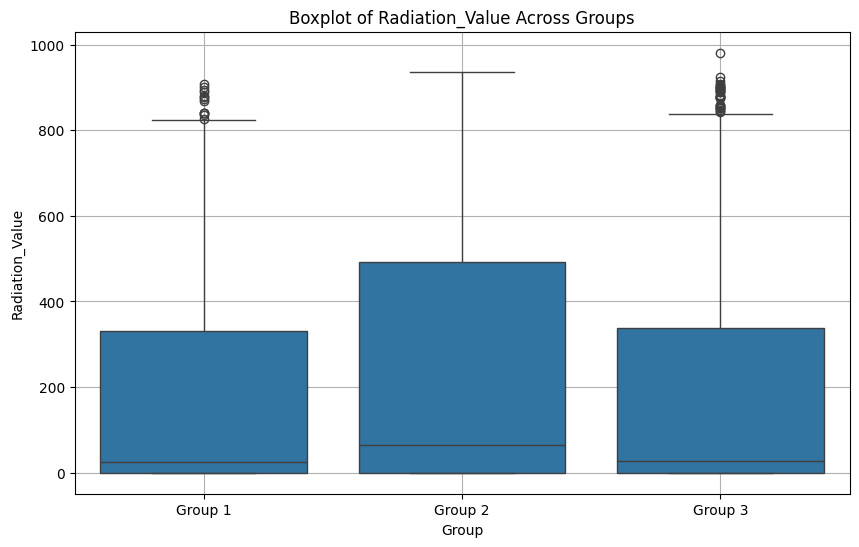

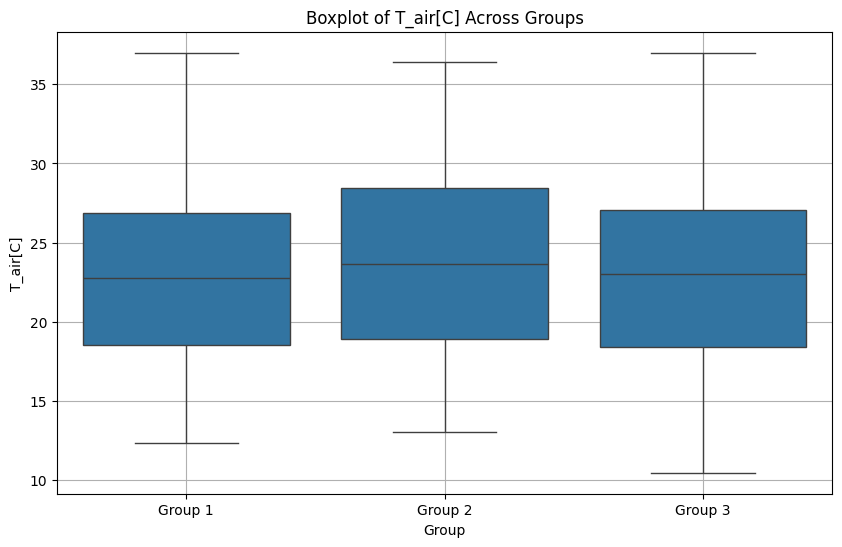

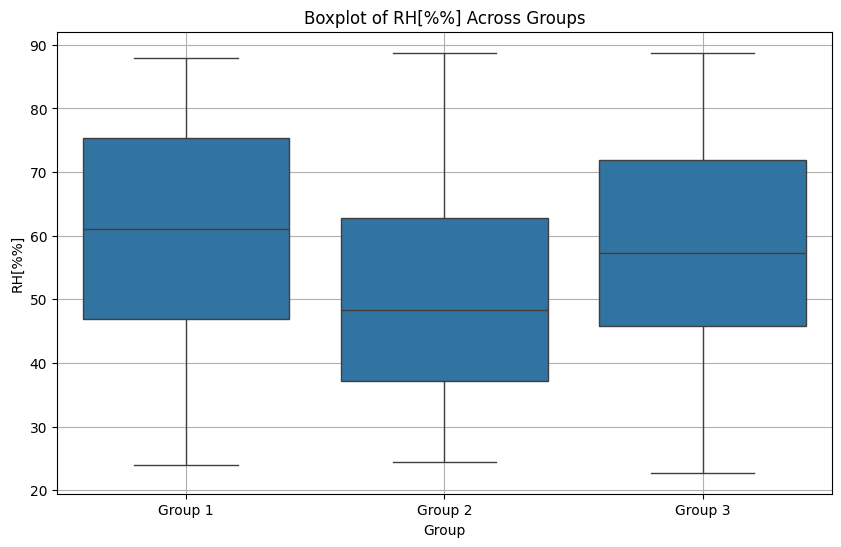

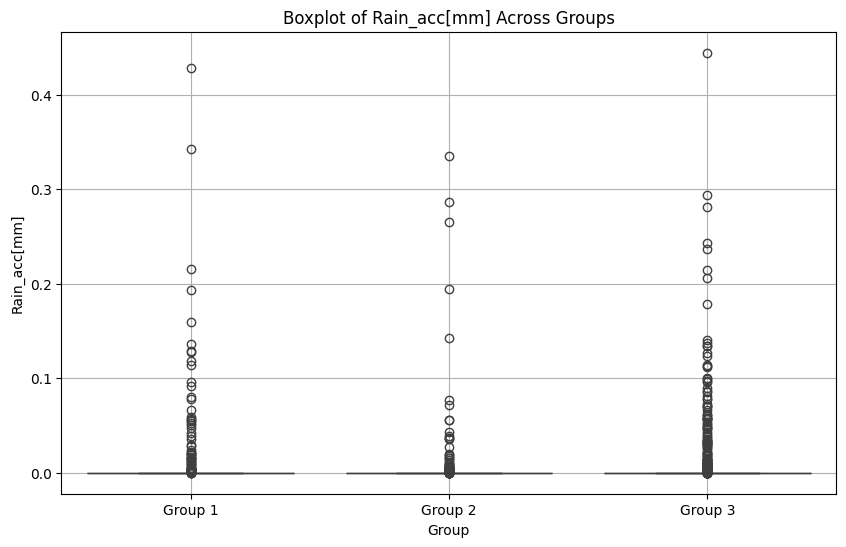

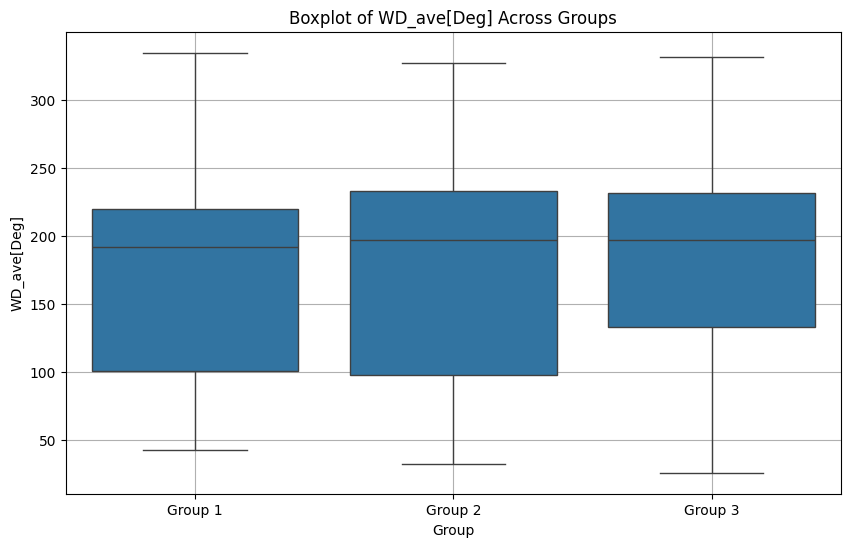

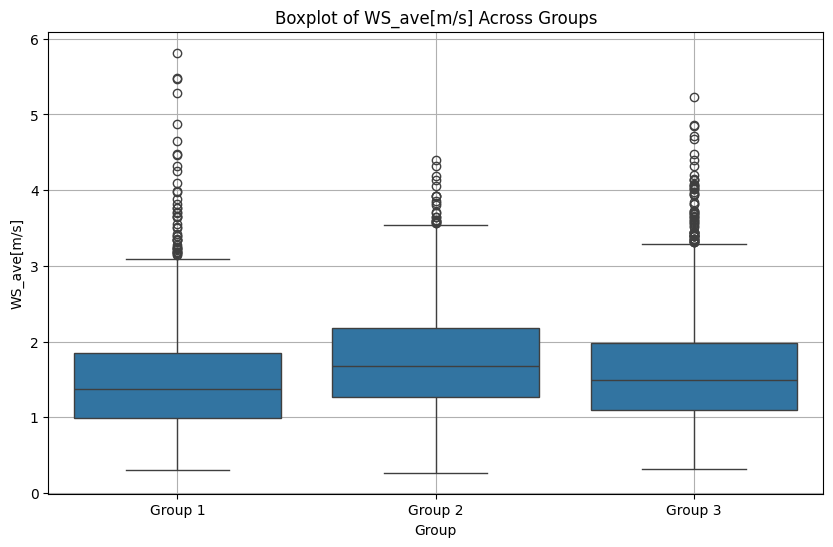

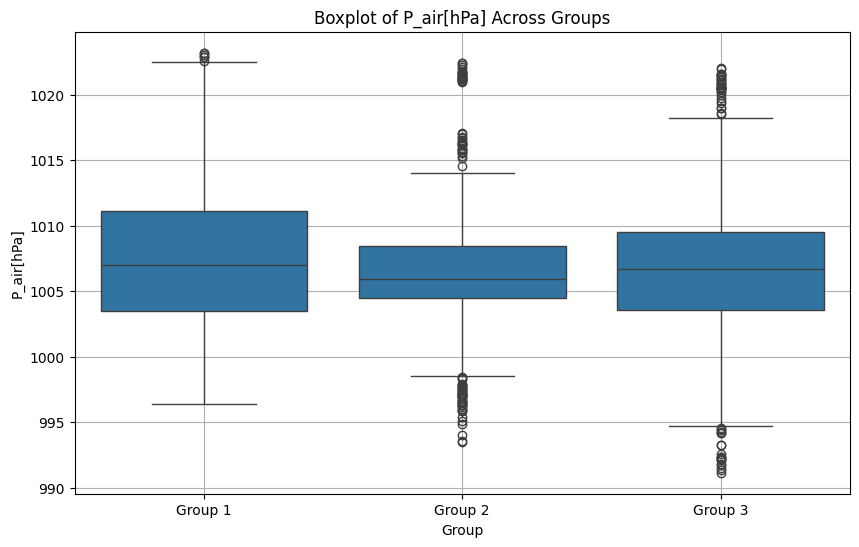

In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine data from the three groups into a single DataFrame
g1_comp['Group'] = 'Group 1'
g2_comp['Group'] = 'Group 2'
g3_comp['Group'] = 'Group 3'

# Concatenate all groups and reset the index to remove duplicates
#combined_data = pd.concat([g1_comp, g2_comp, g3_comp]).reset_index(drop=True)
combined_data = pd.concat([g1_comp, g2_comp, g3_comp]).loc[~combined_data.index.duplicated(keep='first')]


# Plot boxplots for each variable across groups
for variable in combined_data.columns[:-1]:  # Exclude the 'Group' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_data, x='Group', y=variable)
    plt.title(f'Boxplot of {variable} Across Groups')
    plt.xlabel('Group')
    plt.ylabel(variable)
    plt.grid(True)
    plt.show()


### How about black carbon

In [243]:
# Select the dates from the complemetary data that are in each component.
g1_bc = bc[bc.index.normalize().isin(pd.to_datetime(selected_data_where_component_0.time.values).normalize())]
g2_bc = bc[bc.index.normalize().isin(pd.to_datetime(selected_data_where_component_1.time.values).normalize())]
g3_bc = bc[bc.index.normalize().isin(pd.to_datetime(selected_data_where_component_2.time.values).normalize())]

In [244]:
g1_bc

BC6[ng/m3]
datetime                        
2024-05-17 00:00:00     0.000000
2024-05-17 01:00:00     0.000000
2024-05-17 02:00:00     0.000000
2024-05-17 03:00:00     0.000000
2024-05-17 04:00:00     0.000000
...                          ...
2024-10-29 19:00:00  4759.050000
2024-10-29 20:00:00  3665.400000
2024-10-29 21:00:00  3515.616667
2024-10-29 22:00:00  2537.033333
2024-10-29 23:00:00  2053.483333

[1008 rows x 1 columns]

/tmp/ipykernel_12686/2939867162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1_bc['Group'] = 'Group 1'
/tmp/ipykernel_12686/2939867162.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2_bc['Group'] = 'Group 2'
/tmp/ipykernel_12686/2939867162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

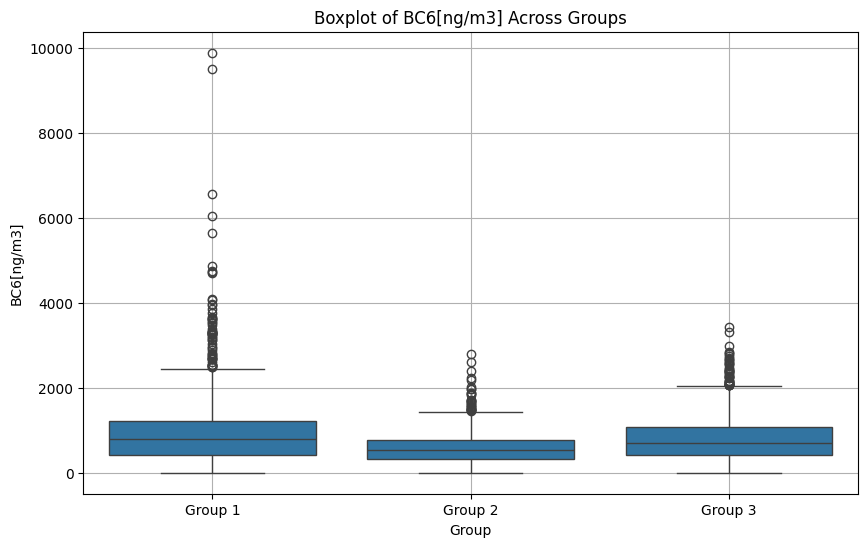

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assign each group a label
g1_bc['Group'] = 'Group 1'
g2_bc['Group'] = 'Group 2'
g3_bc['Group'] = 'Group 3'

# Concatenate all groups and reset the index
combined_data = pd.concat([g1_bc, g2_bc, g3_bc])

# Plot the boxplot for the single variable across groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Group', y='BC6[ng/m3]')
plt.title('Boxplot of BC6[ng/m3] Across Groups')
plt.xlabel('Group')
plt.ylabel('BC6[ng/m3]')
plt.grid(True)
plt.show()



### Can we try calculate J and GR

In [298]:
import numpy as np
import xarray as xr

# Load your dataset (assuming the dataset is already loaded as 'nais_data')
# Define the particle sizes in nanometers
Dp_i = 3e-9  # Starting diameter in meters (3 nm)
Dp_u = 7e-9  # Upper diameter in meters (7 nm)

# Define groups (assuming 'g1_days', 'g2_days', 'g3_days' are xarray DataArrays with time and diameter coordinates)
groups = {'g1_days': g1_days, 'g2_days': g2_days, 'g3_days': g3_days}

# Remove duplicates if any are found
# Drop duplicate timestamps directly in xarray
# This groups by the 'time' coordinate and keeps the first occurrence of each timestamp
total_particles = particles.groupby('time').first()

# Now, you can proceed with using total_particles_unique, which has a unique time index


# results now contain growth rates and particle formation rates for each group (g1, g2, g3)
# Define the time increment in seconds for hourly data
time_increment = 3600  # seconds (1 hour)

# Function to calculate Growth Rate (GR) with hourly data
def calculate_growth_rate(data, Dp_i, Dp_u, time_increment):
    # GR = dDp / dt, where Dp is the diameter and dt is the time increment in seconds
    # Calculate the time derivative (dN/dt) with the correct time interval
    dN_dt = data.diff(dim='time') / time_increment  # Change per hour in particles per cubic meter
    dDp = Dp_u - Dp_i  # Diameter change in meters
    growth_rate = dN_dt / dDp
    return growth_rate

# Function to calculate Particle Formation Rate (J) with hourly data
def calculate_particle_formation_rate(data, Dp_i, Dp_u, time_increment, correction_factor=1.0):
    # Calculate J based on the observed dN/dt and optional correction factor
    dN_dt = data.diff(dim='time') / time_increment  # Change per hour
    # Placeholder for coagulation sinks and correction based on environmental factors
    particle_formation_rate = dN_dt * correction_factor
    return particle_formation_rate

# Adjusted calculations for each group
results = {}
for group_name, group_data in groups.items():
    # Select total particle data within the group
    group_total_particles = total_particles.sel(time=group_data['time'])
    
    # Calculate Growth Rate (GR) with hourly increment
    growth_rate = calculate_growth_rate(group_total_particles, Dp_i, Dp_u, time_increment)
    
    # Calculate Particle Formation Rate (J) with a default correction factor
    particle_formation_rate = calculate_particle_formation_rate(group_total_particles, Dp_i, Dp_u, time_increment)
    
    # Store results
    results[group_name] = {
        'growth_rate': growth_rate,
        'particle_formation_rate': particle_formation_rate
    }

# The results dictionary now contains growth rates and particle formation rates for each group (g1, g2, g3) with hourly increments


In [299]:
results

{'g1_days': {'growth_rate': <xarray.DataArray (time: 1007, diameter: 55)>
  array([[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
          -2.93794505e+08, -2.26438119e+08, -2.10642123e+08],
         [            nan,             nan,             nan, ...,
          -1.23844692e+08, -1.81222524e+08, -2.01145233e+08],
         [            nan,             nan,             nan, ...,
           2.70471844e+07,  2.96368304e+07,  1.52189862e+07]])
  Coordinates:
    * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
    * time      (time) datetime64[ns] 2024-05-17T

In [303]:
results['g1_days']

{'growth_rate': <xarray.DataArray (time: 1007, diameter: 55)>
 array([[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
         -2.93794505e+08, -2.26438119e+08, -2.10642123e+08],
        [            nan,             nan,             nan, ...,
         -1.23844692e+08, -1.81222524e+08, -2.01145233e+08],
        [            nan,             nan,             nan, ...,
          2.70471844e+07,  2.96368304e+07,  1.52189862e+07]])
 Coordinates:
   * diameter  (diameter) float64 8.029e-10 8.628e-10 ... 3.846e-08 4.155e-08
   * time      (time) datetime64[ns] 2024-05-17T01:00:00 ... 2024-10-29T23:0

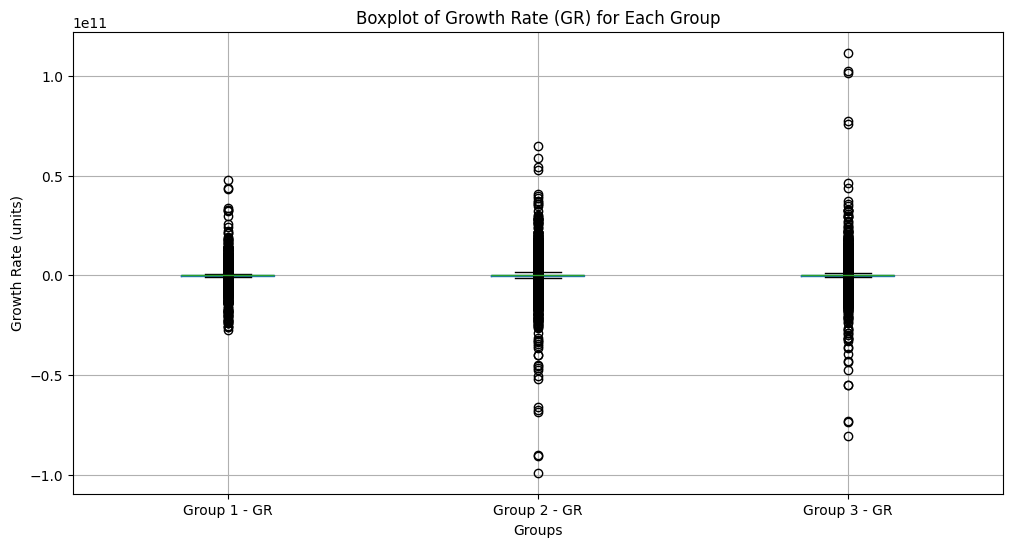

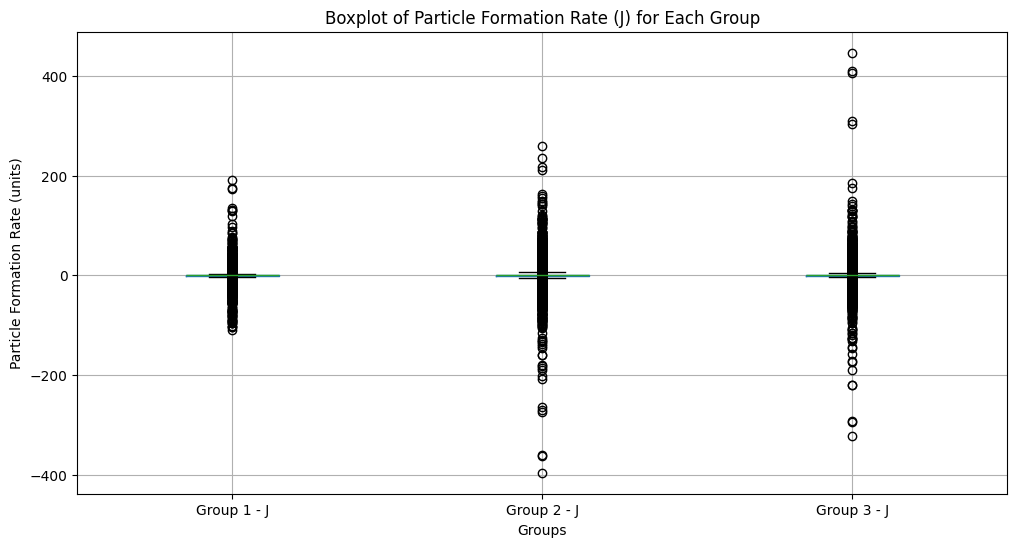

In [304]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the data for each group and flatten
# Filter out NaN values in the flattened array to prepare for plotting
data_for_plotting = {
    'Group 1 - GR': results['g1_days']['growth_rate'].values.flatten()[~pd.isna(results['g1_days']['growth_rate'].values.flatten())],
    'Group 1 - J': results['g1_days']['particle_formation_rate'].values.flatten()[~pd.isna(results['g1_days']['particle_formation_rate'].values.flatten())],
    'Group 2 - GR': results['g2_days']['growth_rate'].values.flatten()[~pd.isna(results['g2_days']['growth_rate'].values.flatten())],
    'Group 2 - J': results['g2_days']['particle_formation_rate'].values.flatten()[~pd.isna(results['g2_days']['particle_formation_rate'].values.flatten())],
    'Group 3 - GR': results['g3_days']['growth_rate'].values.flatten()[~pd.isna(results['g3_days']['growth_rate'].values.flatten())],
    'Group 3 - J': results['g3_days']['particle_formation_rate'].values.flatten()[~pd.isna(results['g3_days']['particle_formation_rate'].values.flatten())]
}

# Convert to DataFrame for easier boxplot generation
df_plot = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data_for_plotting.items()]))

# Plot boxplots for Growth Rate (GR) and Particle Formation Rate (J) for each group
plt.figure(figsize=(12, 6))
df_plot[['Group 1 - GR', 'Group 2 - GR', 'Group 3 - GR']].boxplot()
plt.title("Boxplot of Growth Rate (GR) for Each Group")
plt.ylabel("Growth Rate (units)")
plt.xlabel("Groups")
plt.show()

plt.figure(figsize=(12, 6))
df_plot[['Group 1 - J', 'Group 2 - J', 'Group 3 - J']].boxplot()
plt.title("Boxplot of Particle Formation Rate (J) for Each Group")
plt.ylabel("Particle Formation Rate (units)")
plt.xlabel("Groups")
plt.show()


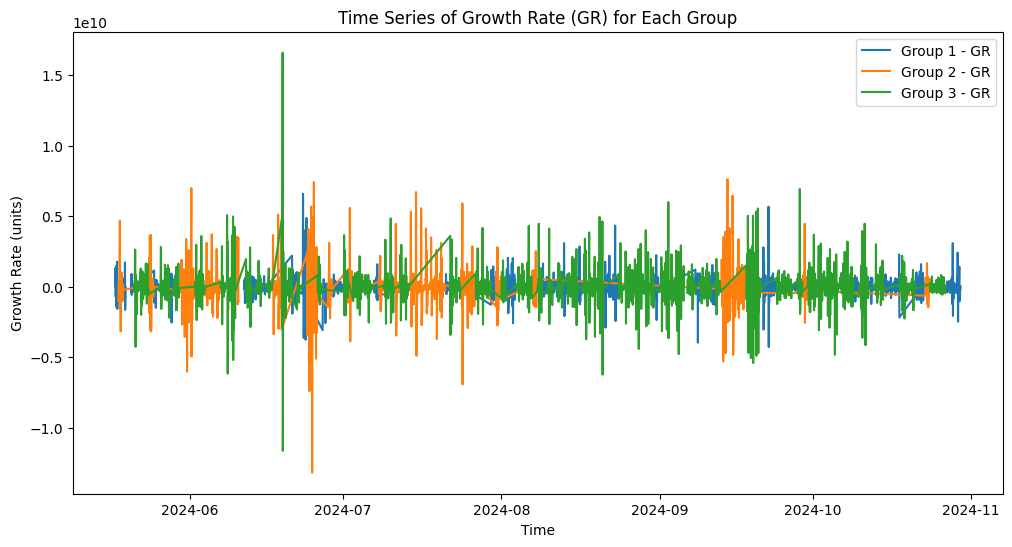

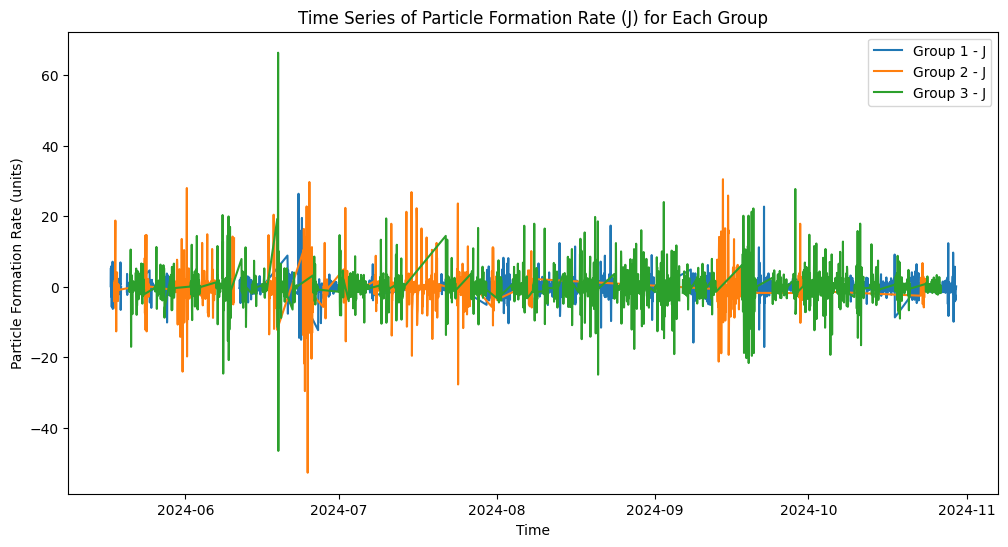

In [305]:
import matplotlib.pyplot as plt

# Calculate the mean over the diameter dimension for each group and variable
mean_gr_g1 = results['g1_days']['growth_rate'].mean(dim='diameter')
mean_j_g1 = results['g1_days']['particle_formation_rate'].mean(dim='diameter')

mean_gr_g2 = results['g2_days']['growth_rate'].mean(dim='diameter')
mean_j_g2 = results['g2_days']['particle_formation_rate'].mean(dim='diameter')

mean_gr_g3 = results['g3_days']['growth_rate'].mean(dim='diameter')
mean_j_g3 = results['g3_days']['particle_formation_rate'].mean(dim='diameter')

# Plot the Growth Rate (GR) time series for each group
plt.figure(figsize=(12, 6))
plt.plot(mean_gr_g1['time'], mean_gr_g1, label='Group 1 - GR')
plt.plot(mean_gr_g2['time'], mean_gr_g2, label='Group 2 - GR')
plt.plot(mean_gr_g3['time'], mean_gr_g3, label='Group 3 - GR')
plt.title("Time Series of Growth Rate (GR) for Each Group")
plt.xlabel("Time")
plt.ylabel("Growth Rate (units)")
plt.legend()
plt.show()

# Plot the Particle Formation Rate (J) time series for each group
plt.figure(figsize=(12, 6))
plt.plot(mean_j_g1['time'], mean_j_g1, label='Group 1 - J')
plt.plot(mean_j_g2['time'], mean_j_g2, label='Group 2 - J')
plt.plot(mean_j_g3['time'], mean_j_g3, label='Group 3 - J')
plt.title("Time Series of Particle Formation Rate (J) for Each Group")
plt.xlabel("Time")
plt.ylabel("Particle Formation Rate (units)")
plt.legend()
plt.show()


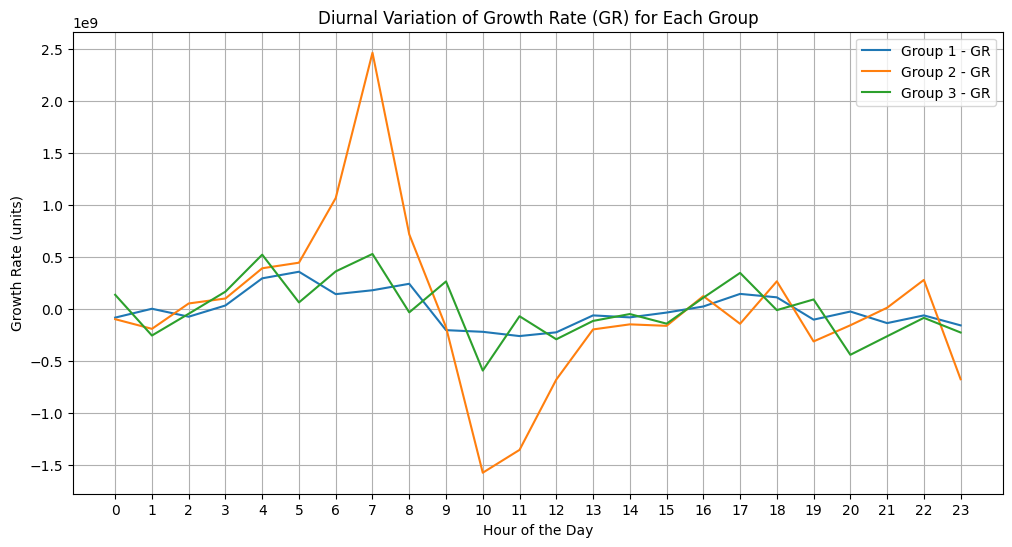

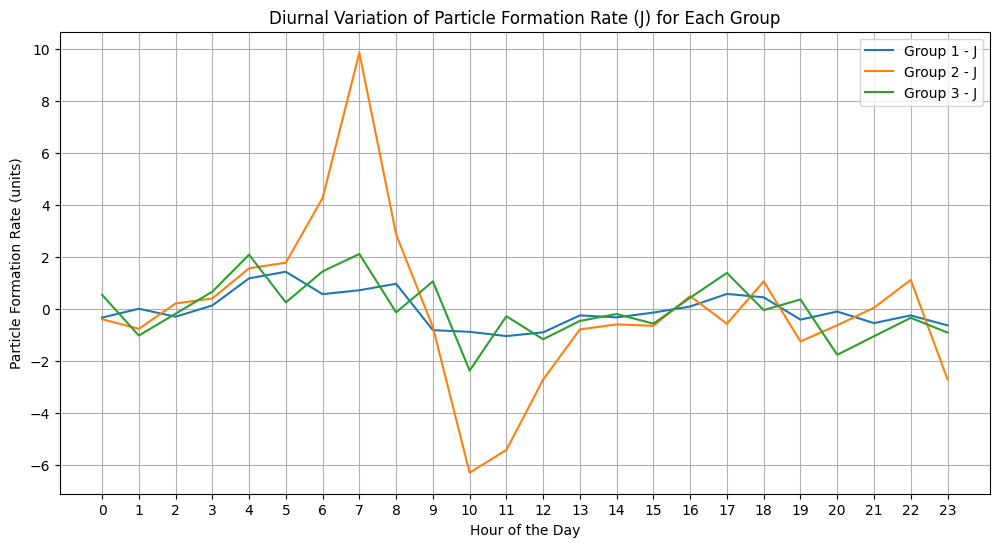

In [306]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the xarray DataArray to a pandas DataFrame for easier grouping by hour
def calculate_diurnal_cycle(dataarray):
    df = dataarray.to_dataframe(name="value").reset_index()
    df['hour'] = df['time'].dt.hour  # Extract hour from the time
    # Group by hour and calculate the mean (or you could use median if preferred)
    diurnal_cycle = df.groupby('hour')['value'].mean()
    return diurnal_cycle

# Calculate diurnal cycles for Growth Rate (GR) and Particle Formation Rate (J) for each group
diurnal_gr_g1 = calculate_diurnal_cycle(results['g1_days']['growth_rate'].mean(dim='diameter'))
diurnal_j_g1 = calculate_diurnal_cycle(results['g1_days']['particle_formation_rate'].mean(dim='diameter'))

diurnal_gr_g2 = calculate_diurnal_cycle(results['g2_days']['growth_rate'].mean(dim='diameter'))
diurnal_j_g2 = calculate_diurnal_cycle(results['g2_days']['particle_formation_rate'].mean(dim='diameter'))

diurnal_gr_g3 = calculate_diurnal_cycle(results['g3_days']['growth_rate'].mean(dim='diameter'))
diurnal_j_g3 = calculate_diurnal_cycle(results['g3_days']['particle_formation_rate'].mean(dim='diameter'))

# Plot diurnal variation for Growth Rate (GR)
plt.figure(figsize=(12, 6))
plt.plot(diurnal_gr_g1.index, diurnal_gr_g1, label='Group 1 - GR')
plt.plot(diurnal_gr_g2.index, diurnal_gr_g2, label='Group 2 - GR')
plt.plot(diurnal_gr_g3.index, diurnal_gr_g3, label='Group 3 - GR')
plt.title("Diurnal Variation of Growth Rate (GR) for Each Group")
plt.xlabel("Hour of the Day")
plt.ylabel("Growth Rate (units)")
plt.legend()
plt.xticks(range(0, 24))  # Set x-ticks to each hour
plt.grid()
plt.show()

# Plot diurnal variation for Particle Formation Rate (J)
plt.figure(figsize=(12, 6))
plt.plot(diurnal_j_g1.index, diurnal_j_g1, label='Group 1 - J')
plt.plot(diurnal_j_g2.index, diurnal_j_g2, label='Group 2 - J')
plt.plot(diurnal_j_g3.index, diurnal_j_g3, label='Group 3 - J')
plt.title("Diurnal Variation of Particle Formation Rate (J) for Each Group")
plt.xlabel("Hour of the Day")
plt.ylabel("Particle Formation Rate (units)")
plt.legend()
plt.xticks(range(0, 24))  # Set x-ticks to each hour
plt.grid()
plt.show()


In [302]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'results' is a dictionary with each group's calculated values (e.g., particle formation rates or growth rates)
# Convert each group's data to a DataFrame for plotting
data_for_plotting = {
    'Group 1': results['g1_days'].values,
    'Group 2': results['g2_days'].values,
    'Group 3': results['g3_days'].values
}

# Create a DataFrame for easier plotting
df_plot = pd.DataFrame(data_for_plotting)

# Plot boxplots for each group
plt.figure(figsize=(10, 6))
df_plot.boxplot()
plt.title("Boxplot of Particle Formation Rate (or Growth Rate) for Each Group")
plt.ylabel("Rate (units)")
plt.xlabel("Groups")
plt.show()


ValueError: If using all scalar values, you must pass an index

In [293]:
# Import required libraries
import numpy as np
import xarray as xr

# Define the coagulation coefficient calculation (simplified as a function)
def coagulation_coefficient(Dp_i, Dp_j, T=298.15):
    # This function estimates coagulation coefficient K based on particle sizes and temperature
    # For simplicity, use a placeholder formula or empirical values as available
    return 1e-10  # Example coefficient in m^3/s, replace with actual calculation

# Function to estimate coagulation sink (CS) with correction factor based on environmental data
def calculate_coagulation_sink(data, Dp_i, correction_factor=1.0):
    CS = 0
    # Loop through all size bins up to Dp_i to calculate CS
    for Dp_j in data['diameter']:
        if Dp_j < Dp_i:
            N_j = data.sel(diameter=Dp_j)  # Concentration in size bin j
            K_ij = coagulation_coefficient(Dp_i, Dp_j)
            CS += K_ij * N_j
    return CS * correction_factor

# Function to calculate Particle Formation Rate (J) with detailed terms
def calculate_particle_formation_rate(data, Dp_i, Dp_u, time_increment, growth_rate, correction_factor=1.0):
    dN_dt = data.diff(dim='time') / time_increment  # Change per hour
    CS = calculate_coagulation_sink(data, Dp_i, correction_factor)  # Coagulation sink term
    J = dN_dt + CS + (growth_rate * data / (Dp_u - Dp_i))
    return J

# Define the function to calculate correction factor based on RH
def calculate_correction_factor(complementary_data, time):
    # Check if time is already a pandas.Timestamp; if not, convert it
    if not isinstance(time, pd.Timestamp):
        time = pd.Timestamp(time)  # Convert only if necessary
    
    try:
        # Select the RH value for the specific time
        rh = complementary_data.loc[time, 'RH[%]']
        # Define the correction factor based on RH
        correction_factor = 1 + (rh / 100.0)
    except KeyError:
        # If the specific time is not found, set a default correction factor
        correction_factor = 1  # or another default value you prefer
    return correction_factor


# Apply refined calculations for each group
results = {}
for group_name, group_data in groups.items():
    group_total_particles = total_particles.sel(time=group_data['time'])
    growth_rate = calculate_growth_rate(group_total_particles, Dp_i, Dp_u, time_increment)

    particle_formation_rates = []
    for time in group_total_particles['time']:
        # Convert time to a pandas.Timestamp
        time = pd.Timestamp(time.values)

        # Get correction factor from complementary data
        correction_factor = calculate_correction_factor(complementary, time)

        # Calculate particle formation rate with refined formula
        data_at_time = group_total_particles.sel(time=time)
        particle_formation_rate = calculate_particle_formation_rate(
            data_at_time, Dp_i, Dp_u, time_increment, growth_rate.sel(time=time,method='nearest'), correction_factor
        )
        particle_formation_rates.append(particle_formation_rate)

    # Store results
    results[group_name] = xr.concat(particle_formation_rates, dim='time')



InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [287]:
# Apply refined calculations for each group
results = {}
for group_name, group_data in groups.items():
    group_total_particles = total_particles.sel(time=group_data['time'])
    growth_rate = calculate_growth_rate(group_total_particles, Dp_i, Dp_u, time_increment)

    particle_formation_rates = []
    for time in group_total_particles['time']:
        # Convert time to a pandas.Timestamp
        time = pd.Timestamp(time.values)

        # Get correction factor from complementary data
        correction_factor = calculate_correction_factor(complementary, time)

        # Calculate particle formation rate with refined formula
        data_at_time = group_total_particles.sel(time=time)
        particle_formation_rate = calculate_particle_formation_rate(
            data_at_time, Dp_i, Dp_u, time_increment, growth_rate.sel(time=time), correction_factor
        )
        particle_formation_rates.append(particle_formation_rate)

    # Store results
    results[group_name] = xr.concat(particle_formation_rates, dim='time')


KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

In [294]:
# Drop duplicate time entries in growth_rate, keeping only the first occurrence of each timestamp
growth_rate = growth_rate.groupby('time').first()


In [296]:
# Apply refined calculations for each group
results = {}
for group_name, group_data in groups.items():
    # Select total particle data within the group
    group_total_particles = total_particles.sel(time=group_data['time'])
    
    # Calculate Growth Rate (GR) with hourly increment
    growth_rate = calculate_growth_rate(group_total_particles, Dp_i, Dp_u, time_increment)
    
    particle_formation_rates = []
    for time in group_total_particles['time']:
        data_at_time = group_total_particles.sel(time=time)
        
        # Get correction factor from complementary data
        correction_factor = calculate_correction_factor(complementary, time)
        
        # Calculate particle formation rate with refined formula using nearest match for growth_rate
        particle_formation_rate = calculate_particle_formation_rate(
            data_at_time,
            Dp_i,
            Dp_u,
            time_increment,
            growth_rate.sel(time=time, method='nearest'),  # Use nearest match
            correction_factor
        )
        particle_formation_rates.append(particle_formation_rate)

    # Convert list to xarray DataArray and add to results
    results[group_name] = xr.concat(particle_formation_rates, dim='time')


TypeError: Cannot convert input [<xarray.DataArray 'time' ()>
array('2024-05-17T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2024-05-17
Attributes:
    timezone:  utc] of type <class 'xarray.core.dataarray.DataArray'> to Timestamp